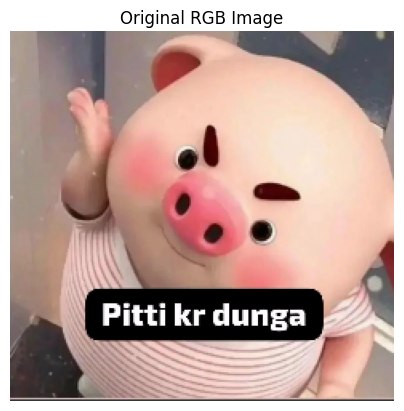

In [10]:
# Part A
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# base64 string
base64_image = """iVBORw0KGgoAAAANSUhEUgAAAPAAAADnCAYAAAAghtuxAAEAAElEQVR4nKT9+bNlW3Lfh30y19rn3KHmV28e+vU8oBsNNCaRhEBwEMKyRSlMmaaGkORw+Af/M5bCIftXh205bIUHUSGLDNukSUCQSQiA0I0e0AB6ANDjG6teTffec/Zamf4hc+197q16jba8O15X1b1n2HutXDl885uZ8n/93/zHLijuDgjgIA4YZh0Ac8e65e8VXONPhCePz3jnnfdwF5p0TJTuDUHBAVFwwUTovdOagQuC081wMwzH3XGDjgIgAgCaf3YDN8EpiAtmndbX9zfrtN6Y5043p1vHzUAMdcd747UXX+aNN19CtIPtOTIFNxCliIA45g1wpBQkb0JEUBWkO6jgAq6COFRXplowHBGhuXN4iQilKCKKijBp/Nn6TFcBDLwg5kAHsYP3KsVrrmXDgaKy7hMSfwUk/1JE6R6foQ6iiji4QLF1QR1wcbx4/J24bzNH3EALIo6jmChIoZnz4MF98Mq+Od/6wV/w6Mk5IDQHs4JRQjbMcG9IkdyjuEszBy/5nE6VEt/u4F5wifvFHXNHkXUftMdD+IzbjDrgNVerI2Ic1Ymf+ZnP88qLL1Lp0AXVFusgHZd8eks5l86yiDhmIYvjO+PHjns8lzs8evSY+w+ecL4/5+t/+m1MtziV3qEDuKAea2rSccDy89wdpKHmeYKMLlA9jsr1m9f44s98htdfewFlx9wa3//+W3zta9/g7MmMW8V6oZbC6TRR4+YrkgvqrAI0LhV5xk/jqtNErQV3x4ZAecE9RMp63LjiuDnFFfGCWwdRvM+4gLiOb1sE0tzpMg68pPApU62oTDx+fAZF4vDjzHOjuYGU/KiOuKe4FkxCCQiGUqgIjiPiiCiOoBIHV8RBJM63gLqAG+KCq2IiSPyIZvEiH8dAUgcCqpICEXfRu+FacBSxhknsnGmsv0ocLBDElUI8v0qnq+OSAu3xeSpCbw7dqRr3VLWCONUFaztKmVB3TDUFOARJMPplfRP77IAbnkKVP6AU6C3+FBEudju01FDoreO9gxRclZCYkAHREgcXQ7WAK906KhoHXlp+cUckDrygKEJ1Be+pXnooewHxEt+ghdSolAIXbebr3/gm996+z8ffeJXb12/lvgEeci5KyLuDy4EypK+GIxfKUg7MnNb3uAv7iznksxuqE2jNz3a8WygBGYq2MP7WBYQOrrh46BBA0TQeHe0F8Vw/daZNpW4EVXC3lN94jYlTVRX3hvUU9MUCGOY9/y5oUXozDhXTuBxwVSrQPQ5rx7HUMSBgRkGRtLQzgkvDq6I+DnoenHEHAmKCi8bBdEEFjo4qR9sTPnj8EBWHPCBxbyE47oao4JYWwQ1xZyqCd6Wo0OgUCqE3wyuQ8T8LLSxUlI6n0oY4nCUPUPwgBFd8KLD88cFiuRugmEsIHMOLGbYpVlJwNE9RsR2ioBoHWQXqZkPdbjitG3BQqdQS1rbKhmFPW2sUCwtjHfb7Cy56o+WeOkIpHg7AwX2GjnQ6saACuKeeRyhlootyNl+w2zc2mxM6M6rK7B2khQXP5+stPJpVoA0wplrpFq9fFm0qSCM9hlDwM/MiYyqgHhYb13ivC0jHcVo6MPt55kc//jHnD+7zS1/6FTZHmi5I7Fs8va6Gd/mGQlVCEaUc4SEZfb/nye4CoXKx23F+tufBo/OUB1lkQVRQJD3adWdDHmY48HRDEQ2vNs6WaMNpKTOOqlB0yLUve9eBbkoNF2SfAkZYu1Cbiyw6jqjiKosmFZGU6BR6r3SZKaJpiXq4HgJu8RMpeYBDRoCCI5gbqopbLizQ3XHPgyOOuqQ2NHb7hug+XNoieT8arj6yWF13JfbJcBpSQpsLHosugtFRCuIFkZbaL102FBUN7WcFl4vcsPU+47SFKY7lLajEQVbVRTY0LUpYDF++I34aa1SqI+5oE1QU2FN04tbNG5xut2yOjjg9PaGUylYLmNN7bKxoWCtH6K3F5psjJVzx5p2Hjx7x+OwMgPP9jnm3i2/3ISCrUhLJ9TaPw+RlUeDNZi4uztifz+DnsKmoOkWV7mBmy+ctCjwP2hDMblBLpdvw78N6hdYe70t1lC6tpbxNUwGp7HucWEXDsgJaprhnNx4+OeN3fvd3+NkvfZHTG6eU9OQUA3f6coZ97GZYVp0RC48xrGPFfB9y2Y3dbubevfucW2OzOaJ3oVmEK6UbzWzV4+MMYIgbXRRxOfA4h7aP9bq42HPvg/e5e/ca0+SoTriHbA+doKIo4N6pyMziV7E6EwBaCr3HQbS5h/tGhg5ji4qGS4LhXjEsLYMieLitQrjXhMvn2lPzCJJC7j5W8yAG9FQPB5ZPBPrceHjxAaVaWsVxx4JIwX0X7h/DCkbcIbKLz5cDLRhLsTzTFbW8+sLPuqTBsvUf8hIkj+i6wOpjyYd7r1QFaYaK03bnvPbG6zx39+MUhEkLNddpkogvi3ZU4oC6kN5CiXh1I+FRuUEJl3vuhZeOX6Dt5twPKCK88/77fPDwXfb7+KGlwPURYksIfcdou3OKKltg3u2ozIhP6cCEN+EHguax4aFQD2JNM+POnTtsN1vefvs9RDvex+pLxufr0psMxCXcUFVQNea5U/L5aq20/YxbuOmdgkvjUd/zu1/+Mh978w1ef/11yhTuuyU2U2SR5Lzj1ZBBz1AjFGt4Msajiwt0qrBv1FIW2bZ2RX4OvLHlOSzc/eGJDBkQURAL7+FHb6MYt27dRKXw/e+9i/jRWNBQ0hreUx1e+Piw5SjIgQsluRHd8+CNGCoWQFXTcoUFtLxxH5aQ1eJ0GXYqYh9P18FxXJTFESAE3VgFya2BK+aGe8QSIorQ0nrHQTRXTMJlVkgXt8fzDO13xX2yfK9ScBpaZHXJvYYOkNVVugp0SK4VqWSQdKPc6RCx9djTw/PsDnSOjraUWXjxuTscH2+4cf2UUpQqmvF3pUhHzKmiuHdUSVcyrKxIrIEDVsOF1QLdjKIBKm6Ot2EB3cCcl5+/y50b19jv9uz2Oy72O969d49JI4o1j0AIF2TuVA9AZlsrN65dY2/hzjU64d064wSHsk95kUVroao8fPiQoiU8P7usNCVDCZd0Sft4LsUVugnzPIfSJwA2lZqBm4PFoXYPL3He7fnWd/8c0cLrr7zM0fG0KJlhACQ1uHjE306L94tiJpxf7Gmha3lw733Oznbo8TF4wS29GJvjPePApjIc1wC2kERLMnZ3nOaOaGBJ9+6fs9u9w+07Oy6enPHggye4OcaGKttYB+80m0kIr6UwDrWX2nJBPEjBv7TOl4AtESgohgfY4qmN29iS3Kei8SqP7wiQSHCLzVhi4CX+zu+yjpsP3zvjA6X5WLQDM83ysuVHnmDQ8kBYujHDIodAuDagwViacdKlL1+xeCkLmjp+yvKcZdHmiTVaeDAqGgpLwqWaL3acnl7j5bsv8tKtG0wIKo6qUUt8d00QUaWgPbCEMHoRC5pARTAN0QOhSMUlUGC1CHHwwBPMHbEGRbDdnk2dmErlaLvlpM3cvnGDDx495Gw/8/hsj7lRXKg0rBemKeIyUaVawaXg3iiquBoutqyb2xWhIffbnbnN6/peeoGFcs7/LUpTQH0FH6SW3OvEKkTTIAgmhksqN3P2ux3f+MY3uH/vPX7uZ7/ANG1Y5HyYHpc0YRlnSxiebh4ZDxXuP3hAawFEzntDdRjA9T6Xx1ilcrlM4hxpyqyJ5M8c9YzxTXjyxNjvHmG94bYB6+HOU1JmQcSpbgVRT2sz/MgDKysRs6kXlIhNYxNscdlUJITMUxO5U4iUjyvpVo241BONS21cIkUlGi5clXBxsNgoT5fccShlAVwsFYRKAQm3rBDI4OweyLlZ3KeFiy4SaGjVEprWAyWWjFmRPZYYgGcMrVro3sENlYKJpxfhuZy52fTwMxIzE0J7B8YgVBm+jqdCCWX0wu3bvPHqG9w8OUXZBYjkQvGC9k4pBdoF6hVRoZSKeSCphYJhAQPkilYpmarwQEeBIpUCNF3TGTDRu6GbyjzPcWdFmDaKmbE9foFmxpOzPe+9/4Dzix2bXlArnLXOn33nz5DT64FBmFO7REwpIywoDHfKuqXwPXVSQUcKMwXc+yKGkp5XydeMfQkUXikeaTOZHVFDLRRbS6NQXfDIpaVSgB+/9Tb7/czPfO6zXL9+Ss29d8kUZd6W5z6BcO/9d2nm7BF+8OO3aNTwsLQnWNszhbR8wpIZETSzCuA9sQ1xPD3QnudOAfPAg8QqaGWeDXNF3SmJrbhbqAoXkJIxcMaBDEBjGJ10ywIhc1qRwGxc6ImUqhZKiYSMWqR+4r0hrpFGaZlHS8vJeE3LPY5UDtoRQqNLpmyWjVcw7WFtvaKlLKm8XsFaWOwul63vcvmhALVw18l1GBH9QARlxCYt88IEbL9sburcZa3yWaWgJdMoCeRoyejNDHXCdZU9VeGF517m1RefZ1sV7Y1NBZsvqKY0a7S2Z98ukEw9iSjWne12i6hxtD2hloLUgNS6RN5R0+12X5VTTwUyXPbACqCUSq2F3hvuSqcBhe6FMjfKsbJ9ecM8N94/fsy79+5ju5ljMeayZ+/EBqTAl1Iw1wCIPfOiP+Fy9wSnnnGJI5rKX8Jq9RFipaEI/oHR9ruw7CI0SQ9DK5Uh0pHBQODtd9/n/d/6Hb70i5/n1ZdfjHRWeg0RCoJoHMVdm2nW6Q772Xn4+DHix0zTEdATOIW5hzXv3RaF5DKs8+EqCOshy3zxgtCHcUM0QAgJcLaPVJZIYju+uPpVtWCdpyzwZaspmX/qKeBh4Ra3QYbH60kccMxsOaxN0h0yD2shYwegTgVT6F2wrul6h/CbtcgdiMTXijMxMWfQr56WN61KtyRtGAuxQnqgqapK1boIsZAkAc88raY28DieI/M4kGRrGU+bIWU9/GOzhIKUCpSIT9N9Q3oI9jjEgHnjIx/5BM+fXkf3nXb+hHbeuH/xAW1/DjOR2msz3nrE40WZphrPrcrJ8Snz9gIRYTNtqNMWFzjaHiFTpWNM04SY0z3ARJKQ4q5rfjvjaNcJs0aVsMCIo5NSVZkMWt2wffGY5+7c4a133uHTb77JH7/9Y0SdvUTaRVzBCvSOWGTbpRuFGodZRxzIkkIREbRkiNVX9NZTpwqgpdLdFuPg3RGvuO8BOyDPxD4Hyl8ytpSw0plJataRqnSDP/jql7k4/yxvvPk6WsMYJaSavq/T5nnZ37l3NtMR7puIh/Nel/uyxHpkROwhh8vRTcsexsQTw3HERkqxh1Rqvpi6vNvScmh+oiCoC1VVaG2HypR3JJfCkiBo2OLyPqVIgJPjI84fnxExbORYB7AUGxVfqTpiaadnfLiZtqgUnpxdgFiQEjyh8jwoVghXiBKPaBHfiAhoDUdF5khjXEGxhSUsZtIVD3agi1AYbt/T13jvEjpfQp0l7tcA17CEPi3CIqkIgrKR3oWHpvz4G5/iznRMOdvz+IMPMDtnf35G3z+iX+zYtTk1rYJKhgmpkQmG1PnxGbVUalGOT07YbI7pCuebDSdHx3GQm+EKe/HIt6sySSgBKRLEr7TQ4nHg59bDozIiHizhshUVdCNsSkVefZ4XX77LR77zPX7vj/6Et87O6HF8lpjVJTJs3YdAR/w6MAId5JyDtT78x4JAm7HHmLQgatAzDtaGmYTFOgBjeu8Rjg1DZE7TCMWKBxNORDBvXMzw1W/9CfcffcAnP/0xrp2cpmHKQykerD6Hnc289aO3EYVrp8c8eLKntZ4MtATYDh/Cl0c5OMKVwXIM8DGUXjGhpwtvCirt4COE0sulT/H0FJxO7S1ynQNOdwdLVG3QIQN9Tt203KQBJcAZV7qHixdki8jbRjrCg+BBgADhAilYWLfuEtFjlcCJ5hCFgba7BPKt6TJhSXzIOEiTHKGUXBSNbH3P/NtYyAROwgY2VI2BfCO25rTTldJ0b8R7pCZVwcNF7ghiBZE51qgUjIhVxv0WlRCG1lJrCuKF5567g8+N+w/fY/fu+zx59ABxw9qOtn9Mm3epvcMLMNOIxQWmKYCaclToM2w2G2oR+r6h0xn1eIvNR+zPL5g2G65dv852s8GnoCeKp/VK2qgKazijBOqtG3rvdCG8LlO8hCKwORTYcS24wS994XO89slP8jtf+wZf/uo32Lmhfab0jkrkL0csqF4wWkYykmotcIieWxtGRiK2tXD7vYSSDTwjQyoBvKEqmXNOT5FQ9J4ovXelasrXsv9B0QzoRBCD7//wxzx+/JjPfu6zvHD3Dm5JRjGnli3Hx1sev/eAs0ePePzkCcaGed/CffZGupAHYZksSkjdMs6N5148vnRd0ydE3VKxOZOFcesZm1PsIJUqGVoGxlJFZhbQ8LK54fKV7jMDUQ68TqVEGkkiBlz0hpSgho34azlIkciudXWXg8zh+LxH8NRG6aK7gHYGv1SK0oQDyvBPyMMOpZUPaHlohRGbHOjHK1bY876Xb/GOs8Eoy+KPtVry00JwXIujpSIaiXtH8P3MtFG2W2V//oDz9x+we+dt+txpOMU6+4uHtP0+4//CbEbvwTgqouDK8cmW6WxDP95z7fQacrxhtwtEedrv2U17NkfKtp/gzOyPr7E5PaZI8JRVM7wAipYAKWW4zhGraSnQNbwe3eN0+izUbcHbnslDsaruuHUk/Novf4Gf/8yn+OPv/jl/+PVvcPaks+t7OkHs6ZQMvwBLGmrmQbuMdRyLrfTcq3X5D/ZmxKoc4BfOJbTbbYdbkHTcNJSs5OEVoSSZZjDRRCofPDjny1/5Ci8/f5dPfOLjHE0hz7VA2Z7wo3f/lPN5Bqk8uniMJSAaaUsbMehPdQkRSnQJD6I4CIZmRmGcsUU6pa/4TKgdTCM0q6Ka3M3hJtsB93mwfDylec0Di8pCIRMhUFa3ONg+nicQOEm7F4GsZlzrYIGqtR6osxwcKPVVixmaC7U+PAM9HDnCRJ5JN21Blj2+d744o5QJy+c7WEoCMfWnDjHjcyAstR/+LOOeVD6aCq33Rp1WpRaavlO3sC3w+N495gcPefzuPTg7x3qntxk73/HkyT12Ty5gvqBS2bklFXR4BspmUzk5PeHo9BoXJw/YHB+z3W45Pj6mz4262dNsw74ZzgnmwsX+guu3biDThLgEkwnyeUNU3Aq5fAhBkDDvYV1wqODdgstOp3uj9caGLWLG0fVjbvzsz/C5j36cL3/1a3z3hz/i/ffeZbaGl8JwmItPmBe6OTrBIGN7KkVPT2jBLoccEJ6dm9PEA611KCY0BakC5uEFeXqGJbwYdQv0P61w65beYlksoKhzset874dvs2/G5z79SWqJEPLd+x9wdrFnNwfAN1NSMcS9txGsOweylRjJsw5wxumainQcWnCqsbABDw3I+L2MtQjCZhA5Do/OOHDLV/sVP94FK+OQjHxd/D22Ot4gqojFAwUVMbnAKJqEjPgMpaozm9CLgIXr2YZJE8nFP6S+Xb76qJo6+GW4I+l6LeyaIbfhfhevSFlzlk99rqae8LGoV629rB/rwdaJqpeSCD4RTnShinK0P+eDd97hwQ/eYzJHe+Px+QecPX6Ezo3+uCG9I70x+y5yhF0IFll844UIF/cfhLumws3bt3jhjde4ODvn1p1bwbJ63NleE+YysakTOlV2FzuORPANi4LrNg5Mj0of16RwhtVfAcVgV1lzaCzFFpNKsMI8QpYjKZyebviNX/2X2J9f8L23f8jb9+7xg/ff5e233+K9d+/jZUOlIjphbaaN8AgYGEpTj+IOD4KQiSFd6NbYW+RBh6PYvFK8BhVXHVp4WZaHKsgoUDPs7B6ReqT/oCVIWUQDwfbO937wFme7c155/VUePnjAe++9x6PH5zhKT6Cyu0Yc7mGtghwkK9rPgbF51nVwqGxxt8efcpnb4k/LZ5COnMqo6rCeebdEIdMl8cyvzu6o1oz1eqRpPQLyxV4PlyalOqxPoHvOBE5U11ihmwBtERAdTpZGCkRV0J7WUYIVU/HMQ8si0KKC2KErG7umPeMMc1R9QQOLaGq+EIzQ2JFLlREieDyVmgQgkhZ2JPhXFlbG/IfPqwVMac1QbVQvlB4u8gfvvsejew8p3ZB55tH9+1w8foztd4EKN0t3qqJ5b10yfvQEVrIcUHH2vXP/vfd564N7PP/8Xc7Oz7jz/F3K8RF1muDI2LfGEVtqrVStqCvqCnk4rWeabCHyFLp1RNZMgrvTDKz3hAoC2aWnCrOeca4ucfW2TnzyI2/w+quv8PObyvvvvx/VYs14/GjPO++8xzzvaGbsdjsuWufBvXs8fPIY6ZFJON89YVOPUo6U5o1KVJyJF1QrUYM60/YtAKAEzdCyAIlmhtngyKdmTz7/qAHwBRkOOXn//kPeee8+7o15tsjEqEU5bInKtpGZMFiorrVDKyyYShzwXHNY8tnDG1jkNg+NS7AZXVbF5g6mKw4Vzq3grVNbswiUDVgIHesXDIqgOHQJ3qcmueIw/rxkpZdrMLrShVpi0h6ABstZD42TVnuUzIl23NsaI/lBLPAMo3n4o1gUZxDox6WqyeaRBS3WIAbTkyRu4kwqlDygAyA5vCJelGTi5HP0UBMXDuqNKjMGbLTw4O13Ob/3Pr5vHJlhuz37R2d4m9mMjdGomZZclCIS6SeJFFnEfaGdpa/Cgzk//OEPeeedd/jIm2/y+sc/yvn+ghO/hvfGCatrN6rPQJIMM54nBLlZ8H/NW/yePCM2sI3MMdsKrKh3kCh6ECrmO1yjVvpUDZpx89YdegnO8/yCIZ94jVqimGUuULzS55knF494crHjg4cf8OP33uXBvYc8bnt++P0fYbuZuTvFnaKR93ZKWCw0eQixX6phYbuFAm4dvM1oKahBkZD1suQ1oypNZIP7nv1uDpAzDyBZhiqA+XTgt65yV9OZK0bWE631bZfk9NJerPRlH9jP0DELDi0LPVRVEO95mIW63+8pU7glV74mvmT8NRlV8QAS9bwZV4QQh4bQYcEvi3sIUPr+iCe7JphBNphOqvQSQNBwr916ph/COixabbnboGW698gbEwrYJMGBg5euZYLEpnjQGVVK8qjSHcqEeVhjxaWHFdQMxJfYOf4chyOaEjgmDZFUPl043z/m/IN7lPNGMdD5gntvv4N65FuLsFRsleVeR0Yy1rLkOrckNbRRtI9QemdqYH3mT7/xTd56/z1++Vf/aqy1h/srouFNkCS3g1LRYQlaS/6vOd1b7ne41EoqrYO4zkWw3hHpqHWiQUBYthpBc4YW4GpMHdwLU4WIr8LTmxzMGtvauXb9BL92Qr97iy987GM4woXDk/M97z14wA/feZf79z7gu9/+M9598ID9vIdSqFroJfkGUplbR8oULLAiWFGwmvszPKt4jlGDLVLo3rIm3MCiWMbQcMmtIlLRAcYk3XYc44UFLOGxLYbx8FSlYTw9PeLs7JxpWplwT19C0F8jo1Ji45AijEKfWmsBKYSTOdympC/6Wlly+eoBAjBi3EDsJInZDNGT4WKnK8xIYaza55CFE8fBaQssHmVyDpdzfUpGMD/5slSuy9JIYDJqWcQnqxoYXsYCRiDZMUPi8Gac4svhHa6XJ09ZFlc/tG6wZRRjf/EEzi842V8gvfPk4SOmvlvIKSoaHkB/ut7alrsf6TPQblHeSRzGbQvXsfXwpu7du8cffuUrvPDyS9RaB95Ha43eO2bG3HZxcP2y4IgrbsFnHjsTZJYktCTesKQzJL0Ylyg7pCEroRDRpB64gxPKLem77tnUgYjncUMtGHhHFsw7k+CCH58UXrhxl8+9+gIuwsWv/Ut861vf4Stf+yPeevcd3r3/gLLd4KXS+1mQR+SY7EgQqSjV1cOJHcd6lpWWCF+0lgDIRDGVyAIguFdMc299jrTlpXXLg7sYl7Gu4UqLx4F2czZHyq2bt5nnloZQlvfH6w4/OA1Prm9kOoLE0QRqoKudp9IoGftYCjMaXy4SINMoAxRVaCuCLYNL7Is6QtEQCIluFkUq1nsgyBp1q0WjRnRUEeEJrNko9UuCAAcoNOHeKYVSK7V39m1/EFMIo1pnmA5JxN1dFgu9uDC58LGYsoBdfuCGD8U1NmjwmsPKZfKrx3cg8X2P77/Htu+weaZfnMN+H8UHvS1KxCFKChm3WyJfOVhtB2IhtWSLI4IZhoTAibNB2Xfjz//iL3jvvff41N3nknbqeGuXY6/F0/AMJ5JBVKK+dbxmoJ6x37K4gCHYRtGjoHvGhiEoRaFJAQquDe+5Rh4pHSesW8gSGZPrulUSh67g2e4oCkLMjI5zWuAXf+ZT/PxnPsdZa/zRt7/ND+/f49vf+i4/ePuHiAizWzDNELR4au9UPjZYhOEJeou2P1E8H/crFnhJF03UmiUboC6XdF8AneOAs4CfAXAlMEXkhfcXnbe+/zaycWjB58+seLIU1rOoHhx2zZBVXOliaNIsK9Ypdco+SvnGbIvgSZbo7hGwlxIA0fLKoD9WmQChS0Olrsh0PGpwmPM19IZjycqK09MluMMRuCcJzYMB4570u8FE8pEMHwcoqYrDE1Bl3s20Fu70FLmKdUFQBnfUxBjF/UFrO6y4yieQYfmS+TUOs4efXgxch8MbFUEWEkm1DnNjfzaDNdRm9vsz1Bp7N0qtSz8AMahluM3gLuGqZdHG+IZCAouWGyvCXCPWKylkU1F2DBR50F6D7uhOxr6p4rLMURdNEgtQS02l4YEFEB1UVAQvWT7qwQOgd9DoshGJ1SDXFEhudlRBaamJL4XHt3hoydRyc/qeqLEtFmwti3sXPHLZkgUD7kCnSGOqE3/lC5/lTJV7P/9z/Mlf/IA/+OrX+MG7bzGfR9eVZkrXSldFbQrFiOO0YI1Jpaszs8fdqVITCbYMAUa7HaersMcO2GS+/Hw1B+t1yCnwIpmm7WGUNJ6jp2Ho4+PGp2Y8LBJWNwBTx9WI/D3hugQCllpjcQMjBgtlXwOsoA5cJwUgCNizt9D02WSuFqVSFktqeAAfEofBWiSVAigLjawIJiXrRFuCInl4yXpdCRbUioLH51oD645blKiZFVT78pqgXQILap0b4KHzxoF1Hy7jOMYTa9sX0uVcAtVQCk40b0vXWr1TcdRmzp48gt6wudHnPczGqLoSD+uiIsthCTweEKV7j6ZvYlTNjiPJJvNCIuORHx0N9TpR2fU3f+1v8Oabb3J6egriWJ8R0VRlq5CVRDvT6VnzmOMPWWP8JeZTXfEFPIUy6nEtMQQVzbRfOpu6hlzxZ0GlBeiUAI2IUKZQQkEKimqstTeM0jVyup4dY8LiB2f8Wp3YXCs898VP8Itf+DQ/fPceX//an/DNr3+LDx49YieeDLswAiaR1QgwLAyB9ZDn7iF7KiXxF4fs2DIaMrhEAQ/5mYOw5Mufq+ssyUyUTJ8qWUq7/Hx9HwM4vqQEQsG6D0SiJ9YAB2yYJephxFzmnn1+ErFMnualS8IVXlKIlvGcC1US/HnGe2woUlIre/BKEcOqIl1AsyfSAXClShQp0OlJyYwa0HGIGqUYeA2my/qVBy6qZeMByz5Jz7qcwX8WWdHbdcXDV2oaoh2N6YIEKd2orpzvn6C2R60htkJTmiQBFcn7i2czhJ5F9CMDUEpZWCzuTklgxTNwX/LcqrCp/M3f+Ft87me/QNko3XYU3dAbeLHLyinXo6dLNQSm6xpRqRy6zLkqopdAwsMzH03jMmxSuMrsW4gxqVjrqL8k0nmSzf182akeDryE0sWDnec9vlwVineKd5o1CjDNM0fliO0Lt/nIr/4Kv/CpT/LtP/tzvvrN7/DOu+8xt3OmsmGvSi/K3iNvbEikPCWqxhzJg9NxC+9QJLkt5kve1nRlG44mFPGnHLjOXP6Ty/8e611Yc8nj6hoHPlDwEUhGaFU9WBaxsdLzRB344CLYh9aEpXXLbMtIO+AeNL2xUZkfNB1yH+T4Ue5mqniPjoMijpWSpIg41N6zFC9jyviy6Dgp2JL0FiErOdLllPiMBQGTA+DfD91hFoT2MH3GwWt9KDAfQhiSOxZ/0Z75uoJGusON4p3qngDNWJNURj3RZy+BwHvermWdr0UsrcDsLPAQ+GJNPePkz/7M5/jiX/sVbr9wl7KZ2Ns+qIvqiCQqfLh7kkflADWJZgQhQXJweLUcBHyqMApVWIVt1CtDKNNKZCy6rAd3bFZVEJ+y11O60QZSJVB5Su5f3muCnUr0TnMLw6OiVPPAiWVApRO4cxRcQz762ou88eqL/JVf+iX+8A+/zj//vd/jvXv3KbUgHDGXqAVo5sEOVMGs4R4AWmQnQo4tW+RG+DcaCrC0jhqelBRhKgVZ8tC2ZHRGCDo8UxENpDzrvEcrCTK4GW2qYD2bjqI1Gkle2sDxJhlkYz9Ijh8c7AMxYAFBEsRJOV58+LB4sTDabRA00wJb+m9DkRAxKkJxD3fZ0hKNB44GLkRMHNpJ1ZZFXrwJCf72eDwnlYCu1ufDroXYsHxOaGcVOUhjhcKJN4yezk6PMhxk6QAZLo+6ZIF2HgrLWF/XUrsR02Nra6LoCaWoZH9lGRYM9vOeW88/x6/8yq/wyc99hv1GMVVa6xQt2QVldJwYXPV1H5c4V8viXa39sEe4cHmlArhbFir+ruBSKCNPnb9WGUy9tLw1WiBJj1a5qiW9a4epRhmsLu0e8h564jGxIAZYTeafOXNZdgp1YSuFvUSq0zEqO7pDqcf8lV/4Ep//zKf48h/9If/17/8ubz98yA7j6OQGpSuz7TKhmmCmd7r2aBDoofBiDUbjwWcJj1PqBqmVKsr5fBYKSIy1fd6qOE07KjXIRJ5WHwg4q+V3xvNbpnJHurEWCYaKCAs5e7gp0CM8TqsUqOG4yXHAQ0ONQj0najKLFJp1Al+LDS4imJJoqAbHeuGBe7qygUK7F4oF6Q0JooHbAGQCtXaL+zGBXpUyO0WcqmGtREY5dwJyYVbIxp9ApEG0RF5w1BCvwrta5PicuNklN86q/KKnkq/v0fgM7xGzYwEqWXMqjljGT5KWNDuQDMWiklvnRComrbqmRRYt9Ao/9/O/wOe/+LPcunWLXRWoZbGecYAkrZks+MNwl1dCQYZAEiDU4bMz9u8AhVYhOnweXNYNKZGSVA5i6ZQKGzk6J15THJhC0Q/CkEjEvCIHLY0zYhRNKxwEn7ULSbZokrEp+Tkoc5/DwsdOZ5meUa8pv/Yrv8AnP/sz/O5Xv8Zvf/n3ePDkCaWcUjNtGXlyzfAMymGDfJFoFjh6YV29XOgtgLe9tQBeESKjIYvcDA9osLQk0e0liSpr9jQyu3HOIvQKCK6KQ9dO9REpOu6NlYth/MSsq2SDrsUFjZs7bBg+XOerrCjH079XYB+C52mv3FDp+BKPXbYcKVsZFvmycSKGFRCTg6bkKWxL0+H4Z5HQQ6IWxfiJRAMLw+owDy7kAfMr+5bo+2BJpQKn10DpsfT/zSmyX6ifix+1LuXyRZHvG/h5dFGUjMlMnDt37/KZX/l5XvzYR/DTLfsaqOmMQdEk6YcQjAPVJb0VgDyI4T0dxMVJ+FgUGQFGjb5jqoDokgcdFqmUkmFYelZX4ubMIi//GqCPp9eGJmdJBPMPIzZk3EvkjsVBShYwSAFG+JMAaXL2uyRPmnPM9mDCxMQLN474tb/yRT7x+Y/ze7//Nb72jT/i8a4xodlT23E2HNJlAxOKlRme5Rqzjvgnyxz3I3SLP5rKEjcv9UHjybzjqkmdlcVDHTJx2GlmKAMk2kOFx1oil6iAa4FEc0VqMqs+3GXwjAtHR+WuEdWLKt2MRaXAomn9oD8zBJc0OLcB7xcRulpWj/V0VQf1zzOts6ae4txECqOqM2tfcpgC2Qsq6lijr1D29xqumY1qlWhLulrifD5yqgfrQYbooYCTcSbrhjmRarE4wGLZFzgrZiTDAkyX4qxDt95y7EzkEWNl9+ocXzvhEz/zGT7xiU+wuXMTtpVZhe5OE0HKFOQaB8+e2YNIoSILZ3fUBMftJl5wABSVopH7F0UtcpTlYF3GRIMQbEliiS8HcVwDW1hxzHQbsUzLDnR6WHy/RJI4ZN0tikZYNGsQJwYQthyrbCbhSNHg0HfP/m0VSnhAW5+54cbRrVu8+q/8Ol/41Mf47d/7A77zre+i0eiZptDLNhSBJzlHSsj1QNadxQNwWRXbgiFIpDhLD874EisnjmDmMapnQJy6FvqY99VfzO1RX729qhpuqmrEZ0s8ekkDphVbkZqDXw1Bjxu1BJZCYeuyKZHru0qxhENUWzzyj809+lETllAtu0U6S+ueYQNF1ikJbezvELK8vTFCpU6j0ViUhS1Ov0SvrSE40VKmLLlRyc3pelA5M+IhgWijk72QJHanSxLTtdHRVFQHmuxw+ZLJNIz34rAL0Y0E4+T4lDsv3OGjn/w4r33+02y1ciEdr0qp0YdLcw9KKlOrHZYsriysORgHawBIuuwRMtzuvNN83lrqwdp6dsRMDnIevvG/rqPbY3YeXZ553RdKuKYR0vT8nBThEZ35iNADZBqtloa3NWLjIDocrhxhcXvUHocyC2Nhw0UWKH3mRGHTzygKn3r9eT76ym/we1/+Kr/9z36Hee+czxGydPUFYBwEjiEKA78Y9ywH6zx+NuT50t6PVbnq0eFD6CI9KJ5uuCM12ZHJbKvTZkPJqhN69gtOYgMM6xrupV/6WjJWju6DccPrh19CcVnbb3aLGGLcA9lZUSRbrHsQ0jtGkYKMwvKuuO8jZ+wrmmyiQRZQoV44c2uXXMJxC8JgR3VqDsTyIaEDNBFbBDRYZ0pUQ0WvIrI4f0kXqEb3TZkzxhvRYigxKZXrN25y9v69yF2WyiCLHOb86yAnCEhzdplimzUsfK2Vz/38z/LRL3yW7fER+21BHbalsp+yc0XG3JJdIZBAttE1x7og7QcHSnU6QOBjnVCJeDZfU6Ss3sWiOGVZVwhwEUjrH4hqV8n1WT2V5V6EtDosLYVdogsjKkTTtgDF+qLZyhIvjnuLSHUlWchgVo3ROBmSlVQOlSnxHKOzZj42GmmarVT+2i/8PK8+/yr/7Lf+G773/Xc4N2NSYRaBWpKxFR0zVNZmeYdNBVawk8y6aJaaRiGId0NK+A7SnJ61y0UKvrS71WVkkZfQHtY7RR3pIUfBhabSe2OeZ+ygq94i/dm/Z81grd05VkEomEWbEzeyGmT8vlz5zEMBINtmBlpcHJoGuhw86E7pZI+VQtlWXv/IR/jWn/5parvol1tUkKmGgO9mxngtIAgoB98/2C0HdSDZc/qy9Q6O8+XpdaE08gT7ROSzZdGiqzsFTRw93kb5WW5gq8o052S6fG2x2NjZA2XWFvF731Re+9TH+fyXvsidO8/jm8pcg9CxK9EMcq7DvZSMDwdracocuGRMqwdKdWxCEuMXBSZxmFakcnmfXnnvFT/sciE7LIrOFrArwhZJZeCS9Ey3JFJEPr8OOLQPfvSBlEXMsaDcg4vN4ruMLLtkm9msptJohk+3TFsNd7WjOZCgmGQv75lK4eOv3uHO3/lbfPnr3+H//S9+j7ntKUXpKFY0QgsnQrtlMdbngMAFxoEVVUQN71DcMR2kEqXViOtNxgnz9GRS4lLx+aWJDnHV1rJ8zDqtzRleXDnAA0Fc3Or18JofltVlj19hKeB/1jVcNk/CwvL/AkZUJgVd0nALGN2tJzE+PvvGjRs8evgIFadrBTGun5zSN86Dex+g+7YeVFldmyhkH6h5iNrQnG4xllRUlrphTzBMyNrclFCX0JaqEsrF+kLzHFMazWdkUzjebjHZxYpFwSxi6fpnJ5IoJVN6FWZ17ty9w6/+2l/lxgvPUY42tAquK8kelXCfdURIUU2lms3mFzJIXQN3wnIw9liFBVUZ8WfMLWGETAvb7erh/5ArLL0m2yEscTx2IuFkq2JJT0DCBe+R7UxSUSLL2MInGJfZeNIDzIHBlM/NybjKkQApPfEZjV5ZuGUzwympuh7UT48szCTOthSm27f4jb/+1zm9cY2vfvVr/PmPfsCFK+KbCExESDpVKKMsTTzMn5t1pmxA33viKE4oEA8GWCmVLhJeqDg+ml342qyiJv6gB8oVnHpxcZHCawu4E019PwQFzDdb+uCanQxUld7bwSuFZ235iK/IksG0aWBrD+WSPZhLUgd7Cx5vsxma8b0ffC+Qcm85LMooVcEr00Yot2+zn9/Fe08oXqIOVA84Tx7Cs9ray0/oklxjM7BEZg+Clni6xlLtMrRuh70HN3gk/Lc3r/Pk3QdAIMWW8Zx7rEOXILPsRSgnR3z8M5/gC1/8IuVkC8CcuV3VLAmsES9KDTqmOqCDBdLjdYTgrmBcpsqETBtGOiY45qlQyVjSNUOGyB0vnICf8konOw9axOVDkUhaXXIYmUkUwEuCP80yXq+VwVce9jXQ7dG8cIRrURsrbrjEoXXtWWyQ4Qqeij68nVE00TzyxCNtKh78ZDVQKxSDmR1/4+d/nk+/dJd/9P/4L/nKj38EjExJBS/RGAKwAzBt1ItDTIoU0dA+BEnpsDfbZYxACH72gUoaljgX99CTqmahEiqaStMRq4Gyxa0cbMyIjUPzRCPtIRDrBo5ay7GRA12N/FUIXHfPrv5RhTKpEqCX4dIWAKNT0so7vRhuM20XnoKWinqJ1qUmiJYwKjVQBbeRY+3LoroPDZ4MreSqes6NJUVZJKZAGE7NexmPqAW20xFmAXiNvk3uQtPwJEim0EaVWyfXuSgb2HWKVGAOto+QMY+yt87zb7zCz/7Sz3PztRcRlLlEKCJFkCk5tKXiYrkNofRkAFBs8mDkDcjaBkiW9A4RQzlRkeMSFtclc8GKeg2vh1RwZlBWZFgXgsdByJFem2jQD8oBfdZgaWQ3ZjEPhWHpPiftIDjSgzRmDFvLOnMoPYZF3kvImufsqSxFHbO7VEecnlZfWQ6QeqR7VDKGHnOOJHpKuxiV4Nq//uLL/Jv/43+T5778FX7z97/B3ALydFnr6N0kpiNKC/nyTGtmc8dlCkUZBzXvXzNHv6xvYUxz6BmeBWYXs7EWsNB6yqZKkgZWXfD0NQ5vLv4oL/SwVFdC3NTm4/PCnRYfMceoyMhgn5FbG/zpUBBuQbnsrQdxYIZZZopOtDkOukljX4TWBW97rM3sd539vMNyBKcgSFHKaOwOB+1/gl+qI8+aCPqYiOcQdZcpL832IBPlaEtpxi49mFiifvnPXJvt0cQ0JX3EJ4Iv7LgpbVMwOr/4i7/MnU9+hNM7N9HtRCO8UC+KFaHoCryJlLHvCUBFqspKkg/GXCHXS4oVomFATMIjACOG25fpGyFQ+VwPHLqW2JPl0B70KZZVsQ3K5GhZRIJIAf6Fq2nuuEZRQFfC3S7hLSCSPQ8TuMzaYUtLOoD8hWhHOh2yyt9SB6dJXQ2XEmOlMqZuC7achlxLKhRRxbpkVsaoaTyaCHev3+Zf+at/nes3XuKf/uPf5ok/wZhwj+g5lEe0GlYEL8Gqm7Qude8j3XSYjluyF2MdtS9g3ZI1SDsaHPQDC4zXQFE9EvpuV0GsdfOHmzMc5DH3SMxyxpAyegyNVNIgV6oFULXwpTXIBr17ap9sLeud0g2zTnGjlspLr77CjZs3uX56wk46Dx885O233+O9994PbV8UN+V832itcfbkLATJbSGCqMNWtgscH0olOnlI1vRJJuxNokwwwrFYwJ55VM1ZUY8ffkCtE93X5imILS7oWKdo+O3cev55npy/zYU1XKZwqzBef/113vzcJ3j+tZew61sKNZq6VR3GJQEPLhUWSMZ6y54U8pARMdkQgAPBGJPg49ytcXc2J4mUS8kRMoPBpEkeGckoGSDRCk7hLCWVPhSjB/sqYl+N7iOpIG1ll4Si1ChccY28rQGqwca7HMmtgVkMb7cDakiu1fLca5421ivToN5BA/OJfGuUVkabpbhX0TQkLtnBoweW0gunU+Vf+uIXuFGO+Ue/9Y/44NEFxjFdEoNwwvgkGg9Q60SthYuL3drfWoUcgBGYxnhCsUtIe/Q/F0ZPbBt0VyLzU61mhY1cwjquXAN1Hq8YduzgFXnonkI6F00NXXq6RUOFtuTFRy4wuqQ1pEDdn7MV5zMfe5Ob129w/fiEo2lCKshrL3DxuY/zta//EX/8ne/wpO051w1PbMe8H3BIIn0mFBvt6iInGPOu2nJf4zYVSSRcKOmK9kF5G+tz8Hzma3dEUrOGEPTlucehOX7+Dj/64H1sLoh37ty8wac/9Saf+cynkFsn7NWxGr+jaFhTibxlKTV0evKKw9Kl13B4QC/FMZI9mlaEGWm4hLVwLekip+2p8RrL14sPFlgcXsuYKMhWax44Dm02JdRRWRVCKcvzJ7MJp2nUL4dyiO+pRhauL7acQyu1LrHgU8mYNfHaBJ6WNTh47Tp7cFh4jRaw+Do0gOjDFrXLuijfaBSR3oJAjMspFJk5VeEXPv8KL770d/jP/sFv8qN7jbnMmFrOlhrfq4gWnjx5Qu+No6Pj5fAGmCeXJol0bVfSZKTJDiPgRZAWa1VUKaVkMUP+F/O4fMlfiSd/ebjOvhIRlpGoV87ycBWeOshDAw/qW/b3yTdlQX9DpHF67YjrN+7w0p3nOd1ssPMnfHD/HkfbDSc3T7l15yaqypc+9xme3H+PP3vnPfZzy0LvRhfLzh7RgCDDqbBgPoA0QWgoTiC2FaUk9TDTDAMwGDpIVwUVXn5bD5SHkFjm/CAYaG5K106vymsvv8p3H32LVz/yBn/lF3+O27euRRzDBEWwIsyS9xlfmCNbExmWENjYjZJoZyqKkV89XPPwSqP8UJxI52m0UF0iw+hXNry4Nb2m2eYtXznon+Z40aSFr/E14pQRCnm4/O5hXY0YyuYZzI1Onwv7LALVhZHm6JKaG+I1imLElEVryvBEln+m/PWY7phrMzj0McGy5OeTiG9PgLJm3B5TGmksHUxEwnvUbCgxF4dSef2FV/i3/u6/zv/tH/9TvvP9H4JPFLVcpghhcDjZnmBidLPVEBApsNBraWx8BdiGEh1cBelJA1wUedTQ19iqDLpTGBGWNEds/vhhup6HRe2s6/nTXANM6Rl7ikU7nxBY53h7wsc/9jFeu3ELzncx6eCoUfyEe+/e48l7F8h+xwt3n2fXG7/6+S+w++e/z/cePeEJnQt8AQDWGwutaEmQWD2W8Zc4Ej1TR0OlDff/aX/j8jXwmsGmWnKeRIzTJMrntnev8cmTT/Gzn/48x6dbdhpdHGcqVhydonqoaGHSEnlQMbrHpuk4kevKX1rXq7na4VU1GZjEU79e31eiIaG3nKtL9uHOZ3IdTCJds4pPXbKsecTZEpP1PBrLwRhBKguxIj4xaocDVswWQX7pU/PfEcKIdDBJjv3lG3FywkGyK+J9dojFAkLVGPgTudW+DMEbtruUimukmaIzamIlOUqlS2Pj8NLNY/7df+Nf4x/+49/iD/70OzhCbzNSKiIzMV52DuVbG9KjRLbLijeFsjpgv8Gi3A4ejC7hrYgE+2sSoUqPVMgQekEzN5boWmrLdQXiK9TjUYVoYxY+fcSjsFri5fuHVV9SN8J6u/EwFeOzn/oEz9++jew7R7VC61A36Dzz/O3bPH70mIv7j/jxkwteuPsCN6YjPv36R3nvj/6EaqGpoqF7WHhJV2hTcsK9lCgtE4GM09UJFP6SLOiVo/vhqZTlKQ4scWQyI13iAr7Z8Nzta7z6/OdyCJsnbhBvFC00AsAZA8Eilswys4w/B8gT2IEvhzbIGOWSQHeLEkcdXTUEGC70IinxXZeH2D2trgaIti7P4PwOb+vye8x6Iua+nOuRECqe6Poz1nA91h92ZXtdTd7+4ICNWxhhgGWnkEvEwsRZdH3tGDCGyuKNFCtLIYz1TEP66rPATHXFtCJ0bkzH/Bt/828we+Eb3/42WjY53TL2H4/+1dojFAKhJW60pm716fWQA9lSyZG1KWOmlK1FGsmrcPh2l2iNEnEhl4u5LVzM5qsGL0ST9FL+ssVXRv/dg1VcOMO3r93g7s2bqEXqxvscdZhmVImxnjdOJ5QL9vNjxG9Qy4Y3Xn2Ob/7omIfvGxci7Lsh3SlmGZM6pewTYMgVOOiT5Uw0EerisqTE6Yj9/3+4PCyxu1GK4QbbacvdO7d4/oVbMYlAZ4RKtyi77IXFFRZiQsUgkxy6kQfBTpb1HaDMLokc+1q5Isvc2Hj3QW6R9W1ZFRTZDR30xkXhpiVTufy+fG9TqM6quEeRAS0meCzpwLpAUIdFG1evpzGUq1fm17OXFdlVMmL2BEQ9WXD5s5oK87BDiHlfelq5OrMS5Z021i7naGkUMER9dshutCDqmCtFYOvn1BP4e//aX+WF/2rLv/hvv8GFxBpaGWnRAlZx9WzcEJY/UOZwiLv5U+v81KVjXNHMrdvPUSlBBiAbh0f8FTNu48UsHQfGiQ4gL+fuprDGpujichzC3oQIMEAH0mKLl0xFNcThgw8e8MGDh+g8cyrK8exUAngqohSMqVRuXrvJfr/nwcMHXL9zh+vXb/CR19/kuz/8fTYubEe7k6wE8mJsdRtg1oD+dEwMlCXtEiSHiDXjkP/kw3soiIfWO9JSjnjhzq3rvPz8c5xuJwqdqWTRhBOpoBLFBqWExSwK5BRCgWjg7uAlNrmoACVDm7GuEbEGrydRYVHIeuhBChAuC8hiPQ+olIFsR2w2Ukee2ECEsLmxEu5w1kQkxHGgHoomyyzXRoLEMELWJVvxYUXxz7xWv9JHYchQONmny3tPr3E8c3IVFu6dZ1YiDtBw3GXEp7LGqGNNFAMtSVKN9SvimE9QjeINxLgxdf7Wv/wzYJXf/9ofM9eZvcPcCDwmMzDFBytMFnmpoljSYosWrEXMHM3vwgsQVarnTqswlYk6NG0ZLpEH4X8RzfR2B91QiL9LFPLmAUheiQdNLvr85mcshcHCIYd6HBzzCbEZwynVefzgAberxOxXd6ZynEXVgR7OFg3eNpsNvoN20ZmuOx955UXu3r3J+Tvvx4JgvPzCc1w7PUVr59133uW4RGcFdWeesjmfeI5VVpCeoFaCRChGR0sCGOnDmuQQqoP1ibUqIBcB+lnnjVde4blb1zjanFCw7CoYnFspEF0es2uHK7VGuVs0yM/NrbqsXvw5Sj7THmeh+RDHwTaL1xbGNIGDI7AoHhMYVUTjl5EDD3750jqYYKMhK3C5dOt1kolXGZVlLi1R7jgycXRKsJ0OxGqRt59wHR7wqFXOe+jrugyrDmQRhidZgyVFOQCh9WDCqHOPCMAXxlNfvtODR2DBnioe5a0BWgoqLdOUWTk3bzjRyt/65V+glMLvfP0P0eMTqncu5o50p1vU/G4qTLXSekxQNM/ny11DYdo6sxX2c4t6ARNqcqHNnBs3bo6WOvFAYWk16HOqkUrpK/BjzdNXz3jJVgZJxH3JbPIQjNYs2qbmbUVVD0T6oYLtYyaTKk6Ma/zB93/A5oU7IBOTFM78nNPjCZLvXBOGRwvH5YSdGabCrTs3+NhHX+Ptt9/hxqbyc7/8c3zqtTeZ5z3enR/98Md0n/FemMvMZJZkcQ3WladrnzXGi3AsqPOgBiY2m25b0DBG0UAwZao7d59/nhefuxNxvFt4EklskFpQdSDn++Tnj0J6fYbbu1jAcQgTcV5iW4Yt4XJMmLDccHFlfJYIg44hyzHI7xySP77fnILRYkFYgfn1fbbEhyy54oX0Mw7D+PKr109wqR3LtVmfJ0TI13vNOzj8vCqFAzO03MVaB71qXs92NmQR/6XCl4DbEYzSHStO8RrZAM39lIq08DA6x5ycTPzLv/LLvH/2kP/2u38aSpmJqUyUmorRO9Z6KutCazO7+Yyj4yPabLRuzL2xOT7iZDrh4vH5khHpFnjTrVs3oyNHgD49nZJsdYMleSFjgtW3YFjRsNSp8WVeNDDuaPcoil7yx3N+emo560szvGVhtTPPxjtvvcWrt58HrZzUCmMinY7W18ShmypTN0Q709R44/lbfGPa89e++HN8/rOfZN7tmd1odsGtF2/ywcOHvPPgSbrLxk4Ul4pQDiJigSsCvYiIRLUPnjFVqnJhjgNsxs3rN7h74zbXT06o0tG5U1UoNSz36LC4KIakEo1ieZGhNOTSHQ0pHwXwLK9b12+cuyVs8XHfw/qsn6cMrnf+K4VakoJoIrTSqRbsrKs1WeH4ZX4y1yaaZ8bUjrAmWYbJUD4ZD+tAxGMtJV8wQpporpjv0wHmXd6PSNX14Z8vRReDZeZEbN6fSUoaynhcTgxD67Ewl3VB3LVGQ3V6eEvdjVoL89wYgwZaM2AHtmcqxq//6i/y3v49fvAXPwQ5RqfToBJLGMp5jiTdZiOIVOZ+wbxvbOu0zJy/uNih5ela4lIqhU4d53J9NiPnAAbvMqs53IUyCOSJV8YDRttPWfzJ+P1sMbNIiXkyw1UPkKMHOJc5rYG4Fja4nfFkt+NJfczm9DrNnAtzpuMtdZpCzqogpVJrpWwnzn2P6sQbr9zhzZee5/Of+hhbn5ncqMdHTCcTOhvXzhtPeIhLjNbsKnQ0CPLGwuE+jOU0CyuW7iEil7Y+KmciZ3rt2gkv3X2e06MjJlGqG1VjEJeqU4WlBS5EZVFJEEOZYmNEUlavuparRfzQKzudLXw54aAnFIv1jJ3SrLJaTHWGNYNUaJliEYIrH3W5lh88Dh0MLyByySoliwgCQ5DRitDDKo9c8xj0fglYk2GkZWEFimWGg7C6RtSJe7oZwSIbzQiy1Gc8VT7aYD0tW8aIoeM+xiEtGrO4SKTfuq0jgNwzr9syFM+8u2T5rES3k2aO6kMKledvHvHv/s2/zX/+T36Lb3/v3aUiDmuoViad2M975p0xbbfcvnUHN6H1xmxzxPHutN6ZtMRZFCgaUypund7KXPfQUhLEBM2YSocvlrHt4i65p7UNf3yZmi4jvvX8jAz5l/zouoCjK39U9MwgM7PtsRKHc7s9IgAEp+/2PHnwgA/u3wvL7dGCR1WR4tS6pVDYbrZ87CMfoc4X1G6cqHKEUauzqUKpO15/8QanGxAsZiS5UfwC1T1qJQGtlUkVK5CzcxeqZUNoFGaUGHl569qGj738BndOrnNS4agKtQi1bKilptUFkeDnalFKiWcoKhTNIWFXDMZaAC9PHd5xl04MO7uauhuxofrqU4yROT2Hdx1eLtFRs2t4FxHFBujXNdt6iRDtVEfDwCEDB5MorabHVg7uZLx2FYIrqnBZoyLRgWNUeC3P49mdZTEeSUiRjmm79Fk+1ufAQA3y0WFdBB57slJMR2OoK/vgITPhXcT4mUPKcTTkM6ZyjmphSqrwizdu8K//+q/zwskE7ZxJs2hGQEt4obveeHL+JEaqKNQpFcNoAoCEDBVDi3F0PPHpT38K85kaAhkacjQLKx41s+aArcgmAMWz6D82Zc0BhmC4xTSBLn0laptR8Gzi1RcXLly18cHKVLfQdxwdFV558yO0h2f47oJCNCLb7Xa8/8471JMTXnz5FUpRSq3BnFHBvPDC889HVdB+F3ZRoVh0W7xx/TrnZ4/Y7/dE5jfYLNHeKKxIlEeWZRNHr68heu7REUFRNgjWL7h9+w6vvfQSJ0cbJu8xfEoD2ClCVBMlxzYGwaWgiKwljj56Gkce20eXjNFTKg9vHzOR0lotJPnBbhrCfQA6hvTmKBEhKnBUn5H2W133qNY5PA7rKRAtLHY64zIZ0xV0WKUgx2gGr7Z6/iuQlgjyIPeMVyzRdH7eajry56mEwnlzBuF9ESUf/Rvj88bQOFnWbVTP5bN69KKOqqHwCA/Xfo3Rg/yBF8QtLHRoY6BHiKdQbYP39LJwXnz+Jr/+136R/+Kf/VdcnD3CNqfZ1VOYpspRrTmDLGN7j1LIki2puhnHJ8cclRNsbsz7HdkXhIr0HPS0bpKl6zWGazmr67bqpoPXY0ucNX7nV62Yh0a3AcoQPNPIS8nyOVMtvP7GR2kWDKIC6GbLVJStnHB+fh4ppAcPuH30fAiGRvG349y+c8LDDx5gHt0TlAmlIVI4uXaNaX8BvS3gkeWChfCFgOuoInjqCq5q7RGJqhlvvvEmzz13neqF6nsK0+I4RtF4FNgHEzILInR4K+tKXu3Gfzh3mIP1H4duCUn06dd82DUssqey+DBGlWkLFP7q7zXde4k5zVaSRiHrPML1y4YNXEeODMXd8/lMg1ihB3H7X3Y9PeRjDQtGFNeVBE+zi+ZBQ/s1Lz1g9FCIy3E/1FWD2+35e8lpiubkmEvMR5WTZgwcGYuqSuk55dGcn/3Mx3j+1Tv81r/4fd79YMeDx52ZgYt4NsSPCRCCcLLdhIciGnTbRNcxoe+jvlhFqVeJgkWiztA882ms2lEl24OILMQD846nRh90t5gCUiKOSBDDUvMtM2TE8d7CTcjyNE0L8r3v/YDtR17nSBQpFW9GnSq6VW5uj7jYXfDk8RP02jE3NzcYnZHAmaYJx9nv9miZ2NbKpmRtrxB86pMjHuxyUy3ayniOUEGDuD94PouYWJBbikN1oRZ46cUXee72bSaPnkob2SJd0zWKOK6o5jP21RXWy6DMaBHjrJb2kEhx6D5fJlgQ1uZSw+6nr6XnlROTLTS8rJ/UZSO44ywWciCgyz6LL/HYYb82H0huot+HrVGdzCpKgEujK+izqt8+TBlJvn5BZEfh8HKtjfMh0FqTywd/daNHUil6ZBXRxAx8QflDscpaw5ujV4PiN/p/gZsiOuFYZCKU9O+ykEbg7o0bvHjjGu4bejtnl1Ms9vt9AmWVZgFQ9X1YcJMYKigObW7M5+d4M+4+dzfSmUJYurHI3fasXOfVXYO1KmdxtDwsiZXQeEMDeh/T5MkC5IPhYBlni5TFGi+/y/nCF/Oer/7RN3n1xh1unkzcLBt62aAa/SW3J8fYNPHBgw84vXFCnSQXE46Ojjg6OuLR2cOYM6zb5PkGcWOz3bDfndO9BkbqDjRUN8y6ZAYXwTt03dTJVq+d5+48x4sv3KEqHNfYyKoa3Q9VqRIzcKPgPlMRqitCe2CBx0H5sOswFhz1oUPoaynB7nm2y/DUpaNwINXe01d8jrJa6EtxI5fjyqevQKcvE3kv/RpYO4gi6+ep/+R1gGxMOOiTeTPDUTj8c/06ufR+hhd4cKg9p1Re/QCTA7kGQHNGfTSauDTAPEkrhZgF5u5RHmk151EDU+FXfu7n+K3f/zp723BOwPFPHhUu5k6thWtHpxwfHfH2j36EiUZFGY71HW3X2M0zx8cTdSoUVeoimOOBRaNWUjxJHRAjMyaghYVahiTHQ1WPnLGjNMsY10JYuhCjPcZieRDZDcd1s8YiDl6cbqHlOJ/Z1QvapkTrE4uZtZLg1dG2UI633PvgA1544fl0LWMRN/WIzXYHHgCXuCB5+EspXDs+5dHZBWP0Ch4lc0JjdN8sHh1KAvhIa2Og4rxw9xYvvfAc1TvbUpIpFl6FJsgR0pgI/SDWS1mBvoPY1rs9Jbmee4EOiqAsANRooA5kC1y42rNbyjOOguQKSVbBPHX5Epdf7f54eJmMGu5omLAW+3uiumuXjZGdKCVOqqWXNhhgQxGNfLb8RGKHpMu+3tsyysU8vdrRxdIO7nyERINzD1GXdKCchsfphmhJJQdoPosThi2bNroGRcY8Wj9VHXRLyQwLOJXgTUQnktk6t68d8Utf+iL/5Le+CpPSbM/JdmKqFZcNpyfXmeez8Ag0Ghu4QyU6lTRgUzdst1uKKFcY6mOdMn510m10VpRREEYDt7UIYg30xyanhlsKkEM/LZvnxPsTWJHxKtkgW2f/RLm/e0i715Hr1+n1MTflhHp6TFfBtaBZZN/mxrZuECMg92ni9PQURZBa4gB4FDKYQdENm+rs0z3qGlxsWGPR9eAetEzpF7z40qs8/9x1pqJsdKyNrOV8MsAVKOVqXne4zpcnXRzmaIHlEHl2ilAtMRA941c/VADDIj/7RD51DXDs2RVk60Fc1mLhWF9+3eJByOhaldFtvvbDGVbCktXww1AALmebP+TdA3hzT8UbZnMww5Y5vAfPMf62jjVheb6w+s4giMiIoa8sZxdHxqwtDBXHZs2GBY1eyzKa6EB/xMoUwXqjZsngyzeP+dVf+BS///U/Zt+dtz64z40XXuB83/F2xjzvOT7Z0lpb3fkORkO08dKLLwQRyPqHHOBF0GKROqBdQWaw5A47RNOxXCDrUYGSIZB5p/sqaPkiDnYLl2ye5iNvGIi4irI5PWH35Bxsx1FRrl8/Zjefob0y1U0QHasyeMvR+C7boEyVPtfopmBG61nH6w0TuHbtlF2pSFX2F3CmAQq42xJKWlYqRcljzFx66e4LvPLiXTZiWc1EtiEa3Up8kQ7JPtljokS8OHPeidxbN7Q+DRYFMh25dVGIUTe+dHMIZJ/sSvHTHdyf7lo/awGVJFlQo4/VVX8/PZV0ghdA6Wp1DUA3Q6QyEGMlzuGgOcKBQbhyrTHxyHyklrwiU2NmUli/ee0yY77gN8gAuZZPZxS3hGu9Hv6VaKTJ+Y+Uky17m3G8pmdi2UBfosFht76oh8htREj5yku3+cyT1/jOd37Ai889H4DrtkJ3LmzmudvX2O1mHj95HPdhxtl8QZ0K12/cxFqEZR9+gC9FEh6Hl9jYYqvbHc+39oBa9hJf1RCwsH0OXDNPDY9rFuDnIUYom4n5bIe1xqP9nke7C25sJso8Mx1t0FoSwo89NIu8WliucDO7dcyM/XxOb53ehYts4VNEKFKjfUopGfEPDvKohQXpRpHO3Vt3eemFlxN9DndZwkGmSnbFJLTtMsS6JK1n6SW2kuGHOFq34DsvQI4kZzjXwgY58uA4JANOltDnyu+BMXnhJ1m09eCM7Vsre/zAGEetqqymK9dn3O96HfbAuHI92+SvOIOzWvMDAOvqjKrlIOc+rWNY8jAxZhBFmmWkzoLjHTtQrsbaS2Xc+OrwdoJCvDZgihlV5Kzg1YD11LSGgwql53NJ1Bi4xA/cLXO7RlXj9Vde5f23H9KfnEcv9AK9OfM2CEtTrfn8DsWZinJxcc7tO0e5Bo0qIkiJXJkt+bXE5jwV3MFZLsPlSOpbCNzBgsiBW8OqraNapUds5hoc0BYL694WgVUUrGEOR6cnXDy8z9nFBR88fMT2+BZ60bh+4uhG8GJs6hSQusZGxOGNFrJGTzp/HpBu+Dzz6PEjHp/PXNTCBVMI6DQmwYcgiQcVT8S5de2Ul198HpWeB9+ZFKoopYBKjZhxYH/LYycpYFhriLQCRN7Uo+LHkMW1vdrOd6GOagizD4XgxEhVstdxdujwAzTak9YY679iBMMijFzssKyDsjjsRAxMdFyyDqdmJwhvobqkpAH09VOT0hi9rsakQbJt0moYRsjh+CBPMTIJJEPMw/8cD5PiNVzwUI7mYwB7ZTQTLD5Y4SA97rWbocT9lPy+w57hDEBVAI+1LN2WUMA0cstmwe93wHLMiRqB7RCtcCOFGBba1ZnxGOkiQbYRi55rJzc2vPz6C7z71T/m+NoxOwwpwkmZuNh1qha2ZcLdMBOun1yjZDqS1qhauCwtB9eIJcT7U6ijy0qlvPyb9SdG5pMZC5Pa1SXRZ0cWNldbkFknhqM1c3oR5o2yo/HB7oyHF+fMOI/nC0bVHxW0Pq3dS1GmOqUGW+/V++X8dDQRI0d99iW+L0ngn4BXXniBrQobaRRxRDuaud3BWCsJ9Y8QIr7tsjUKOua6Ri6BxoYF+kmx3+rNqNaw7BKjS4LZFTGllcM9OXzOQZtZkV7xdY9ZyaJ5n5e9BJfouayLNncu73scKr06bnNgKUu3znZ57Q/fTkzk8Kxz1tFCKO8uwQSC3XWohg7+7QquOenhQzwBSKaZYQf8AZKAIs6lJnMQOJBaSY8rGXRFo81K5rNVJJV7hkgSkyV6EVpRelFcy5qBKEaRmZdfusbt28q7b32XJx/8GNU9hUhD9f0Zx9MUFXTpk999/i5tv6eqsvdOHcweX32US1CGJ2d1IIvqUaQenE5btLRm/mxY8FUM0jVb8sG5JSKs5VyVBUSA0OzF2c97dFtRcc7bjkfnO05PZ7Zsad4jbWMec2Py9ntvDH5tKaF5j6YNHeHxfh8bRfYL9uiR7B6k+JIWJAj9StHOnRu3wGdKlE5Hp0wKxSXR97zvnt3+LbQtQkxcl6RgplBc5SYvEkxhtP55+pJLBzxIMSui+7QSzfWXCCfMZlSmOAzuwaBcWvQ44xC4CPRMs+ja6UIyzjdR1D2GbS3f5cte+8GZUTfUo9m8Xjpw8R73AQmsM4TEdcUW5CABtDziGFurqPflu2F1sYdDMII38cLotBFLviqn5Z5JT0cipKGHPNn4rsx+CIoX0iKuE4xKerHYaA0VeiY+ypewJFpuTdlLLXiPN082/MZf/2u8//4DfvsPfp9vf//PufvyG5xMxzzcn0FXemvB4APu3r5JLYXZ9qxdv3/i5ampnnFJX7SqqWSvn2fZ5IPXL8IlUEOblaKLBquSprUUymbLZnPE0ekJosIHT+5x//whF9Y52+9WQCc3Jvio0+JG9tbAwuUrRTk9PaWUwnGtqBkTIcTRgjYWuViECdtauXXtOq+8fIetOMqOIsF73qBspMY8pmTEqDvqPehvMY05xMtXsc1QZkVBNdarZQ/kn2Yv3ILQPxDUkVoalNUPfac7FxcXfOUrf8i3v/XnyyF2LTQPT0lG760r5JGhP1ar/eHWLZ8s/v/qS4a8SKdlesaKLFRY0bXLp/We0w1YBOpQrrrkf8Rh7QfftzoCAihdInZtunYfMY31H/Hx4HRrucKJGSEja+q0E++Nj5dU2PEMVoRWhX2N4XSu0ee8uLCxaHlUtVBRNuZsgcme8PKtE/7+//Dv8h/82/8W9DPe+v63+dgbr/HmGy+iEh1fe+vcvn0LLYZ4R+lR0F+SZGB9XcDQ3FmkYNn9P6sjOmQh8eiGH08qteD7OVMdBzHL8ufBwDPXpOtdcVd8rfopqlgzbt26waO2B+ucn1/w6MljFON4WzmaNpg5dWE3aUxbtBD2IJXE8OlJnKOpsj3ZoE/O6H2O/LAIKcIBikj00HruxjXYz1EIYU6tZWkkHnnL2HQRzxRFgCYh7ZoHLHtKJ6zrCFrSZbWMbS+5nQeIdWINw7SthfXx/kHeGBYs6JGXD7GZ403Y7Wb+w//wf8Fv/uZvc/36dX7pl36Zf+ff+Xf46EffpOiGcCaj2cBiEYnOE9F5XZefL9CxJKp8gHXgjuqU93eoU+I5hieiwDrVYFh0XT+eiPM9Y40xJE10hAOJv6ZCObTWCgRoFNpTpS7rE4o16nBHCSWylh2KSMx6Jr2A7sH7H0pZAqexA/ke6iwGjR8w/DK2Lmg0w8uJi27QPEpa597Aok+bXux5/fVX+Z/9e/8+X//6H/PPf/crOM7tG9e4d+8DjqYNR5sN3S5wCXBMqz4N91+OxzIX6pE+ivsekclIyBuuOWdmqU561jU+N1BZOYDr49c9K06il3O4lM6MYTUE9mLe8+DxA3b7M84vLtgP2ufyyUqfZ/o8Y3OURJaDIH6aJram9B4ItbtnD66cp2MhesdHhaOtUlqnOkyUMCAZ0wXpw4Nn7WRJW/R9GhuvPfwwCa4dSxtyX8W1JAjy7OyJsNTFEh09RMc83ytb5pEmsfyv9U7rPepVVfnq177Mb/7m/wfvwgf3H/P/+n/+E/6j/+h/yZOHT/Bm0VvK8ihJI1oVtkv3Jof3deUny/rncLRDCuXT+z8EPjMaxlqzLJqEl0zHuOBScY//nv7OYEW51+XPiJN1XbsxqYLhWWTt9fg3l+V9Nfmy/HEY3ofhDc9rcY1Jv0PXLMTwRk0INqBm0agII6tz6JGenT/i/tvvMj8+4ws/8xn+1b/9a1ib+eo3v86P336LW88d4Zyn8go/XSV6eVxZ4sPSNUG8ZA+sQ0lb45nL6xmH+1nlb6EESHcTsmMwkQ3OljMaqZjIx0WtrVRF6yZ667pxtDlGdYqhyRbMmQhXAlwYqSQnO/D3nuhgkO43U+XG8SlVFWkeWrY72oKYsalw89oRzMYkQjHN++5EbwUCxJLgdhd3qivSY3jW0tugs8wfiv8ilziakQ8XeNXgY0mfFlJBk0b4jEMzBMaMeZ6Z55neGvN+zzx3zs/P+PIffBnpgnbwOepsv/b7f8hv/eN/hlDiACdI5cv+hpcx7m2ItmV8PbIJ8oxBeH74PJd+sR6s8ajRHWQ0C8rv9QJeMErmpIegDypqkkmSwREx86jG8vC6Ftc8atLX/ybCqyjJ1dcAB7Uu3zNqcYN2KeFpaEV1iv8oqRhi1Ghu0zBhSxmg5JFYaKKJuQiayj3WRESYVNjQ2e8fc372kOefu8X/9N//9/jSF78Atuf5288vfd4k81RLSx2XyFsGVtAOhCgRu0M20YEFPvCd8meXd228eljwMLp68H5Ye2VljCzpumlDJQgZLoEebkVz5GhLF//wm8C9LSMZ499BmBBZBd26cbw5opztGNWlAtGBUDq3rp8g6aZARfsEWqK+N5WA9vDvosOCRGolR7RUVhnto3mbKqU6oxOEiy8KrveY/RQpEmFJp6xPwWUQ6PLlo6Ah16H3tkzKmGfjyZMn/Pmf/3kUZJCudg+Q5ns/+iHnZ2fUoxoFH0SDvaUWfHgU49Ml28Md5Lb/O1/piXeFEhFdUiNHuJUhgZBZDz3ovZ35WelpU9bKJx1dPhDGMbLD0EJ86Sk9nEBL/r4o1FLXEShXwK9xPavTx1AqcZ4sQs9mGS7Ec5pAS6+rOFFtpEFmCI5XhHJuc5yDsufGyYbPfvajXL9+itloHAnOPrjSSriAWkbXyBD25sFtlbRAlsI6qJBDyNzDMg7Q4fBR1deKDs8qlUNCwOFmrsf90Mony0k186XKk7Nzrp0c04+jva3JKMuySzG1JZHDrMNFC4QRj3zwrkXbH1KVmCObxsnRlu0U4/HUhmWw3JS25LhDk/vi/qlEN4dgZAm0OCwj3xojZKCI0cuIfzVq40XIEq6kRo5+ESkYy7o8fY3c/eEzj8M7QoTzJ2d8/8/+Ipa3hzeAxee+/877sWYWNxrf5FGgIlk157BQJAdtWw73KfZKDjyEsId+sKeXL3UulULmm/AMrTxJP8O6LVVD+fm6ZE3Ghwzuc3aXzNh5qbi6FHYEluA40RN9fHc0ioCRfvZl0sTV86oiqZwztOmCaWeZNtgtraJm1iYiZyFHyFhiLlriGS1zNRJnLmY3RY37jRsnPHo0BaOsZ/WeNtyEqkPLqISAH0Jw0rHeKR6wVWGM5IjNi4L9aHxpqWFG174hgYOSt9a7Dj4py2Yf7N/lsi9TzGYePHjCpiq1bmNzSqGl0uhmuO/o2TbWZiDbyu6FyPt6glnmER+3hnZDewB4XhyXmY0UTk9Ooik4TnDaG8Ur6nPCndkjqmSLFSJAauzzGdYHGMitqtAwxJILjqDiuOzRLnidFgQ/ao5lcYBk1GRfrR9e8iahjgfhwA8O9DxHW5Z777zH4/sPqCjnrVHLFF0x3fng/n3wHcIU9sqC6+4izLUCUxyCw42RnqNu9ZJTMNxqXdhnPQGky7n35fXjfJOorierKVvkDsrpVcbYkKFojJpmfMw0OjhpXQ59hEtmBdUJodEtYtHBKY/UX4CgppHWMjXowzikQhrFEokLVVXayE2agcEyGEeyf5oF1bTm+JNWBbqzsc482FAWSkiAIhWfjeOy4faN2wGGRje28A60Uhd9aZErG5rfFhaPL0SOFQuKVjfR0CzyfPH/hcFouYqzHDhhV5Yz/+ZxYJc9HbFXqXSfsS5MOoVV8ACHWut0b7icLuwWSWJGSwExYST06K2xmy/SGbN1dIzFKI0iypFuEGtsSrjJWoaBbGiriKbLG7eIE6glI8ZxiyqmUe6H0twpnuSLEr2NYvBayJ1ZA6kxV4nkQPu6PlfrduN78jsznu4WB3eeZ0SE/X6mtWiD+uMf/RifexTPo1QPlpoAf/7d7/L+O/d44ZXnwYJI4b4CcdE+KJuyiwT7yzUcVg/vLOTFaZpNG0yWrh9pLxFhmTmtA/VPDICUu3Bh0z1fXN4BRI2nj1da8qlZwo5cmxEmMbwJXffm4OoJzEa/NluYgG4xsdIyTPB0OxavY8kIxOBzyTLWCGHG4R7ReHLXB1FGxzlaY+Mhm1o0JouQDd7NmHJSYy0btpttWPXkycez+qo/V9DpSgybedmu6yE2abSSOUycRpZylZD2USqGJrUv82Sm689RXYTiqb5PahF/ykrLjDnkviT+H+8u6NaZ9zHfZrCaDu9+VIeMOt62P0tw55yzsw+APYUdR92YfOZkU6jSqL6jihH0Eo/ZQh6sp6gKSmJ86wtI5q3hrdF7w+YWCjGt/mhM1voaYiz/Hdyw+kr0+O96lSwSF1EsnA/eff8hOwsrtSlRCRyel7N78IgffO/7gZTbnB5VPF8fqPZhrjlWdnkOhsToYVeOD/vzQy4/tJSRijmcUP//zyXPOLzD+Q/PIlDzw1fF/DRn5fg/G3swGfiQP1VbvXxaWrNDNqOwxssjj1wYadUAS7U3jk8q4kZpFwH8LisERuzLQTJtoHh+OIQwBi0nm8VlpDCyDHBxYYP/qVWxlrnc3AB3D4DG1y+HwUoh0N8SDc2bJa+VOOOeuWK3FsXLpS4b21r0srLu7HY7ZKprf6kDts0I1ft+hzXDWmd3fhFIbXdac7YnW0C4dqzQdmy2mmNZhBgXHyR0M6Uoy2TF6KeVIFh2r1xGiwxLkMXCEe9EE73Fag03MXv3LkrswLV85uXR3G0gUeLDjU4r3GZaC0viVH74vR/iM0gxzCP3Hpz2wH3f+dH3of0saIsaV4nwwBVqmRJgCaJHPF60vQ+arYZ8yCqeygC+hnVMT+2AdbUIukRs5VrS0w4WHOP5fkL8/9NcA6RapC9plnHf5H2FohoWe0GXMVa+1dNXTFeI01AkEes0swOLDMR5xO255zkPWYjZ1OJCpeDS8N4jyyyF737n2zRT2tw5qlOEqh5e5hDsaqO953BZDgc3j4fOuGzMjr3qkhzGroetXzzaF1x6nfjQikLN4v2oA+gs5VmXdoAQuFrDXUnroOmazHbBxU6Y5Dq1RBzWBUiCSheh907rjbN5z9njJ5y1Hfu2Z7e/iDrua5Wj7THajVKdCVnSO+Q9RyvUXCLCdW2yhEIY8+JCL25jhE6oSYzkZEz/E6RuQimQXUHSlRxglmUAvdzD+HJfOc24Lq4whMxb65E+2jeKC/O85+zRk+g/hSAZR41mqq047737LnjM7JEkzssU31H7TC8Vz0kcwwsaZB2TjhQQapThOaNd1AFN8qDv1chm+ECfAS+oKbNKlgOOdGW603LVvv30V8iar65OItRLNw5zuk+pyozRv1yyTPUncdTLSDUhyzzkUVEnorg2eirrmDUM9EzLSifVIkQojHahSonxpcycHG/542/9BXhUNfVcvgwIAaEu4Ej21tUBU484LDUkPniXGSunf1aS8VKyK6GL0noDEYpHLyo8bmxowVXQPRC7/J5y6LYQAlBLZol7Yz93aoEqkVbYtx0nvsmnD8Hw9AjMDO9GdeFit6ebsdvv2fXGvJvZ73aYd1p3pqlyOh2FISRywrUURHv2QGJRJJimZVvjGLEUEljcSPXooRWuaoGe3k2zHCc5h1teIjzQCj6RbVOJ5mYlEPieIaEKSA+FOoj+3Sz7S0ExYbf3EBJqzObdX/DBg0d4NxYnTEhyTgj0ww8ecnF+TilyMNyMuO/YchSLiqKIhlBRmoARvb8LiWBmTnfIvYossS9ygKdLQaQlT1ij7Uwi8r2NTlLjEMsSo/5l19X+Wp6yuzSM54rxkZIHNbwIpSaCn03nFZB2KStw6fNh6QjiIxQQ8ixMSJ4PM7IlslPTAsZ4lrEgFmCqR7jWif5tt25e5513nwQDUhyzFnltDUynegpEJya6B3boOH0h4x/e7aJEn3Ed/jiIGuFiqZQlnbIGApru+RiabXGoM42CebrskYxpiSZbd5p25r0x75R+YsxudHOaxoF1G9xgx3pn5oKL3Q5rnT7PeG/s5zN6lh2KKrKJaCJKBlMY09oVjJFRpIc1GfI02FQ+ZkAdupKi0bnR9ojWBHZKuuaDopdqzSyIH/mj4kZnouHMIhgFfKZIx63T5n1ofSeeoWU6zSszu8AEemM/73jnvR/m7qz5ZR+T2btzfn7O7uIJN09uMWYDh4R1kBoWAhBpmJUQSiE557FWZjHJ/ioaPEKppykoq3fhHKSrhmVMYgY+GEtDDv+SePrKdSkGfiqW1bRUH2LhpQeBQ+SyYsils0FdYCDehw+QLxUBaYnJpUdBFNwUCfDx4OXLPReJCYvP3Xmee+/N2VbKWZpK51W7N8bkesnewUlGjfYlhw+d5rsNdOTgGqlE8OWgqmi27PXl0Ua1SaQ/Wn7m2Ox8FLfMH3vm2pwYjhWWnZz2fnF+zsX2iOMy8fDBA65vjwFl7ulGXlxAm9nvGrv9nicXZ1zsdzx69DAOdK28+PKr0c+5CO6dqRQMo1pY/wJYj9GjYj36PR8+J3BJPS8bp+A9k/ia7CsNdL8Y1sClxjpVHeHZiq6imDc60EzpDq07IhNnHgpX9saMcXb2kDvXb2L7XTJzKnjE+A8fPqKPmkXzZa3jG+LQ3H/3XpBsevY8c6dqrEMfoYREbBrVZroiqwAL2ywWYJTULRMN8jCuHmlIg2dNqMiIEyXcaR2zqmJsTqzrISq9CvCzOlpelUsY9Jn4+1Id5+FdyuI95FaO0tZUHoG+RwKHzPsvoqqCWPIj1kfL9UhacYY6ZHgw8uOL/j54hJU+qhQ6106OuH79hIsHD4jeXkOZxLrWxTJK1qbmwRn9koclGtrbAw5+xsLJwd/CLewyhwazYVnzJtOytWxTAkvzzfi3X/1kx6WF25UxprUO28rcG49355xOx7R5ZipT5PCSsug9OdtEauXx48ecn58z95nt9phps2U0qZ+qJphglARqSBsca+aYt3Ql43nFR1ZSL63AEDgDpMdcp1j0GpRU10xDOfgebApKJ1m6KdE8v5vTXJkd2vaY68/f5cbJDSpKKUZvxg9++Bf82Xe+y7VSuX1yAi7Y3GDe8ejxA+b9WT5HHKQRzzvBbnvrnXd459332d48ClqrBCXV0/2TbLnbD1I2Se8Od1HHDKRnW8cRalgZMWJ6HRIVNU/FmeIH4NEIsfwZFvQvvwbeEv+IdQ+3PeL35Tp8nUZFmSyTJdbnGPl3X1+9HmjWExleRXD719QT+Ttd5PypdsEjhElrrSLcunuLdx4+IENokBZkF2LK0KUPiK57GZcsbJOMyRREK31eO2gAqa0KUeVRAogoYTU1BV/Irg8uSD6xevQrgiS/jxWRJI9n7BKopsdoiURgBxo82EZD2zeB2Wf23gK9dmd3ccGTszMeP37Mk/Nzzs4vkKLcPjpiEmHa1tzp+J7qhWnaLPGtSnyvxYKFOkj0WRl9sy29joq4pMaVoXQhrZfTkSm2SIfP0gSptliGKKszZodu0XPq2s1bbJ9/Ht0eYS786Ac/4NGjBxxtJ5678zxf+tId/tv/+l8gHW7UIELEfOdKkYm574nOHUOYfQFQnux2PHp8hvgEzbEKvVlMoBCgWwi7RrKjAWN6RThIhkjgAq6jiWAIa1k6kkbaY6VopkUni9Wz73a4zocJk+QGeMjTU9r9L7l8idljD8g9G7yJodTy9Kw/kX3cY7bKESnZoSX2bMT1cvBffN9BvTcJXHoYKE1CjkgnyvA94+VRASaYNUqGjUUm8ML1EzgqJUNbR70shrZaukiHpWJF84ZPjuhzZ3fxOFV25TB2WS5xunRq0mmGwlyecHlZWJZeLFIS0peJjk8tfP7ZrLPZKMfTUeRX+wxeMOvRtS8BKzOntRYuuhvWIyG+6zOPz8/Y7/dc2BwMrmzF2qswHW2p0yZoKLWClEC8fTnTUTHDiE2XrE8QMcQpEhGFutCshVWRghQHrfF9TryBgrSSG9cp2fQdD8XpmVtsplEQrsr29Aaba9cQLXzzm3/K/+5/+3/gd/+b3+Hi/Iyzsyd87jOf5t/6H/1dfvkLP8fv/vPf5tNvfATfWzRCu7iIbhAjjiVi5VjjIHpcXOx4+PgR1mdqzVLA1iL8Heh1vrYXzdg0QbF0Q91TAY00imX7WxecaFO8HF5ZpxIujq0sRapPncBofeOsnPm/7DowLoAsDPDDn68kEyRy++O0O4KXgluPdsFWlsKGw8/9iXcg4/+CMeXeo2e4D/VlrLPIcgBCVigtEx0JGVRrvPDcXb7//v0Mbzs2ZiZZ75Rypc2pCyhsp4nZ4byPYzlTaz3QMOulA7a26Cp5uS/vgO2Hz+WZPok5uZdSNotLEQUI2+2W69dO2FRld3HG/jwZNASCfHaxZ5q2PGln+OYoiBX7xryfmed9xL67PRe7HecXe853F1zMe443p1y/fYvN0ZaqBdGoP66SXSI1BLH0SPNMCLMS3kRyoPE11os4P5WhOaXE4GZvFm1FvSFeo2Rv39HtmH6XHU6KBahHHOTmnfv7Hbdffpmj6zdgqvzH/6v/Nf/5f/FfUnWLNVCZONoec+/+Q/6T/+T/xI//2vd47uYpDx8/ZFsyl6k5x8d9adDWJW19NK6imPDk4WP6bJSNpOflmVfPZ8qQQt1wryy9qnKXJUGdIRuDFBTKcky6YAkfYo9DQwZ5JQ9OemzDHVvOwU91cMfthEIMPRXx+eK++kiBhSIZDdllUSwQMG40olsIVgleDkDranHD1YkZZn3BPUhPMxq8J44wKqrM1io/y9ZIEopPzFCb2Vblzq1r/Oj+g0CjLXpYO6Dxg8sguae7s9/tL93gCNKXw3ZgOcdCj7pJyW4Vo8OD+mjVN9yV+HfRMaFPqaVQS8mpfWGlnrtzm5Ojie3mKPpO1RAcF8GrMvfGbn8BBS5sz+5ix253wcXF4zisuwvO9jsezzset8fsbOaJzVx77lYO34boGQ1jtiw1vIUxpXEAfKVH7bD0SAfRHGuRrhptS91jrIq5RKBoLRHmAT5kGVCSQfo809rM3Br77jHceYbWoGrl2u3bmFb+9//H/5R/8A/+QQwDmKMw/MGDh7zzzvs8fPiY3Tzzm//in3N0/Rrf+/Fb7Hp8zn7uWC3Rv4nDjikBIJk7e2mcnz/B6UmDPGRexcFaraDkOJ05uPOWdcRpdUe7mXh/SkbGuP0S2ntoDUfx+7M50z/9Nax0yhe2YCaHnxtzpkdKyRe39/J9HVjbxAQ+bH7Th2a4kitvts/1yc9dPieMlKdyXc/MhCWdVGhUhZPpiJvXj4I6Cylrll0psx3OQNJcC+7G+fl5xJgH92QeaNpCUVx/EzEgo95xEBEZKjmCcB/TCUe9Sj9IP8iy6SqhmY62U0hHN47KBpcd88i3ZHxyvp852mYjMB/URWPXdjw5O2NuM33eUan0HsO4qyrzruHHBjpRpk3mhMi+S3FYLYGGnt0I1/m+Svd5EU5NeF/y+Zbu7iOHOVog9qxv7qmFXWgS9cySrCpX58n+HE5OmNjygx99n3/4n/3ndHem4jw5v+Dd9x/w6OF93I133n2PG9evszt7xD/7J7/Jp998k1defDEUZ6kReyUZXzxoeG3EBxJ8bSDIGqydWNyyUXsavxiCZ8nFKFTJmVNEFdZgkUmGGKtly5jfB3GhJUgaa9Y90lXiEVeL2DI5YrG7fwmAtTTPXw5HHNE4FHlQzSHj80sG1DPnnaHAMmc45YBDheYHeBEsPOirqdXAO4w+LHfGu04DiSonI0FbVXpPHEcUoxEVfgToSYGSTEfv4b0KzE52esnFHn2GfpKHL+liAEtvYGetOlo4n5IaNd0DE186MD6LnxpxyABYGlqEGzeuRQwqkta9Y7ZO+IsZstDbvCzw3hrnvuesz+zmGRk1zoRrO0vMT7p+7Qab7Qnl+BiZat6XhKAs9xHtVBeWGWDNiD4CLQoIukEzbG5Y2wUhZsS8jOe10AotgS9vMHd07kjvSGt4T/5xm5nnC/b7HYohtucf/t//IT/+8VvM+z0X53t+9P47PHjw/nLQzvd7vvmtb/Hw3vt84ytfw5M0gu852m64dnK61rUuMiuYaPDHJcra+qSXN8YJj2MIZPen9s+XQ2vh8rGynNZrhFNXdj1RwgAqHaGtgNJPvDxDtANv7vB9yzSQONgimcpK5XtpLSSL4y/Vsod3NPqXfRi+PtbhqbLIwyfPiZfrfeVaqCdR5qDNVF5jAHrUC8T9iCqnm2Mqjva+EJYWIsiwAN47PcGhQdonF8LJOB+91D6V8ehCIDxF6fk/S0u6HHBfBzRfSh9kkb9gFBdOT7bcOL4Ow0XtM94sp93HoSgedZhFlLOzM+be8j9j342LeeZiv2O2ztydPcL53Di+dp1ps+X49JjNVCnZv3jEs5qNwd0ES80oozWOAb3h3VBLrmS3qOTJDhwBSEW3kOq+dLBUc7Q3iinFPWMcofZCbZLFB7GobZ4BZd4Zv/f7v8vDx484f/yEe/fe48mTxxGj1sr2+Dh43dY5OZrYXZzz6NGDyJXPzs3TG7z5+kczB0xUG2nU2Vq680qgxxWLWbo2OqREeZ03W4W1Rx5zdBbxxARYvLEDZ9Q9mySUKIy4ZLlkkaEojx1hRScattmC0q9yMg7ukBdgiakvHwLR8MiKOEU0reAaKq6HNv5zWgBN3gN/yfsZZ9OX/zsQ2REu/iSdk/k61TiE41BaVu7F+rBOMDm4Yn2ygyrGKy/c5ajUZQ1+YldK61EL/NT9eMbIcsAnPTyHy/8blxcof549huPvh58fh1c8Y7+jU9RbaskWHSZ9DnZTzzEVKVSDwXPe9jxue57Me/a9sbPO2W7Hbt7zeN7z+HwXpHkqJyfXKFO95A5FEsdy7IYuCGZxh6zMGcUCbob0jvah6OJwRzF9VPVg+zj43RPJbjGe1EDTOaF3yhwKQHogx30OBdH7jNmeb/3JnyI0Hj58wL37D4NfXZRpKmiJNTVrFJ3w7rz2wqtMdRNP5MYbr7/GZpoO1vogVgQQoxSj6CZRz1BcY3j4h/tj47PW10Xl0qBOJovqp+q4OQgbfuXfEa4sp2c5rFf/DU8xquTAI3zGdTiuJfog2aXPGO8dtezPbBH0E67Dl49OJksz+aVQYwy8u3TbB1mQeN9GCxXhaFMp6RUVHyGGHH5R9hw67GM8NC1juwJJ6wfHdRm1IkT8pzX/C0LAEqMsYyzGxixfTBTRK9dOjpIXHZZQLdu2as1YQ4jOB6nFiLTH/mIXoNDc2O137NvM2e6c2Y19D29g3neOrp1AlWjrSpbPEVahUMJSpruhUjCP2Np8cKxnwlyuGnj8p56xZgI8ZlkxRD5HsrLMw7OQDrM0rPVwVy0a+XUMa06fQUuhm9C7LFRHrUqtBUuQzB1Q47m7d/jox97EsDyY8DOf/yw3b91YTMVgPXWPck/ViWk6Cs8qm7UVC3Xmo1NE7nFJMnSAe3PQTDMOxMKNlpwhJFYoOMjB1AsGMSjuRC140Mu641mxRfIRotAmOAj+1H+XjslBnHw4pWLYq4XbPV7uIFKG2mZkcGWZ/RWv0xFaLTOryiWm2YddfulcZRiolnKysrMiexVsr5g4WMJ7WJrND1qxc3x8HPvQA+H+UAt8eIif+l0uyYiZo+Fb5EsDhDio7b16UHMxP+SDKbUwHddwLc3DUuUQcbOZ3luOFLnc9a/ngeitw9zorXOx27FrjQvp7CUPqjj1SGIKwDO0szVLdDXioOAi+2DdYZIgxDi0l9DUtrqFg+Ps8TkjxeRZT2zJaLNEbkl3SUyY5ygHfOvtH7Hfn/GJj306q5NG7BTN+s7bjrOz8/x552J/wS986UtcOy34PEd77Vq4du2Uv/N3foObN68FHZQ1PnSB26+8yGd/7ot03zHGyqhqxOWJJh82KRyCbXKZmjku94j1XGZmj/WM4e1tzQUfYg2QiiOEdayr0DA1ehndn4fncOXgLhsQ1jPKBXO/iNx0l1B+657HPUSrm0phitjY415H3+hny+9PviJUSRDz8PacrOvtFByV1StaauUzni9ZIbz4CGYYnbt3ngsqa++oz9SrX3L1UhHamOpGWOTBHT2MPJapb1whfo8byH5UstZx5bsvf38pgYq6N2YzosA40hZ937IaI1w8SW1Jd7rNYSV7AEG7ec/cggP94OIJ864xt2iVenR8QsnGZZQEago096U4YemN3KMBvBgLiBOa45DVlId5jPocrpEnd8YzvstYZ2l/Q85JtrEescub7YZrGG/9+If86Iff43Of+wxf+cbXudjP2WwmlMLcomH5BjjZHHPnzi1+/dd/HRyOahSQNBrleMPP/8KXmOfOP/lH/5j3PrgfysSc69dP+O//936D7aZSpiPQQKllsOjG/vlBvfKQDQ+FPdK2DuGZaKSalkkXwlKAroMBxuXP9gwtxhCB6PboCyHEXLLtzUBOy+r2kDcwHEof00QUydRe1LRLWtzVdXLLYot8lip1me8b9ya5U+MQDxd7NCH86UodJeNda8YgTwXDMNlh3pN3nsw+jzhdc/3coM+Nk6OYIeyPn7B3fxb15cMvS+24FlofbAKXD/OzSebDXwhu7dVLi3Ht5CQOT2/EyNJAJkPjDEJ9W+IGx5llXtzb1mZ2ux1n5+dczHvObf2d+Y6pTpRpIouHIb2Iq1jgcv8WVpsR2/kAN4RC4FeB3aUt1kgfkJW60Tp2dRuj11JY2zYAiuUABHYgzTmRiTtHp/zRH3yVf/1v/yv8V//kN7n3zj1qgUmi4qpp9GK6Xpw3jq/xP//7/wHP3bzJkUYv61Iqu7MzPnh8j66FX/orv8Lrr7/O17/+Fe6//4B5PuNLP/sL/Nqv/RrTpnIhO7ZsopAfECIzEESTdb/GXq+O8Crwkh0mJl9jucNXH8qJXZGCp0eLtvyAidFIYo15x+F5liXOji4Z5o0U38rkepYFD9l0IrSSPgCv4XYbl3ADAGlcHaw+nrE/S/yXeL5fWgcIj9csOM6WrrEQAOjo/FyzceLRpDzWaCL4oQf4wwY0D1bMoevoklqUg3gwLQ4lJrotVRdyddvI6hfl+OgoQBw6PrdwZayh1pj3u3BxRuzpttSaWvcAftyY5xau835P6+FKFxEe788xc7abyrTdhghkzyEhLczBki4Mq+wqyEAm3ZEeEdOMoD0HhEu0RbFRllXGBoWScAsuOBnbRczdovVo1jK3Ht83SZR6v3L3Llo3fOuPvsG///f/Hv/p//n/wjvvvM97jx+EqzdNqCqfu3uX/8nf/bf5uY9+HN8U1EP5iXWunZ5wfO2Y84sLqhmTvsJrb7zIthxh1jg9OY2Jd8UpROlcuLPhxrlkB4mD/RrFKC5kZdjB8x4ymzRcv57dRnTEqEE6uKTwQwEGlx4dxRyGeXLDTRZyz3r4Sir0sYurfEXKdhiccWAzV0/SVrHlXjUGNWWRhh8MTl/v0YZpDKnlw3LTIfYKtnYXPQxFBjd+NIwaiD55X4hhbihKFWFH4iMyYRg3r9/i3v3HEQ6O5bBFScaMnwj4ozUqnaUH87KVGq8di2dpYcbs4CBb94zxxiiL/syHVmdBZ6MjZEwxmG0XLqPHQG1rPZvaRXJ+BRDCtVt6Ie/3ke7If+92O1SV1jrbzZbNdoNXvVQh9VQsPEZLeugM6cGhrple6AsIRD5TuGbq4NpwoqgBKkHmmHIWjx2QEzolm4u7O1Kzc0feV63CS3fvstvveevxA/7e/+Bv890//z7vP37Mk0ePuXh4zuc/+XF+7Zd/lY99/FNMEgoMiU5lgwAziTLVGtMMN8JGK8U1x7DGQZqkhusp0dqlaaWXQLZL5tKjc0qCPObxb2HJSHgOZxNXTEvaPE9TK0TZYFnO0+jI0TU8jyJhVXrmloMbZHQGPXcPMl2RoadpjYvqdNb0YB7VmO3r2cdkhDJBFY1xLh1nZgybW2Qku2wGgy2nLPrTIeAik09Fpqm0U1lETfl4UcdMWVoVe8Tu6EyX4BmIRJpRvKasN2wajd3H93mcvPjcZONc4X368sQJalxxh4MSHZ8TFU3OoOyNDv6XPKU8vGGZnN3uPF2viJktMiwxhaEbJjm02UfnjbaMSenJlJqmDWfn5/TWaHP0gzazKDecpmi+hyxxW3gQLGSFbvH9kR6K35EaNBRVCJVj9NR8VeOgV/GsqLG0QtFCJzpPKqUGVVEzn+ApB1IULRkv5oZsEbbTxCfe/AhvvPISP/7x23zkxY/w+Pwh3ZTbN25x+/iETa88fv9djqdK3VSQ3ZK4qyX45ibKJMp2e8qkNYsoZFEWi8VRo2uNkmIuo7ZB1R4B2nAVO+oFrK/x2+K8+SIawpgtffnzfBzwjCNsHN4hl04yuMLijfh/uLyii1ReOiyBtySKTXCxu8VEBCPfZwejWjLrEQCRMhz8JcXjVz3HBD6ulkKOyzxhqNBWQ4UE0yvmWfccdbsMgRsMOEk5sIzBM2SKNTCunR5x7fSY/f78sgt9WGe0xrCX/f5nsqjgUl7YiLKw5XDne8bv9eC51+IrZ54ba9PMTiVcCTx7JadCcRqtDd5tHmB3Tk9OeOWlF/mTP/0T+n1jhy3d8Ls7dTNxdHSUXfdjEzxj20GkD7ct4g3I9EXe9xBAk+iSMaiPqNJs5KxL0ikrXZ3OHGmSmgqsRxWWS43JfAlWKnNqYBBpoBLJf58RVbZb5dZrr1Gp7NvMe2+9TTvfs+lngf6rIXWLbSO9NOVBc53ppVCPj4NC6iWsmRZ6jQHjjkSoIw2Rkr2QDwCi3KMuI/fYAhBCo077CldpCUkyLPF0Yxauef5+nFu0hdWul8OY8Fg9PYqwjkuakkHruyqJAtLDS/OCexzZIpdf0zL1FsAcB6jVaiujOXF8z8LxP/yYDzu8ly4H6XRiLlJ8ZyMI94mWeUXoSVxxDhGZaBrZcl0MVefoqHLtpPJgb9RhWVZOVroVS6Pw8fenUsbrguELs2ZMcHAJwEnSwnpavOVdQ4t2Apl0wXvaNu/RmJ2GpWYvWd3RLafyeZQPdgu3zXrn0aNHPLx2jc3RSQwXT9DN3aNgYG5ILTk/qTL3ziZIqQetiGMnRzWJm+eAr/h74BADZSWE2FYwRbrnNkRzNEp4H6UlilsKXnRpN4sYjZ6HK1DT7h3RqKt2jI1FtKbWeesHP+D8/iPYdY63R0xTWLkYLt2oe6H0aIImOWDaBXTfKLIJymIlC0cUyTGfTUDrNp4jFZVLRyxHneThRQcnWNYYjggrIAad46Pw3VlPRow3kRopo5HmQXo0FqxhZRhTJiWBQtGsLx6Wo7OAqF6iK6jIIpjBL49cdnfP8lNPrztOoXlJ52CkwQ4FE5CSxf7ZmSPL/gJ1PnyuevB8eVwvgbeZZxDLWmBAhEKOC8o7kIxPgme+xtYicTbMI9RpWaE3iXPz2jV+/OABddx8WKEkZcua3716jZ+PxV8srK9laiP1H3rBUnPL6hJJzIeJ9inRa1k8OtjjqS0laH3hOjdMVzdc3Ghpecfa7/Y75v3MN7/5zSRbxKKPaX2WXTqi+qliJjEMVIWuErGPypIdGtWRCUAjxLzXjK6WLp3xupXON+PZNnbt4umlMUvU2QaymC5l6vrBwW49SgrdUyGOAd298+ThE568c5/58QVHDUQrG5Tao5mdlhKsLmpoch/F8UT87jNag9bo84wUQ6cNSF2K3qPQYMDi+ayL15hPbg4aRQzLITy4lpm+Gs5dNNMjACiyxFJGK+KO17J81+heEdY2Qyi1LFVtsZ56mH4c637g6rsS82o8mzAIXZRiw9kMN1RdAxNI5SDZ3ilSO8HW6zTEZ5Y4x33Z/1DdnTHva4wQunzlfaZ+60RDiO7jNyFsxVIVymhVJcv7RUqCePmTJNGcnp5SBCpMuO9Sj8QBCvfDl7jwsOF7ep75FSPAGUSFw3rToRhyvJQOASAGO+F00WiIbo70PJCq8QKM1lt2YQx01w2stwUx9hbsqphIEDnfNs/s93v2+xZlkoOf3InpfFrprWM6M2nE00WFlkUSuQqRfsi8sEs0sC+6DgAfJWgqBbWDHhIHjLXYuVBIgkOxBWWULlhlfRaPHCEqeImJiAEeOu/86G3m8z1HF8ZJOcqpe1FDJIl+FwlGk7giGuhsN8MbaC3B656jTYxZWP7ttuDZj9gkHWGJlkKS4NAycSBG04PopcL29VCkMlqUEiHwQ9l7SkhW7uiQH4tQIXLrmvyOgcNIyn8qlIHw572NyipBFqsVi6/BCiOZY2sKJA9B/HUMugEDPTBYonRTJMfbDq9k4X3nZ8WaZXdP1nnQ6xVwbPgSAweRfG+P9FwPTwCP+uu1tDfkPqYvREfKUiTuywpVlc1UqSP3FcF1DBuWcTQ9zlL7S139TIZrTkkYG8hqcdebYrEM2md672jvWN8lMygamVlSCmsOC4s+V/GgC+FfPCclrK1kxwQEd2e/2y2vHUDctJmWPtExsDurYaqy73vMIgc3uSyCYxz0ipAYyxEthqJayYbR8njGVrJI3YUphRTvmESKxNxjtEqPrv6ju+OaL46GahfnO/bWOZLC8eaEDS0atAOOspE4xG4xNlSIWupmRAGJRU4RBKrijRiYJQVmePzgjO31Y+qUqGi6+CLRUG8V/FBpz+yYQYQX6n2d3pH2RZYuGJ4F7YuWSFRa0pWUgzyv5XlRXNdmd6NkbzC/ZOkausbVi5QNGZHGSt0dB0NglD8e3H9MQXSiU0j821dLlS53I0agyyLb4xPzi6+uDKDIQb66dxCZWScoDoMXnsVgL47GdWRjAXEClxgNElR54e5dKvS164DDMiRigCDP3LKrV8RhY1iyy+IBLWTspYFKzp1Rwt2yudPbBVhbNLtqT52VdaNcji18/DuZURcXMxcXMQu3zZFqGuyx3nM0iAbCGO5MPFd0iwjlVXqmotyWMKc4uHnUy2qksUbDb0WxLonwrvH/SknKdIBEw7dhyQcQoB4opFFpBXAdWU1IV5p9Y9oRs4xaVNUITleYvFA8Rm+M1AQ5xdEh84jlwIA4IjUUTxUMQ6nMj3fMRalVqducQZxWUGDN3UJs6jOIC2Z52C1xh+xxFd7FONIVT1tEAoBoxKr7ZhSLhoGOsdls4+ejllqiumtQCGMB02hkCDNAyQMJ4RA1Xr3Iyz+HNCjpvsdhUKrUqL0dFh+P9R38gJGeEs9eX0+fFPdo9CCJLutYDw+lk0vNWuqReeBBF5Xgs4+mA2tHAWdTCifHx9TIiqRPcaDJhLHxP80lCyC3TGb3g48TIgB3o8iIOQT3yGf5PBMIY5TyBUIZMUzLnJtlvnmqwR+13mm+p0ilt7TAaYlby81WjZ9Ztqk9XFzWAoWaYMyk5SmijiYQ1xSqDJofod1l9HrSxbrGaMyexeThXsd7Au1euk90oxVw7wQGFu9VS2TYOvPDx8yPdtHEDEU83H2dsjVP0XQAHUoqRXdM1/g09lGCkapEC6Nm4fp38rBFg3HfNwqFeZKYEcw67G4syOWuFJ3R/NCc6HSRAjiayPsoyROnSDZNnxv3PnjA7mLPg0ePePDoEbPtOTo6YXt8zPN3X2Y6mjg5PWE62rDre6btFIfWYTBlVvMSsWSXwDVGSijuOlGZlEs5uPeRBlLXBdcJGUlvdOTSr14jHvbV2o/KrcveQFh+GcQXv/IrhvX9yy85+P+I7Z2j7TZ4CVdfGHl1j8OooTku54MPJJzhMpEAk1NZsqBxsDPdMvoAQXCiJwr7uUc/4m4RrBchqowSBEtKmydDaLjHoRCUnuCUpJJoFnF0z/mrI1YXKfQWsfEh6LG6QRKsItLK9LDEPUG64uGWgqXbbYsxcom4JAYThHCJKLviTLlCagPci0b0iERrHFNKnUKjd8P2nd1+Zj7fcf7gMVPLGHuqSCkhpM2pVfC+w7Xm2I2e3koN5pRG+1TX5RgHcUNi0qC3TPXhLN1Ec5+2LdsCl7WAYbi+NpoT5A/VwwPpo+pKJeJki3gxmHXC/vycd3/8Hv/0n/5Tvvudb/P977/F/fvv8vDRE6w701GulAqnR6dsr53y6U98kjfeeI2/+a/+Bm9+/E1mic+UI2FvhkzJihOBMnj2gcf4mOFlkbYLUkiETBByHaNUWeQ7GFhCHNwEGT2BsxGbZogVsbksbXLiTNt6NIYbb1CkgK2kEE+X3UZdrx84+Jq4gxzE3cBExOXdIj2m1qiSnZJM+mJByzh4msboWRpoYbH+f9n781jb8uy+D/us3++395nufN/8aq7uqurqiU02KZICrVCiRNGSnARWNNmJHctIzMSZkCCSAcMKEkUwLDgG5CAx5SBI3LIpA0Ykm6Qka6BsWaQosbvY3ey55nr15unO55y9f0P+WOu3z7mvqppNxgoSmbtw67137z3n7OE3rPVd3+931T/TuUlR7AIpaxNEIyfNJw1p8w30fUdJS1zWkE8VI3m1oqE0TJ/FiO7aaxdUe6t/1hJTxvlATqugpNhkyQI4Vfoka46Qk+7UsUDwQpc7nHU4ENbafNbo3+nYTU4fti8FzIAcF1W9IkI0J0dtkF2Gen+XI4MA3S5PHUW0jFRSga7n5MY94nyhiLJrSTHhQkPEyjRNQ24gtK0OWFGUMvbWoKs0SAPR6z11BZ3UFfG1a4opWdvTROo15ymdxwVHCWb5GlauEOcPoZowZBt4vRkYSFa3lJwSznluvHOLn/srf5W/9Yu/SJoXlmVB6RJlqYL7cQa6zhxbhPlh5uz+Ib9y4za/4go/95/8FV7+1Cu8+ulP8cnv+xQvvPoSOztbBMYgnuKU5KMprMFjAslV7Xk9/1rXVb/mGkhX/CK6XgUY3/Wwm1dkECWc+2muTCpbFEDPL6+ioRW2oMvNOYbmR93rep5Ybi+RVhxhgOJlRSur5tKwmsDn6Wo1zqyf7IbMQoYQf6WkEOeHpFgfuTbCctYupesiLid6p2G09462HVF9lLFQUYv+bgghUspDIb52CSxSa5BruXJRVkyOWjZyGbTxtN6cnAtRshq5O81h4wAoJQIaJvbF7HywTnRZQLzVfXXRcBIGnXSlEMY+Epx2eMylLnwrZN6VBD2EvnB05wHlbMFYgpb+U6EpAr2i9VkiXdeD63C7WwpkGUM1O4GonOIkuhCF1tGORoTpmGVFvWWV8tQaJAktq1jalIsgbaHEQvGaBvi18YAF79kiIzGlUCmr0p6IcOfOXX72L/8sv/g3/wtiWuKtkVhJ2mtYbAfzlq85cdqITbQrJVKIZ6d881e/wle++GVcG/jYJz7O7/69v4cf+KEf4upTV2k3pwMwmksHXnN9nNa5U854/DDG6wh2a5dSe06nana3lusCK6baEDKvdsf1w1mUMoBQJUN2RrJaw4JsgCgPe7UDF2PpCRaWSyAno9p6QQwDcM7hi4kZrPEcFf1aD44//Ki1OPutjwjis1jxnwG7QXnBgi+O0Di6rtdOejnimzDIDZfLJc46wEvKRJvE3m7OYrHQXTdFpVFW9YgJDj70CI4H9x/w4sdeHGKH4i3iQOmGTla9XlWlpGFDT9btsi4OBSiB6C0LNbJH5bLWUM3htX+sRJviRpdzmqS2hsSenZ5w8ugIzuZMCJQuEgeup+7ise9tgXVIO0KOT3Ezh29aK/l5nEsGHNadyJGDlqaqLerwbOrC5xx97HXwuUCfM8l1NAQlvjg/pFRuUCWJaq+dduFzRd1Bcq7IsnLH337rLX7pv/yviH1P8CP2dncpfeL0cI7LmSRRy4miPPNiz4DKjsvKVisp0RYhx8x3fv2bfPPLv86zLz7L7/p9P84P/9jv5JXPfoocHS4ogJfISLbUpGjcpsNZWV+UYT82oG0dIbFqyjCMVjNdRDn1T/KvK/HHnwP5BFD7osEfbkDF0/DOyaKiCvrV+rDu9CskH7SUpM0DNfIJWVAwQ3S41fqv+b3oJZbqImH2l74xVKwY13m1F4tTZYk35bTC+YqAYhMFycRSGI/G9HFJ6nXV7hZzvA+Mx2FY4UJQHagkwzNdoa/xLJpjxWS6kiJGPXOUHAcBRj0c1vBrEZmOAuLU/8vVOpeR01cEFg2Fo2jRHpyWfYqzHSMhWXv+YjtHKZqn1huuK2cg5t7mbqKIJ1uv5ZIzcb5keXSGP4tIVHTb44mpR7IQU9Jm5n3UXLNpaL0gvWeUE3QRCUHjoFhwXl0uaSB4q9uKrK4TXWxUsKHPNLighJCi/aikOJZ9RHJk1EwY2uOU1SR2Xq9Tpd7Rdh2ni7QT7t29yy/9/V/m6ORMBSsUdja3WJ7MOU3Heq+lmtxbV0P7qjz7BCbtM9aSE0JyBBpuvXWDL/zMX+IX/vO/ze/7A/80f+Cf+We4eOUyHu1x7Gt3jFItZGVV7pNV4xxgbddk7bt1/nqi/Wwg2GBzplRBjy7uOuTc8N5CUi83qVxsneza/1rnml+jmIr35GQ7N6LhvjMUesjlhJKV0BRcAeczsSbjVl3W+lr50E04Y8AWyfLF88eqJvrBl1sggqCm7TEllmVBk83vuURitIZr1jldJBNsUJZsu4lz5K4jmndXTroilZTJqQPUqH3djSkLPHr4mMW8p58tFQgqGn+KaNhYfQOD0f3Iivzqhyui6Uxm5xqtU6ZSZW66YuoamuldJlgHimT4RvVDF0RplzkRl4myVC8un6zoby4kyxwp3nNSIo8OHyJ4Qtuw3QRCGXFytqB1mXZUCCOhOKeLivhzNz9nC3ddbdy1GtTaDFyvK0lCQsGFREnKBCsx4RtNI5Ba30UrBuhkr03xVHwAfa9+WN2yG/YPCQ3dconm7Wusvtp7aZXJ2eBdNSKvuEoBvBkl+FQYSeTh2zf4D//9/ydvvPk6/4v/9f+WC5d2cY02w3OV015MJFBVRVnTqdq/uHIJVi4y50b0+X+JDJO97p4fdZz/2QdDVSkrNKkeZjO49p28imBtcVP7HXWGGsCI9Q/Sga05oN3LlTuA09i9FPWPXg8nai+k9SOZeGCoEyNq9+qEZewoJROLo0HDln6p5uhNI9Rmaj4IsZZBbPXMZm6dq4LIeWLpNOeuLiJOEdVMhizElHVnK4UYC86L5q/JaTiYNRcsqB7TgdY0pbZfU25sI05LhqZG0PKQDrhknISEWCiImeklUhGQjJNgnQ8T/VmHy4rKezLOapFIJovj0eKY48WSNx7f49GjQ/q4ZHfrAj/yuc+zN2uYkNWgIrT6DFzRti65rELw6ghiu6d2BRDyIhFLr1rg1vC1xCBUd06QLil32wcCztoxe0S87osum+VLpvZBVtdQx6Qd2+6rjLHHBwfk3njmJdvE191ZB28aMB5JfICiKDkN6K2quQptgp6O/+Jv/SKzzS3+9L/+r+Gd6tBTSYpbZE8R5dhXWi65mi8w3JPv5Tjng5VXPZ8GYUR9vw/b/Ixqqj2IbfGTMkS4q3Pxa1Th1e4r4lTeWSBkT2ibluwd3dnZQCWswJRmCZrjrb6v7JeUCoUeMd2wFIe3AVwK59hJVfCPCH3WwRC8qnGyE2KBphQiaoWS7E/VY0LbBDqyEgVytkbJRsQoQsFTUMVS6xtS7pTXfC6CdlA8fVwS+wgxqRqoFLJLAy09lTp1hVAMZGCVy3uBVbeJYLrS1aodCyDJnC2tLo6Vjaju/nptBcfi+JTcRdqMLgB5tXGGDH2OzLuOt+/e5b9865ssY0eOMDt4zJmHf+qHfph9P8HHSIja2aLESHJ6H2Mf8eNGddmiC4YzwUEVHIUS9ESXkNtaH/U0OQINZakhfHIFxmMNoX29Dg/0Q8SUkwJoIQTaEHj5pZf4z93fICWYL07wWVCdh1uBJxJJ661a7LwqKImNOii6c1rtNLvV3Xcx04bAL/3iL/HWH3uDl199RctYg9Is2pgyFRL1/P9/71httqtcWNZq28457U7pMu6Z557l2pUr5y6llDpp3fCiukKoUCDhMOOtApKtb2kWUlZxv1qnOWPy6FdOqq/trUu9EhvA2QBSE/E1WV+CnMz7KdWcTQdhysnqtBVRNRdhAUwkn4qGxbnm8bYrP7x3n1qnG1DFUgZmltTdoRRiVjAmlWxkowzi6UshiRCd07KRF5KHPqggPYsnUHnRSm9MWVBuuMcV62pQIPUZFzMSLQ2wfNDjODw95ebhAW/cvc3D5YIHLnPUFB6nBa/fvsG3b7zDIkUW0Qz9qiFfzNrQvNMWKDlFSoqULpIXnf7ZKyfbl4LLWcP2FNWDu+9xHZDVlEE1JYV+0SvCm3TByVJwEhQ1NjGoqmqUr/v0U9f4A3/wp5htTO19dAJmw0KUaeT0XOuzSMnorqq6TkAqpgMXKKLPxUrPxkPSqPHw+ICvvvZFvQ7R8SdZ05pMbXnzm5xKpkhbGRbWL21s50WxHzECTd2wCjpG8trsGlxfjcmFW1UEinmP124PzqiraqDgFCi013qEIJ5wNp9rCDMYsjFMXlnvlrB+WcbXXcm63PDK2q3B1zBo7XXOwprazgXUP1myUuSSJGuFYb1ZRUs+ikRarpLV50jE0Rl3tu7uw6maGKNPen6SPbmoGV7pM3du3+Zjr3yMRhr8mlBUc2xl4SiIEijiSKImbyJRSeVofrwIq4eqNW69F9ksYbTbl01os57ReEGZUOTM8dkJU1RsIElTjSRCL46YHUfe8ebRQ7529z3mjdCHRhctEjfm93n37k2+75mPIS4ipR28vMUrCb5bdswPHzOZbSgN1BrZOQRJSmks9dzFG3ZZIEeyDwoeOpukycLlpAoztyZs8GiO2Tu1PMqlQOO5fOUKv/snfg8vvPgxvvrVr/HrX/oKJ4cnxJQHv7Cc1LBf6+wrAKWgaH5xwqhVUKfrTWVmE8XXCYOi6d73hKCouZZf6wZS6tDQP88Rkz54VIKGUHC5R4ou1q6s8t/zHlvrUSq287MWRz/xWU7F/rWJx8CcK2t5tViZreizGUCs4f8Q7t69S9d1Vr+qihyvk0i0jpY/4NBVb7LNVlmRFeqbr5EOhxtWb5qimIoWh9Awj3O8qJyucVYCKeaGYZBw7ZOXjdGUne65maQPPmkuVb30c6m2qCpUj33PctmRuszd+w+Yny3xm0ENKQx5dSLn631DuUxIopPSGxJdc8TkVKGUhoeljblFnDX1dsQUdTUuWmbOSSfXwd2H2m+oCCmlYRHIxmA6OD3lzuNHfO3b3yE5Tx+Es1aVR9E7pr2wWHSatvQF1zpS1IZxuoupnxS9MD86ofGBzhZVqV0YgTAZmdwPYyzpoIwp0vpAsPKN5raeYpre1Hi7X/XhK2peEsSSzHvM88xsyt6FCzz/3LP8xI//Ls6OFszPFhwfH3H4+DGLxYL5fK5qspxVX+0ULqRkcnbaStZ1pKLsr7pzefEUJ2xubTLa2eTVT7/Kj/34j5Os1ay4tbaipQbcBaVKGmi7PrKHMqGF27YE1Mjs/GsKpYo+1hLe2re6pq+Crolq9m84kTNwTaBHJaZe3PDsFeNB55jxflzFkKSgGKUQSik0TaOdD+wQm5w5a3sP51a61O/l0LD4w392TpSQCls7Ozw+OKDvl4zaEZmMRwXpRSCbRUes5HU07PTDxHIWsloEUEtdYpNdPCktiH0i9pnF2ZyYehbLBRubM+u1lIfJXypQZytjsobAShm2UoHL2tjL1q/sKw9N26TkoNrq2sYtOQbXEPXBgpwUqfXFDTzvJF6N0TN0OXO8NeKNb93nKAROpHAW1AA9UMO1ROehSKZpnC4CpgsuTghRqH15vRRcWNFS9dlabumAcaOrUdZIqdT7nzJi7KxGIHdW427UdcRPAr3v7Up1GymWDzsnNG3DMkU2pjOmVxu6vbm6qHQW5ZRCn6LuOlHLcb1vwGXC2sZhEA5+NKYdjQyRVtKEc46LexcIkxGxgXbU0qdMcknNIsRblGiLzZMdHH6DQ+vROhPzmo1sqmDfmq1UDYO96AIQSx0bRmwqVXBZLMGy0pJNdG1dk+mFVamqHm7V16maAgatg67RIEuxMkNcrUJ28eoOkD/USvPDjiqgqAidfq6jbRoFiSTwzFPPcu/uAx4+fI+mmbO3vTOgkMUHJUI4T5R68+3K1vKR9eikpjgiaqeCK5QEqY9qOdstoMDR4RH7+3vWIUGsdqjosx9kZShgJppfe3FEKQZomTm7d6ZLrdpXLTVVzpk2jNGjnlcsS1yENozUsAyNdobV3XlKEB4+uM83b7xD74VFG2qJFRd1AQu5Uc4zWjHI1tcoFWjEqy2QkQe8mQ5UM3zdcZXc0C+XpNQTxiNGbaP3PmWNT2v9K6uDZvCClEjfdfpzB35quVwF+rxxTpsGXMK5oO05m8B0OoIScRmSeGK3VCzDBCc4T+cr+WI1gHPMhLYhtC2+CUYjhepZFcQRxei4WaMp3XQKYpFTDXOTs9pr3ZlzpT2u76QyDDfNm7MJdSo/3CEkSwWD7crKiyhkKNYmyBY1HVJr+XfBsJ46oS0tcJaSSp3kDNc3dBKlDL2kQ4Xz65EduiOZG4TmM7XNg2OFFK0ftdBc74nJs+pPLXxugmPUtjRBUdEkMN2Y0Y5HRCkcPHzIg8MDnr/+NH400kHgTZ88wJEKkuSSiXaBrugAAvBJV2VlDXlyTnR9zyL25g1dGLcjYorEmAhB9ClVHihpIGKU+q1s4W1RtlZxPdk1eHEDOp3QU+g9DFJxE1k4JyyHLgd5IGdIBp8yJdfJWxiPRxZSOW7cvcXS96SmwRfoqwVhcbguQ0y00wmlHdPmShBwSOqQNAK0XFWcJ3nRB+kcg8zQCAcenXD9fM7YeUprddcCOSa8X+KyJ7iA4IhNRLyQ0hKfCjDWhmlY7V7dBa0ikRBjIUkohgtoBcKRaPzI8mEzdxNPy2rRH7pLigyc7tpvulBpnEb3VO+jgcfkioDZ9q5Hfs6c95LRLymGWdRZZZN95aAptvCpUiDlghRz46g3yq3GvWJHehaq+02DZDG7ZGPWIgPKsAlVNqGARmJiZhh2P+p9UJBTKxqhTrDaA0msUL9eH1s/tAa1FtrYjrgeMosNYUphuezUOcAJkqANDThH6pfoWiVcvHiR+w8ecHZ8Rt8tOVvMmYxHFhZnUnKk1Gn5xutnFqOoJbtQVycYCl6VlOhjT46Rs/kcJUfoILl05TLLRU+3jDhpEZfpTY8rIrhUoHiTetVShejOLMXQ5Ajeq82LTfhcoI9KwHA+aIY+3FuTPKZM6LMO8qgLUTBgpIjDhVZliAmOzhZEPH2BNLhGygA9TNoxn331U6bS6vElKFHDFQWaSk/MHZJbXNOu4A+Xcd6tFDQiCEo66RdLrf26oK1ZClpyk0JyjiwdPUIJ0OWO4jKjSYPzDvGB3mcE3a2d63W+Fq2xu1zUaGAAgoxD78TurwcJ58GlAdCxGquRi0TMEUMhYFOreUploVVQCKzeuwp9Bza6jWOp02SwPV5NLn2BQE+dSkiJgyBfz60aBwAlDfNjxStzg4Bk2BQ0YB6uNeU8cONL0j5IlGznYWmJjXHVFgSyRG3wvX6UUlSdVDTudyLnJueHoXfCquBU7MbE2BG81ohBy0QpZJaxpw0NVb5VBC5fvsyDBw84Pn7I7bsnvPHmm8Snn+Hq5cuad9TNV6BPJniQoLJnWTF6KjIJWi9e9srUEid0UY3fPcIzH3uBw0cHHB8f0452KaClFIP+RWMbffgW9Xi7ebVAmUWBJ69WFsNgULah0OdIJA0lgRhTPTFSibQISTKtF1JSC7yxVzuc0XTG2XyBiNCiuWRy+vome0YJQhFevPoUz+xdYnSqzdFGvsGRyLEgrgMawJH7hM89BLd6dhalIBmJzoQcUIgktyRMvCp2knKgE5nYdUjrle5pIvW07CEmfNOQPcMgTGgt3Dtn9HQBczAZpJVSbOoEvECPoryic1J3vqLRXRtqFz8ZzqeOjersqUhuogwpXo2kzvfdWAuS176TV5OQFeHi/KG/5z+M/F80elN9McoxL0/ksKzSvo/SDwxnVn3UbWaJMyFEJSeRcTQf1Zmhxv8rTW/tE/zRH1lUEwu6Iokogb3C5SVRGzb1saOUpGoiFwgh8Pzzz3Lzzvs0oyMW8zlf+8bXuf/gPi+98irj8VgnrYOSlf1VclHSRC4aMTgtw6hrgjn5E5TUkGDR9SwWS37wBz5P7BJ9TDw6OGK2tUnbNIh3AxKs7LIaiOmEzllsMVOkuuqGk6FdFZBRG648RDVKU8za18kmuS+FgB92I0PQiCnimpbQBjbKjAtbF9kY3+EsR5bSE8k0ydFG2J1O+T2/80cY9Zk2O1rz2ip2LiVmUqu5ny8FSZHiAiLq0YRlHcW5ofunhExcQswdOcF4OsE7wKnIJFKQlAbrX5cgzTvoEqXpkabBB0dOQV1EpagmGWFg1RSHuLSibeIHNZPry6qFiyh324IbvKVDzhsIlzQdUNbbsDeCaYZ9CMN9LbJyuP6oeZOGn9juKbUaUce9RimS3UoTIMq91zBbx6TzDOdSPmQRsHXpg98XsflgFyyVC23XYKVSJ9pJUZyq4KrCwP5XfZxXCf+qkPK9HLZDoURrKQnvW0SSybkcKS3JRQYgrAoOLly8wPf9wA/w8NFjTuSIlDPv37zJ/YeP+eQnP8mVK5cGMriIEHNcMWokaq3YUD5KUeZQjJyenHJ6dsaiW/Kxlz/OxoU9jh4+pu97jk+OiTEqe8n4zkWM64z6Vvm1G5At1FQwSkPRYvzfJFhJwdp6VOJLjKr0qd+zUDuXgnPQZm0xKj0049GA0cWSefbF59l553XS4oTkG0LR7n7bPvHjn/ssl3d2GJ8k2txpfbckCkEXH3XMo0ZA0TlFeV2nQZ1XU/MQjYMMtuhlfHYslwskZHwzoZgzpEfZbclH7exQNBM4OT5h0m4xbq2s5JLuEoOmu8Zo2QQQ+u+K3GvFIGmfKAuNBWu3Und0o8Ppz5REpL5atcUsK5/tak1rU0ZSMaC27s5a3sulcv7rQ4aBIy7n8+aah2oa51Z4RsHkrTpbJJuOfJhBHzFTLJId/LvOHbIWDbjh81c/8xox2SKsNl25lrzzsFrK2tc68vvkl3EsVkfWgSO+GXKULFoeylH7ClXZXy3NxVR46upTfOqTn8SHgG8CXYqczk/4lV/9FV5/600ePHxIMuM6dTvoKVm7L3R9T9dFFmc9p6dnnJydcXB8xLxbcjo/49KVK1y79hRHB8csu0ifCienc05P5jjnFcFNDPY1WjJSHWcxt08pqorKSZk5OWXrNpe1LpRUlJ+KsbdipOs7Uq8a3pyUK5wzgwKrdlRUZ81OU4QErXc8c+0qn/3Eq0jMbMTCVoSd7PiRV7+f3/2pH2JWBJ8ikpOixCUpiyopq4rUay08RUrsyKmj73tybzZGcUmKHZKWWh9KvQ2USKDQnS7ou/7cYB0ojaLlpCCOnHq6xZK+76mOkhnN17PFubUHr34pc0+K13tanHLDXQBX/arR3djpzNFO9mtOKk5roa4knNOdry4AdccqRUgRA7HSCnCisgBr9CNr49nbl5wf52sTqTZ613SzWAqmi0mtAZfq+01+4ou1WrOy/6pv2+Dc+oEUtdBg1aGs1+DMdSWUgqGua3P8ydi9cA5trb9T69eDT3R9bRGQgPP5/JtUkKBO9qKsnb5A6XtC0/C5z32OEDx//a//dQp1gCe+9rWvsbu7y97uLlevXGU2mirdLi7o4oJuqZYlcdmzXC44Ozvl7OyMGBOTyZhPf/ozpB667ohl31GyEGPEezc89MEneGB+6bUlL9bytJ64yiFdUcKItplR8KN2MMxJezJJ0m1K9aLOFgI1bffeMfdJ71MshOTV8lYck8mI7X7Jj3ziZU5PT3jrzk1yLnzfq6/yw5/7fsrpCaOup+l7M4Qzg1WXLYEUKx8UcuqR5Mku24N1pOxxko2aV8B5K0GEwWrGoxrkNrestzYQCi6pQ6OXoo3IzxZ0TWHSbOgg8I5kZiVrfhHDkf2K+ad9gRl4467uqi6tSSCrjauvGR5VlVPbwySBoZZFjT6U9FvQyxtC6Q/BfsBy38JgbSPmnknJupOTzTnEdlHr/VV19N9bpPqbOwpmvL9ObbbrCaEIsULo9pMBsq4Xa6tQren6tX9XBYaGImL6B6vh4c6FIqWYpnRowGpyNBSFS8vEaNTyQz/0OxBx/Nwv/DyPDw/IKdL4ljsP73Pv4CE3bt5kd3OH1nuCEwgJ7xoD3hyn8yPOjk8IIfDcsy/w8isv433D7ce3rBULlBLY3Nzizu17bG/u0Dpz8hcA5ejiHTg1H8gpWzdDC9OpHJ1aAtLrqYL+lFd1zISBGjaai+lUSwZpPF2fCc6xiJnDoxNyM2XLjxllx6Yb8Xt/9Ec5Oz7BecfF/T3ickHsOpquY9Qnm69amgqiACFJH3qI+lC9092zUDQ3EyX5i1gnCUF7M1ndX0KrYVrKxGVHmIx0YSorFNkXgR5GrpCkxy0D+fQMNx2TsjLpJGsXCs3/h5aNhs/qke0+Nax47baH2xjRxV/RW1Wx2e1WdNY6OkjWFGUYc8ZfKGhtXWQV1j5JNNJOl8kqHGW1g9rvSRZLRxOKJ5ahCZsUZxrqOCwMT6r09Hvl3O47zC/3wWlfc/AqbxwkoFZaqkFvqD5EovUZlTlJHaTnd1hn+Rv1ga8tOd6pDU7qEjHNVxPUHvrKhdf8s0RVK4oFrVC3ruvIOfGpT32Krc1N/uGv/iO++NUvU1KhywkpicYFDg8OGbfgfO0ntEJYl13HxYuXePUTn2Z/f5ecE/fuPWC5WOpVlMxoHJhNpkDmwcOHXLywp5HGkD4Vaw5tdcViKQAGJgADB3wtgHmyrq4DwfjaWUM3VWkKS4FJCPSNZx6hpJ5lzKTDA2LXsb8zY39jk6lfUqb7tDQcHx7SnR4TCkjfDTXN4vS6YooE69tespq/NT6gWYvAUFfVFbwvBZdEfbUArX0WoKN4T+oTKRQ2Jy2OCMXrYpWL5tqlIElz6bzoyc7hR4XsHBDIoqUkbM12WK46DFQhG/FC7QYFdbWseTPDwldbvKzTdqnXYt8/f9gubIbx5yfIh+/A6/+uNXtsUufijGG1qozUE9CGEbZYrE/8td/7brrh736sL3XVa0WHXADjYNrKWgGFasotrCGJlBWDxXIdMfxexKnMaeLpTxb2WUIm4b0iutkmmbMJ4qQYSFHOTYC+V3eHl15+medefIHv//zn+bXXXuOdG+9xenbK6dEJCxKuNPiggFAIgb29PabTKa+88gpXr14jpcT85ERBrOXi3Kq2vb1N07aUWHNXiyYoZK+1cImGfKMEhVS7LETUDlDqKrtayXT11z+98yxTZ4PD1Fol6WQzFwbJRqxw2ukwpsx8eUrpOkLJTGdTvIduPufRySNS19N6JfS7qOUrFVHooBFhaN6mKKioHZAL+hyHmpzuHGQIzuPbxlRY1qM3C0jCSaDrNFd2Vhtue1mjlSZyv4QwwpFIfaSJIEHxA+e8qZA6Ts/O6BZLznKnVFmbNLu7u4ybdvA+yzVGzhHHSrkjpfKFK8/AbntdUOy/bJPFuXU1j1jDANsh7TbUyoCiyrbLDZPPdL5ZJ68MThyCKxknWsMmmgA1J5I5oukiaS4odRM0EPPc1HzSFtYuqVIm0zB2tMWKq9cdM857gq539VhPVGoNyriepkBKokCX1MTGds4+FVhCSdYyAux1q3JMKT1UGFz1MGufc/7wznFyfIxvG555+mmeefppQtCGZHfu3KabL1jOF6Re3Tv29vbwQXcMgLOzU3LOzOcLTk5ObMSCc5nRqGU2mzFuW+bdGTEno4h6tS4typopKNvLr4U+ydQx7eDCUe+bI+cOjDv+Qd+kQixLhIZiDJ8scOZ7RsFToiO3jhgzLiYKmXzwmMPTYy2PJA2zJatDBkHQW56RnJXUn9TszzldWJS7XoXtWYUpQ2tVAaeG9nOJeDdmPB4piaRC4SbqbvvC8vCYsD1jNDWrVrD2IIKTRIwJ3zVkb1GaMc9O5nPefvttbr3/Picnp5yenPDw9Iit2QbPPvccn3z1VfpSOD05ppGG3Y1NJGgNucrynMhQyRU+vI6qLCdrNKezjLXZrX9fV83lijZbNWQ9cjICUUVYYwXWrUat5g5qpVSD/YGDMEwhW1CenJ9rUWteG1d1rHz49VX8SFuZVdvnkjLBZxRsAHQipWG1E4dxYc/XxHSF05jI1TuNktL9sPygxXuElCPBN+apZEk/1WPJQsCSbcU8DwV0Xcfp2SkLIzY0IbC3vYPbUYVKzkklhjHR9R04oes6Dg8P6fuevk9I8JTYIcBsY4v52VxX0SaY7E4ZU4VMSQXn9WHWLusUc0X3igQ6RJuFZW8WNXr9zmn+uUIpM8EH7fEkmqYogm0AmFeGVfQevDYcy6mwxPTPXc84taDz1dg4hWA165A15Mw4K9lovRqxMp5ozl4QkmjZjagCCAqcmv2uiOCPO8ZnDaPJmOlobN0LzaLXKekidz1lNEGhUBOAmKqHlCgmEXQxkZ1O5C9//et85ctf4bUvvsbte/cQJ2zv71FKYfLF15hM/wb//D/3z/GJV1/l7GTOw5M5W5uephQrdUGRZLmtdSp8kh1hQ79yFZysG9LoBqPtYlaTdJWLfrBWWzW7oJNEbHfXTQjUCUTJNLWjYsrFGvip7BSC7sRWx63OHXU+1hLbB64lq+e5Xodb5cdFF1zWsINYCqHWAO1bmtPUhWtYwT76GE5kAA/ALBpBitEPNedd/6SVCbblFDnhpB1+pwDj0Yh2Mta6bx9ZnM1ZHJ1y7+yWzqfK6LKaWt91ZLR2672n7yNO1BUyA64NjGZTYt8zGo9wPtmufD4CqBBcMUJ5FFfZzXatJvBYc0x48hARfPA2kRq63OFx9Lkn5UgugvcjipoakXG0tCz6OdkJs5hpEsQSQYKZ4OlEjjnhgrKUlFxgk9tuXC1PtKEhAVH0M/ognC4XvPfgPu/fusm7924z7zpevPY0n37mBXa3thkV9XKeOIeLZaCopj5T+mi9qDT1cWa6gM/kXoixw0VF0mPjeO21r/KVr3yNv/fLv8LNu/c5Oj2jB8qDA01jdnaYTqf8m//nn+GP/4k/xj/7h/9Zbrz3Nt1yycXNGU0xVhzuw26x3WiGkLVOsuQSLp/fDNbprPBhoauNY1d5/AVEQ2PlGdTcW7nNRhtZe/lqbChZRWvWVXP0UceTuXcyaS7GChzmfM3x65vlgmQILmmHAUWI44C8iXgVfNdwqkZVhs7VGL3adjoLzlNWSxb9vtMuDU6s162swISsPkrF8m6RQEpRlSuGswXn2Zxt0C+WbFhO280X3L93n2XfsVgs9FY6FaI3on1XU4qkWLSNqDWSCq7RB5yUQyy+4P0I8YEwGimvugjeaRgq5qUV3IrUgqGBiOZHStrQ8PkDtbsawrlGd25f8CXjSlRHEtTT1xWnCGkQSogk70hRWKJEkrEURqi0LnvNoR1CjoWlnZM61Grc5cSREzQBiteWKtFpX6LT2PHtu7f56re+yTvvv8dZo+Hhu8eHfOX99/ixz3wfL127jjvxjJqRklNEASBfCmm+ZDla0DQtUhIYOy3jNDXK4LKwiIkHj4759jdf5x/80q9w4+Zt5l2kNCPmp3Ni1vtzcOcR08kJn//+6/zC3/yb/Mh/68fYurTHnXff5eLmBj5bc5dinOeyKqVkV4eRCWnEavcYECbm64aBhys4WZ9j5R1b5DLUuSraLDpBSozKVtNfpnYYwbzElbzh8cWr5bF0w1ip1Zxsvm6D1kBkqKs/4ftk40abf2dZTf6SVWQTXLDXKmkkJFcIgEh//o1KMdSxyuXqaZ3fk6WsZ7C1t5H+UkFrq8EALTHvLMNyTQOpJHbd0Yz0XfHQoLTJvu85enzA3MonOWW62K88irMjxY4+Z3LXscxmXpa1jqgm4o7dnR0a5znpo+Z6zjMajWm3thmNWlJcqGdX0a5+Ui+Y6srhiCURitrmJicrM7YPsGmMuSUBaSItjV7wBLxXWudiPmd7q1VMwTnSyFMmQZ0ok1OqYSn4atSHCgLW6Xi9U7zA5xU6iUSya+nIZOeIDs5K4d7ZCV/69a/xzqP7HE8Dp61Ylwk47I5Y/NprLGPiU8++yEbf0RZtwdrkBu/VfqScLmEScb7Rye2h4JBGF+hYMm0R3vjOG3z1a7/OmzfeY54y0TkWpbBwWld36pNDv4zsXr5ETgt+8e/+F/zz//0/xsGD+/TLRNt4fK4hqYaOqa6LxfgLlmQqrzpTijbnHtRr610VB27ximO8NpJXf4pytgXtIazMwlWklWKyhasuKEXvufSs4bGIqO9Zfff1HbTOm/UAPrla3lrl79o4Tjen7CDmqGBbKrZJlUxZ63gOyo7xYOWZrLF3KUjS8FTWd1+emNC1uF5fn61qlbMxhnok68B0Jen3UjQmURlqzl6ExgVyTDz3zLNcuXKF/f199nb32djYYHtjk1FodAcrqq4RoEuJII5gE1ScxwfVxk4nUzY2N0gp0fhAOx6xsbXFZDxmtrnBeLKhebih8qlkUlGLWItNqU6PZahTrrCBev2A9QgqiBccHu8bXAi07YjpZIPJZMp8vhisWpWU7xhNpuTRiC7ozhelsCiZRUn0OZJKth5QkIr5PBk7J5OHbojY2WVRosy8z3z9269z495D7reOh5OGs6Zh6QNLH+hoODpZ8PV3bnDr0T0eHRzRnSxwEcIiE/qE7xJlucD1KC0zZ6gkEss/fYHl4oxb777DW2+9yWLRs4xwtkycLjv6rOfTF00buj7za1/6VZbzjn/wy/8AkrB7YY+joyOK1XA/jG6oPmd631THrXLGItkarNej1unXmVFraY/9daimrIebyRqTFVUHVQB/PfpcPXcd4/UTlKG1ZtRnk7b6gj05b2qInEUMOl2F+yJl8CtLsafrl8SoIpKAW+pMK+paoC0PlRywVq3DiVNT9ZLPr1s6S584neG0VC3kBE9crULYe4v1EhZTAbHqOCcitG1DBtq25dLlS0ymUw4ePcY54exsjtABSR0Q24ZycsL8DLZmGyyWS2JKTKcT+q4nxcSobQkhMB6NGI/HjCdjjstSFxxxtNNAlAmL0zMtvbDqkugx3ivWBZGq1PzgdYu1zdQHqvpV1YNG04FmptMJJyfH6gflW/PRgl48sjlmnpbQOWSpWtJEZmL+qlUGWHAqfZQ1542i5bzkTOeLJ5H51W9/lde++S0Og3A0gl55hxTRXLGVSOfh7fu3+dHm+/WqYsLnSJFMjoZzeEH6pOKCesEZch/xSfPxx48P6LslfdchNkkjQnTKI09FbN9ypAYWyyX3HzygaTy9g0Kgd+cN9s+PKr2fxbpDKl6hP1tnBdZx9GHR0bnxWy+i+pjZod5Utluv2/GsXk3dfSmZ5Ku9TuVYJ1ypfhzG537iVAQhOgM1HVW7sBY6aym3LpAKCSibMeZEEEaI5VHVCNtJi6A5m3rwGqPKgoZU1Gl+dfFedxtLvrPF+m7oiQRIAOt47jPmK1WXCAu7pR+Ez957JpMJZ2dnBOfoi7A4O1OSvQjT6RSh4ezhPXZ2tvDec3ZyxqW9PabTGf2jh+zsbLO3t0fsI++//z7T2VQn+6hlPJ4xmWxwMl8SvMf5BhBmk4b52WIFyNWS2ED9Uy6zS25ghooTvQXrpQC0DhyzhnfFagPFKTLsRBiNRiTU0M0VLfcUsU3eN8z9gpE4sGbnCUcqWobzFtolW0z03BQ90ADIIV5D0Fv37vBr3/oWJxTmoaHkRPEesid5pQaWIDQx06IIbIwRmpblfMlkPFbet2Nw/chR8e2CICHgpS7ycPDogPnZGQCxL6RUtH1KwUpCih/glSxzMu/IThhPJ4pOjyc8PJsjW1WnK4bLMDyDmvNTMQlW/ts1Mqy/vcrphJoXrZdvUjZ/cOvbWwY0WRdrLeyvl5jQDc848jpRo25IxZ6GfWY1uqg+1E4Uuc5DRaesiIkZJGs3CmoqmYtWSGx315clcszEPuKKtDZp1cbcCUoUd1jJJKwV042IsXZ7tJWlSsLU9oMVqELUv9sOXUO7uvZgg7f2MnDS6+4PtG3DaDSm6xQU8N5x9+49ptMpzz//PM888wynp3MuXrjA7u4umxubjEJgf3+fyWRC07Zsbm6xt7vHbDZje3ubnZ1dtrd32N7eZjabEaZjJrMpYTJiMp2yubnL5tb2uYgiZW1blrM2V1EdMEPfW8FqgCiC+ORar+J4Lf205q2l99vTti19r/ldTT2KFPCRdquha+BkFJm3qiHuSPSiutkPYJuD55NObGfU0K4R3j99wK3lQw7GmW6USSGQ8UTnjA6qi23XePz2jD4d44MKIrqsfYaKeWg7Ea2bW3RC0VJLKT2UTOMCJQdG7YSre5dpRPC+EMx7u+aIeh8yPjhGTcvR4wM++eon2d3ZJedM01gf6Ap+FgZ643Dlcj4cFj64Aw+TePUbfNhvDGQRkYH/PGxQUqiSsWQlraqKGqIEy10F8NnZuTKcd/3k9QGS1qeDfYxO1p5c+qHdS85lsFLOMdIvl3RnC+gTQUkZCsU4Z4oTUZCmitgHNxsRrYspNkgIYe3DHbio5H2KCeR1MaBYKGK7dLaF0LtgXlQaDpYypO6M25aRGbXFqOh40wSa0A6c57YN7F/YZzabsTg9I7QNFy5cREQ7PmxubrG9vU3btpycnrK9vYVzngf3R/jgaZuGyXRKaDyh1WtxeDa3d3j86LExr8qwAme7ET7ryllG+goNeypnlwoe2H1R7a+qLD2+8erBnAobGzMePXrIYhEI7RhxghdHH9RV0gWv1EpnuXQGYlZbWhyNseFcVrZV47WzPOLwBJJ3xAa+9dabxFFL9I7s1GNsyNOcyR8dNCJcvHCJjc1tvYys8js1t9N9TxuMJTWcq9UdXyhZ6FOPxMju3i7OOz7+iZd47VvfwInmxi4LzmJELyqM39/dYzZr6BYLfvAHf5C+6zg+PmHkwuCQijV5Fwv7By6BNaarhg7f7XiSb7wyNvjur6tHth1cUMDSUaBEtfGxe1OKRVISP/C+VTPgsvra15w3oXPC2XWBLgMrUYzu1ClnreEvVfWVk3qAh2JhrCtluDn2LpoDPFHnHux36oXUGmr9cFegqI+uSvl1d11f9KRAKOBdgmoZUrKiruLx3pmIX3clpeNVexG1E4GOmOeMxi3ee12xxbG5uclyubQmaWOaphmIFU1oaNuW0ATGkwmbm1ssuyUpOHJww/WNtzbJx4/Ooena79UNq69H/S4o1ZfrI558sQUcvZ/eBmHtUxRCy2lcsj1pNCwTwYeg5zGdEssZKSZOC0gsjHvdyRItjRSaojtkQEOfnsw4tLSzCSk4jkaJOG0YnY1JBDqnzbLIyiwKSVlGWxJ4df8SP/KxT7PdC94nejlDXEsmUHLC+0BI3owUOgWLRJCciKVVG1cRNrZmbF3a5KnNMZcuX6Q/OqDrkwJfgPfalFxyppXE2dGCn/jJ38c/9WM/Rlp03L93h5d29oeBX1lVIm7IBbNALg7nzt/7QlSGzLkoUf+e1thxg8pobVyXotFWJSOdExwUYSgbSqJIROiRrA0EsLLTGj1vLWTX1IOspgiD8smhzDpsjJUqoqjXmQDt+5VSxvWZfr4gdtrkTq2bcoMreQCsziFrZRXyD98T0byr6Laeo9rjq6SqR4vf9Xd1YfBWBHc2aByCC9bNoWTrmACegKfQhsC0HasTvWkzG9caQlfUuFsys+kGm9PNYbK3batsLQu/gvfD94L3jEcjppMJo3ZEnxOT6QzxDYFg9j/QhJbJZMLezgVEDFEsxRDX8zW7ZJ0iyKpkGUgOa19iz7FGHbodKcPGBc/mzhaSC/PTBalo3x9nu7qINfEOgRSEBYWOwjIXTlPHcYqclUyfCzFZqozTWnpoaMcTRs2YSxcusTfaZHM0owktZCXYjLJjFGGahJ3S8P0vvMKeH7PnRzS5gmCZGJfErtdFPkVyikqyFVMCoVWDIMpMa4PjpY+9hG+Ef+5P/DEu7u4yagKz2ZjLF3bZ29pid2uTrY0pAP/0T/0U/5v/5f+KjfGUe7fvIiXhQ0V6V26Mq0lagUIDulxd6CuD6sOPc7X6cyG5odQWEtfGBWK6ZWzyQg2vdcoNYfYaOHV+vqw+LxcDP5N+5Vy/dNKmrAb3qiVWpVophW65IPa9+povzjg9OuLw8UNODh5zenRIcPTDSiHrn2knkt0Q3uspeY/EaPmyrWxpYYQMM1Et2RBlc0pwEKoJmOUOUrIRPFTjo3I7JQNoYdzhvU7ElDPNZMRkOsG1DaENuE7JGdPxWEH3nNnYmLG1tUVKkY3ZjI3ZjM3xRF8f1NlRSRCRxjf4rEsGbYPzXq1PgcCIzdkOhw8fARlfIr6srF/XRgQlK9PLFfDJvH9HlhRLXhUu60sshXBOa8uT8ZhLFy/w/s13mUz28ATtbmA5qHhg0rCUgkRBgkY0bSoUAnOnSLSUTC4dwtQ+yEHbsOFafup3/R4eP/4rxOMHamAfM6nzhEVHcYlr21v86Pd9Pxc3JlyabjKanzEpTsXyxZG7ZD7U6sNNqeqcosCWwGg8xretLVCwvblFU9RR41/6F/6H/L1/8Mu88f67PHh4n+CUXnr5yiX+8B/+o/wr/6OfxlE4ePCId999m+vXdhCXbNXrbTCqSg57hqWoXHKdSVhtX8/NqDqc80dRMFeTW8Da2oqF/A6S8o+zFNb9n3VSN2i6GHF2H1TQ8CEhex0FikutdmYLpQdr2woc1x09GVEqF067JXfu3WUxn0MptE2rYgaNAEwiV2eZfdigb7Q8Qz9bHRRK0V0HKQMYlTWZhhJIRJs0Kn5wNoCLgTViq5JzDm9Jf86Z6WQD55vBiT44px0bGsekbWicWO4aCE2DNwOx2XjKeDKmWy4ZtyMmozHjZsSkVZd+7wONDzQumDtXYWtrk86pF5NzUGIG5xhPx4R2RFzMbcWFjCp1lEGm7CBvzLUSDG0GSDWncR9IsWpUVWqk4h1N62mbEadnC3a2diBGRqGhT4XsC77RfrguJVKJ+AglKStLYqEzAf44GdjRq9g++IZmPGZZlvzeH/td/N0v/UPev3OTcjaHrGH8zv4lfuSzn+S57cvskdmMiYk4vLcOlBW9tZNXETu6i0hRyhfgvCM0gYhWKDaahh/8/A/w69/8Dg+Pj/mf/Mv/Msf9ktt379K4wN7+Lp/9zGfZ3NyhXyZOz0749a9+kf1LF5iab7g8kZdoVKK7bJUW1rmwilbriLZTLoWSvvvkBZRDnk2+U9Tqd5137YZwWisxCnes6E26WcWhnGfTZwD6anmoyCpcrp9Xu2ymNacPNQ8AojYFSH3i3u17fPlLX+bu7ZtsbW1y5co1QhLltBbr+L2+UtSbVlbzuULMZDPnHm4UljMjpv+ta4HYhNYbWySbnLCGJGWlmjHW4tbWpoYq9WG4iEhLwNE69a9y3uHbBicOHwTv3bkwqrpLOqd9gp0Ik+mE8XjMbGNGTD2lFcYlcHp6ysTNVOwhor16ncf5wCIuab2qYVxtTykRL43ltkqcKNa+slh+WVx9+B9Mjiv6uJ6i7F/Y5+bNm4zaMSE05JzwTUAzXK++0NMCPlAWZ0QcTfRWelJKZOPUqzkmoe0WTNOYtsCGa/nE1Wdof3TE+7du8fj0mHsPDthoAs9eu8r2eMROgUkJjFKidT2QrfezM3KLEDFg0yUi0GMOjG1LmIwpQbeTknpCyOy4Md/30kt86/U3ePPLX2T/qad58dpT7G7tMGknnD18zOHtB9y+d5vxeMZLV68zHrXqMCKFiJJyqpBfSqCYXE9EHUXyE/e27mjffbp+9FHqe7A2/opiHukj31RBzicPAd1Z8xolUlYVIt3xVxztlYlAMVvkRFpq26PToyO+9Mv/kO9845t4hNOjEx4/PCQoINQPsX9xq2Zh2jyukFzVAesJaQjjyUTtRWvlJ2zF1rTAwIdiMixWi4HuwsUuwleMAm+1y/FoSkw9OUe8g5S1zOGcQ7yj9YF5jGQKzbjV8NWr+793nhACXpzutKFhOlqBWc459vZ2uXX3NqnrmUymcHKEeqQJ4gLJZ1JU18uT0zlbm6MBAdW1Vg3V+tjjpIGQ18oQQXOYoQxR1r6s/phXbJ5CwXnHbDbjytUrPHpwwGQ6pgkBcQ24QtM4Fn1HboXgHdDSSYGlgz6x9NCWQiDR5oLEwOPjI5Yl0U7O2Ll8Fe89r+5c56Xtqzx++BA+Hih5QVkskD7ikvJrQyhKHyxq8eqKdoTQPllmL0tQqyPv8JNAM5koVhCTjh/UvK4VYX9zkx/89Kc5PDriKPccHx3x7nsPWC57ZFS4cvUi13c32dhuaBsFttyi4IPXOrG5lwgBw36pNBAplpOuT5oPwWyGaVY+eidWUwGnBgkl2u5abffqMlxlpgrg6UQ0bvSwlKwjajL8UzD6p565cdYzrmTtA0xR3jXGxY6J0kdI+vOvfeWrvPWd1wc8qRRhfjInFDowN0UxfW8RVnUsMdG4ScUQRZpL7hELKV31JaUYbK35giva41bTiDQAZRr7rEAKJ9rRL2YheGE0dRweLcByRYXZG2bjTRyqV/XiIZlvteWvIQSKE5q2pR2NdKezPCk0rdZunaNtRoCnZ8nYt4ybkZI5xJFrw2WJjCbCcrGgTMbm/K86FO8ykjSMymZh60Ng6JUsoM3P3ep6z+XBle64UhDlnGkbBdzmZ3OYjmmCtjIpON3dgGUBPx4hkpmXJZ0UQlFtsIuFUY7E7oClH9PPE6O+I+fM7tYF2qK2uNubM7quZ9k19CIsy7Gej1NdlLLyEi4FJeM40TTDRfCOLjgIPW4S2N7fRBpP8R2OQMyCSIKk7VVT6mhd5uL2hJ0yQXbG5Esq5neNapd7lxhnFR80hk77EvBrk4h6t+o4JSiFUiAT8XiSCF6Ub//dNECDp4HtgsWojdZgx9hYzmiUFv46jMdfzvH/M6zlxhXssp+todg1QnXK/bR0Mqr1EImSVIQRU1Rf72TtYaVw+OgR77zxFt1iiXeNYi8CKUZClkRIOsH0g2qwrrPcZdFOaMV6NRQoxbr/VqCm2LroRMEs5/S1RfdkrO9uUXzVQnVBnNWULTlwDpqmGchbzlw+SFBiofVB93jn8I2nMXG6dw4XAs4rCwevSHQyoGw6mTJuW63rOk87HatsKwoez+bmloaLpT6SgveBna0dlQDOI2E2phCValpUZIEPdk1qWue9uVsaUqnn+sGBpANRb3LO1oDaIpb9C7u8+/bbHB8ecPXqVbxvEIFR07Jcdlrn9eDbDDGqw0cu+OjoXULQNiVdTDR9R87gjwJtPlCPbhGc1wFDipS4tGeifHhfvOZ7Rdl1vhaJHSxHjtIIsSnMNmaMd7eMSaSIUiGbZ3Z1T9TylstK+1OibAcEEjpwHZ7GB2V3GRVTRBRSz+o24gZmVQIXBoDUFSFn7QOcDVPR8TcsjaixQR7+PpjP2SRQNw0oeLXPQQDte+3KSs6nE16gGANNaqQK63Ke9WO9DFXJPkqYKqbThkIePjdj8syYDLWGbh75e3/3v+KtN97SxSurUsmbbsE8RxLnuZ7m5ieQfWRlHQO1KTc5k3yhdgn84CBd5c41o3iyEZn+qMYEnpQy1z72LNrEQNZ+1xBZUUeQNqjncWgaKAXnvU5i74fQdFAqoSCAD36YMFu7O4xCw9njY83HQsvSC33Sclo1b9/cusB0Z5sb793g5RdfoFqVDvVhp7JAyeYlVoGXrNeVqKDLkxdd7KGbRa4tHl4E8YGnrz3FweEhjx4/5tLFK5RSVNvbRzIZV7TFjJ+NyJNM6hK5z/SdmrTnpMKHGBe0SS1k5/GYSTvGF7MAKI4iCe8yqaiTiHk3osu4glxL35Ndph+NCDNP9A1bO9s0swlFbDFWJEb78WZtbyo5gzlYZCk09aaxBDqKOCJB2dpZ8C7QpYx3QvGJUpSG6o0tUpxGhxjdUYrTcLK2nBkE8h8Yih96VEdJQYURWt7UnVQKg1XyujPGKpQuw9/OD+gaL+ti6Jw8WXlUW2QylES0qLSyrUrOpJyI2HzLntd+9at8/RvfIEgYdE1StEWC5DzorKi61kojzJIHH5+yhmrVmlwfE40o+7pgBIWK2hm67DOWMVruYKRPzVV1AOvnrgxTJBeasUcWemMar2yt4JRlpO1MAj7kc6qQ6owhrnKw9fsV3ApeX1ucIDnTyAohDt7TBcURtWuecoqbBq5evcY7b73FyckJs1lLKbp+OuO9FoxLm1Vw4Cir80G746lncS1B6eRNqSrAal4tQ041Go/ZccLde/e4c+c2ly9fISfd4RVWiuZwZGlN28Ai0biC63qIDV1Wn+lQOk4LtKeFzdGMUTsiOE9DwI00fCyiC0KJVgmQBM6r1NCDm7WM97dgY8zGbIfQKoMooWwqb10ayaoLl6Re2YMMVYr+zIuFlQUJpngrBSlKVmgk6N8tcnFOIClIRy6Ib6wTQt2VtcXO0JsTLPIRg7psoppF7AcmsRNKKiZUOT/z18NfQHPe0tvnCOWDb6fPVnTndLbp1dLQwA1wqkZSoUsiGatPEO3pZb+XYuLue/f4lV/+B4ZPtLoNFrGyk0avTsPG2ixDT0KnktU0wUgaefgzpg7tYKih1cpve7U+6Q5choBZj48usgNsbWwwalvzKlaWUggapnrX4oPKuoqogig0YZiEPvgBSCqlsL29re01vAPn2NjYUJ9mEYIPXLl8hUePHmpXhqCLQxPUzVHbMehue/XKVSajMXfv3jWTcEcvScPzSukrvf5JN3CEM8rqqT2mVvmR2H1w5hWdWI+yvfeIE9rRiMuXL+G95+bNm/RRbXlcKAPaGz2URmvDZSLksSePA6lp6BzMG+G0gUWARcgc9mc8XhzzcHnMw/6Qw+6MsxJJFGLO9C6zkJ65ZE5dph8V3N6M0ZV9RntbjGczcMKyJHore+SyRkIo9mdKZNthkiRS0WB56FaBapCVsCBEdOC6pAw9Z/dM13tV+iinGP1fiZQSld4Z17NddbjsnxDJr++XGEh0fsRa6gir3feJVxWp7Vfq9z9KgaffT7abfuCnuWi0Voo5sagMNKWk3mUxcbw45eDggF/65V9ifnI6qOEcqgkQ626hhhmJofmUgg9JvX2cTr2SzEfP1bBU8L4hpZ4s0RRFxW5AGtoeuqzSu9pPdZARCkPNyzunnf4ylBxpBteFxpL6tUXFiPIxzsFrCSf4YLxUGdwDycVaocJivlBNcIFm3HL35n2e5lm8dzRNg/ee+/cfsHf1EllEaW6ukEk4r+KO0WjMxb1LvHfjHY5Pztje3LCqWB4e7EBMwXYUW0RcqfRPR06FEFA+dU1JxNua5oZJnIq6DbpUGDUTrl27xs2bN7l35xZbW1uMp1MVPIy85av6ukYcYdbgxhkfM6GLLNIpaRlZIqTooVf3TUdkGQsuR5qmoW1rfphxjWcyHjNuR+xe2GM8nZIaFbYnV0iot1hwtU6bzc5n1a/IrohKM60bQjG3C5yeRy69RkzSgLOd3zq6N85BMvM4rwSfLIoOi+EOySnoKDmSxeOcmIVSYr2nkWaHQswFISDSq7toQb27MuBsZ8eECsUUQFWEZFxmjTLdKq+uvI66SEuNRP3QcWM9+K60XizN10le6Pqe1CdKn+gWkfffe5/X33qdUXD4NNKm7gnttCH2wQLBGdIGlUlikLpB9oqeFeXarsf7on14CrWHkG7pqaauktDerKpSStQwZ33VEir8XkqiaVrr19srsicR77Usg2hudBaXNOLp0JCy5EQbPKPRiIcPH0FBW7N4re+qOZ1nMp3SLZc8fPiAy5cvs7u7y2Q84d79e+xcvYQvujMvXY/z1vojq3XLpaev8e6Ndzg7mzObjBm3touKIbai4B1ZFwCp5A6KdhcQ5fGmrKGdlvry0AFPS2v1ISuIUo0UAoGnn3ma+dmcW7dus+g7tne2wFbjOoGTE3rJNEWVMGnkcGmCn2lD8sYodafLToGdmGh9piOSQsPu9hZN0xCCWgwRHItxq4aHwc5RashruaghryXpguYy1F7xfV612dTnuwI61Vq4kK1NsUsF344NkEr40JrUUHR4JGc16UKWxoIYKy9ZbjyUckTLmrpRmOGelTFVi62aXV30FfvR2nIYrkcH/lqKJwkRZaBXPoMZkfHkkYZJywc6HCajT9Y+wNna72QgpkwRT3KZvo+k4pnONolHS2gCJUV81mvONf3SR9OQWVo9V2d28ZEKe9fyVsrqepGtY3sqWiKKUvDZoY21yrDquqx5kqdYj1zLf9eiaC1eg4jWgmfTKTmhnsFRSwFOHKdnJ+xfvsBkNCM/PERweClmq6nqmwoWVcnbZDJBCsRlj2s1JBXvLffUkHtvf4+bd27TL5e0Yaz9hKjn7YbcZTweDxRNLeOWgV2WbSf2UqzBmu0ypmLqSyJ4r1lZ0kldCS+Y66L6cQdKUSeGXMqQS4sXyJnxeMJzzz3LW++8w53bd9nc2mJjtqF5sXPmFqOlrpy1JSk21pXB5Cmp0Ex1knrvcaLOim4UiI3Hty1dEXoRJDhk7MkIOIxpV5lKWvKostJQoETtnNDH1aKUzSBPCft150oE8eDVJlfB6gJJ3Ua8a9QbDV0kfBb9XY/5c+mOr/h0Jteae15FRL4U/bmRDiqwpaGnDl51kFS8JpVqYMjwHroAOy2doYtBjTW1b6+eQ12jNLpf48Dbop1TVIAqGRW3eF2oimIhpThd8DNWpgwcHp/ix2Ne+ezn+PV/9BXorXxJxpdCKzofdRuRHhDLY2pU7oYa6tplDWqOlXA9W2+Y835a65us7uLl3OtWK5yGGyn1iAizjS1bwZNKG/EDu6o6e1R02Rk4tQ5O6IRTf2dFqmGxmJMctKMW7zwP7j+gWy4pKbO/t48DDu4/1G7nYrVga6mC9U3a399nc3OTw8NjDg+PgOrPFDUCSSZaz8lyNfVOzlbITyjKGFGzFCgkl0myMubR6H9FYqcuoDYQvHdI2/DCi89z/fpT9DFy//59jo6ONWLyXstoTskwufE4byIAL5o3jxvcdIRMW9ysxW+1pO0JbjPQjYQzn4mtIzWe0niSF/oAXUgsfVGZHKXCbbYRFSVwxEiKUTvL50xJUX2pYtLJnQvVgkdRV7WEIYOkQu6jlZJUZYMZtylxQSh9Ia3Z+FQRTG0jM1jQ2A0Vq3ljKQuSVW8u1lxvGJtYweO7wNdiXImc116V1gZ6/VClFQNmd2zGdSmRcqaPKsQvEXKyBga5qFzWe/oMD0+OWTSes1Fg9/pTTLf36EKmuAYngVDUHqpxToHd3GfEJQSt7a7CAgGi9bSy3jbmUDB0ZrNVzGU3gABg6HVlyFQq5Tk8fSWpEqPrKYPJ0XfQzIINajV7K1nfs/XelEu6cop5QKecaJqGMyN5O/O8qgQUnxQLv7Czy927d1meztmYbeBKYXtzm4d3H3DhylMkHxCXaXRE6LP3DZPxjKefe54Ht++wWMxZdjNaC1+zCEG0lq1KLb2+SkMQu6finGGN+l233ptDqoV8McKAvkb51DZQvKcpIKFlvDtic2ODx48fc3p8wv379xmNRkynU0ajMQ60PmxhZQgKDGJlH1y2yV5dp1TCWQRKMKkjihgrxqH5n+S6B9v9j7Y7xTxgHDX31LQsDbqCYYMTbB8TpGSLwHQz0NYvGSdaRpImKBAYFZOQ4lfmAdLo+PA6QUuyGN9KgBpNJXXaMCFDEocXR/Gr/k4FKAUkZwXXSsUvnE7IUsgJ645Yh69tRoNRvBruU9wwP7DxS64AnNexmZOVr8xvWjzz3JNj5vhozr17D+g8FPFECteffZp3Do4ICgNSgkZ5tT2v6zFRcdaFpFg9qpTIeg4D6C6T1mL4c0k6VPGwkNbI3+tH7SQN9QM1H2oZtTPaNgw3JvaZ5UJbcNS8wjstN6Ws4fhkPObs7AwKzGYzmtBwdHQ8/G7btvTV0UOEK5cuEbuO+w8egDGfLuztcdrPOT490kFZoXo7X/EeaQMXLl0kbGxwOp/z+OCUPif6ot7MvWVRyVKLUhy9SceS2edGVhrqVY60tqgZMXq1EK7dd7dCR2vXhNAELl++xLVrV9nd2SWlzN27d3n48AFHx0dm2wKCtjbJFTWnTiAF3YpAXzncTsN6551F95V57Cw90IV+IN6nDGuTFzDgR79I2tFPTGzi7CtlRU4lK2kfMzmU1Gnb076nLHv6ZW+7u/pS56imbrnX3T6nSEzaB7p+lcE0zii+gxSwDjyMFktNj+32J7zlu7ridFgCvrq2mv6unsy5910/hrLRmga4lB5yIklvKHWmK5n5oufw6JQbD+8zF13+U3ZEJ2xe2mdjZ9sIOI1ObK8N3hAhqDlaQmkIBTEGTk5pcNMgN0qfHCal4ERD1JIVwFDabwUazJsJfVjBr4AeNQHQ99BcT8UI+/t7itzlRC4RpIbWdSUratvjFfkIIdA0LYulUi6bRif/slsON2xrY4NHDx5y9eJlpBSm4wmT0ZiH9+7z9LXreOfY3d1l2o64f+cOVzc0b/Y1yhDN8mLJbGzvcPnqdd745pG6Q2ahNFqDTIXBX1gkU0RTApwpsETW/JO0huitNpxrRGEPXWufFfCxbvBFGVYKJAW1o/G6C2zubLKxvcneouPo6IjlsqPrlgrooVHLxuYG4/FITdptB1QhnA5KV7NZYRB+1LBS0Nq88idWXk6+WJ9kizzqJK6NyuqEHfjvFl3U+m3JUftHu0z1bda6vpUsnckGkyDBmnlTFKNxqnhKprwvTpvH6wVqVFcylobptWRXa9z12lYTjVKseXux3lGJIUS2CytFN/gKKBdjT53Tf1uuX431a2O7Gnpr5lig080wF09MsFxEHh+eEnEQAgvVI+JcYby5yezSJR7fPzLzu4ijUd46gouWO2hm4y23qO1B9ERTXirNTdaWrNVaw1CJM0BH0Hot6ENY7TT16t3qnyhqvLOzo1VUpwhbNoN45z2x740rrACM1k8zzol1HIQQGqbT6WAM57wwmUzpF0sWp6cI0DYN169fH1qv1AF8+anrPHz4kLLsCaKh07oQMAsscuKZF54ntIHjvudgPqeLC6LTB9OjNrQrobbW9tYL+clSkWwC7g91SxR5glRgpRgnK42pzQrnBO8FHxzNxphr16/zwosv8Pxzz3Px0kWcE05OT7h585Zyn0shJu0Dlb0jFi0RmpcBTVN10eDF40RtbZzIkF65rOAlMVNypPT6lVIkpkhJCVJvlkpqjCilKNKs4QmhCCELkrRs6Yqqb3JMA1lfYt3B1XZYm5Svvk/M9lnKT8BC9pzVO4pi0XtV+KwBTHXiftj919avkaESgkWYxQ/qsScFE9jnZJLWp0vUZ06/lhNb0/cS9StDFk+/jBzNOx6fnDDPwpl4Eg1JRsxHLe8cPubQCacbE7pRA65BfACvZTPzxDL7VJxxPHXyZrO0dBa66uLrgbXwuhRKdtqXM5v2F0PJqhAiaw1XXIX3bfdBV8SYs4ryclYbzqLqE4pjPJ3owEeN4Zz32pjbPJaj5WGJzKUrl3nvnXd56tp1QtOyMZkw9g0PHz1iMpuBCHsXL/De+ze4efMms61NihMu71/g8b1H3Lr5Pk+98OJgVaocZwVqPMLG5gaXrz/NG2++TuuE7ckEPKRcfXyhyKpUMjgeZjcsbtnShhQVLvTWaV0LwbpSi61zoK1NitcQVmut2sisqqOyUf9aq4kjhTBquHT5Mjs725ydnbCYLxHnkZxwTpHiqXNDlw2cR8wPXIXtXpFdb2AQEEq2XFUo9FaW0ZwyFSP814XfgUivO2Hx1vlD65elt8XcyhEZXczwXlt3Zr3+TEFiMujbykCmlKudEVQRlLWvsEuKyfhMsd5WMXuLLdTm1TklP1DrqaWCVxWbKLrxSGFoWyZAEGtuZnx5u95o+JiuD2pKkVhfJBQTUG6ZphfRvMaLc/SxcP/xIe/duIlvp8SixJST0wXzruPmzZukxZzl2SGTaYtPyXj2PZ4el4WgbR4NcjcDd72/VhhHSDEqOiyFIY994shZIe5VCcX+XONQawd4/XdOqjd1CKFtLL8t9tA1x+ulEIIyqQ5PT7g0Vpubs/kcPx4xmU2JKbLIkamEFXCWMmHk2dzdgcbz8NEjLl+5Aq2auV+4eJEHd+9xenLCZGMD54Tdixf4zttv8tSzz9FmT3KiZtoWGglaerr21DXeee9bzBdnnJ1OaMOmpQoZXzASgZjhnw6kDscIB6WjGAtL6m0SzZECYtdeQ3E1P1vJ5XSgOacTWtOdVR1Yu8mrQaErqqYatyNrUnbGYnk2QK7VEliN79VzTCrnGKPU1jXEGzc4ZjVOwPLVUsUD2O6m9ENBFTfZ1dYi6msN4JIbrIQVBGUop0qy3zPtuLPSUMoRyZESGpSEoaWykgsharkrOEP5JQFNjdkH1VB1MleGl10P6pyhHR6GUWxh8qplTj1kmKxr3GVLpavpSrI5r+M7fSA9MliAZVGU+iRGfv2d1/n1b3yTdroFTaDrC2cxECy6Inia6YSclnSiwGNj1lXiPA4j4ceSbacTVXdkdYOMfW+DeAVOVO8nBZN00KVkyJ6hlqWY/WjRyTwANylZWGP86AIX9i8ivlHPq2zgGJD6pL2JimmQUZP3+XxOcI62bXUwRM11LuztU0rh5q1bmtf0kaeffpoYIwdHhwOve29/j1gy9+7fpzZZ29rYwAXPrfffw4n2GxZjmemCpmWra1evcPXCNbplx/HpKQcHh8yXnQE1q9BXgaNCn5LW/UgDBqBP0sK9lAYvpA87nO224oQ2BFxwOFF8Ipc1xpFZrBYpZhLvKF5wjaedjGjbMU3b4LwoJ9lC+Fp68oZbCI5qdKj9gRIupVXomMsqRcyZnDok9UjqIfVQEi4nSuy1k0Be+UCVZL5hSUEsl5Q+SZ/JMZOtbUOJGvLWhalkJb10fUdMHSUViCCxIH2m9D2uj3iLfl1UNLHkYe+zUpYgSQwZNhS8lCHC8uJWKrth0VwtkNXQMFnEWor+uy5K5w1EFOOJyTpNWtrUp0KXMx2Fr3/nO7z+9nuUyYTkHH1ypOwZj6eIb8lOaaaxeBiNOB03ammEsddwuCTBbHDU71gHXhxWGq1VlrWVZ8WBXSXwq9pditFQ6kqpO19hU2F4pVcqoryQbCGV1nVl1OB8YKm1Gfb391kuFwBsbm5xdnqmnOamYXt7m1vvv0/stRY9bkecPD4c4PyNjQ3Ee96/d1d3COcYb22we/USN2/d5P79+1AKo6blheuXefz4AX3X2w53fjJ55xlNxuxc2KePkT4qCqrSNO2KZ/vWgCVIgRQzy0XPYjmn7yKxj5o25NUAGsLZc/cKKtLpfCZKb37dhtm4mq/F4XPXj5y0m2A19fM+4JuGpmmHBakNyrGrJdMnzkDr0+fyR0V1ky20UhLa6CwSUsKnXisYeRW96ESPRmDQRUeylvdcViTUFyEkUX8vXcWhdKtnYLt9yaI5cY5ITMMi0asWDCkdlB5KT6YnWah5vldSHbNGbbQFIttCQ/rgs1duu4XIXgYoKOdILksKaQD4dOJXjuXa39EopTjH2+/f5Ctvv8GpCP1kyiI0dD5QRiN6JySP8RE8sfEs28ByPGIRPEkcMWst2VVcPFcWUS2jVHQy6w5YYe918KUyn2JUyD7W0oUhe6WIYdsfIqkr9fMcoW2IOWs+57XDYDudQE7kWEi50PfKKw4hEKMV/aOGiSlGGu+RlHn62nUOTo85W8xBFK1++qmnODs+5vjkBIC2abl2+Qq+bXnv3feQmHAlc2HvAtPxiEePHg7hl7BGXBFdpV964UV2d7Z4fHigtLeUPxyVtHug9y/qmMzrCKVYjyNleMWo9xfQ/HMAUGxmWcVAu7bEwYDNfsgQv1FRcRmelQvV9MCbtLIuEsZiqztsWTGJauvYeg4aglYsRMAmbkmFEoGUcdmtOLsp2WRE8+tinOasO2KJkWzPUpIpuXLRXTwl7Y6pRH3LO9UTLMUMsejrsxa6csoqhs8oydjG6VDVsFptzXil6NgeCKFF8/2SNTqRLLisgNuAtK8TkYa/KJvQiV8TaOjP9HoV0Mop08dIycLx6ZzvvPEui9iDr8YEQamU4lTk79B54wK4huiEZjai9xUR96itUIMaupHwWVkzRChRpVbqYhEwK32s1cLqAiQhkqxDufaq6ZyndmHIuSD+g6oMpbipP5YfmF3KtMoOphsbqo+MEUEJG9lWSucsZBFhNpsxPzujW3aQijYqG0+4c+sOFF1hN/d38SFw77EyrkopzGYbXH/qOstuyZ1HD3Syu5YXn/84J8cnxK4jOV1pKwJc5YobO7s89/yL5CLMY8d8uWA+nyuZH3NLMMS5soNKEXIR+px0V5PqGiFQWp3cRYGSJLYjlN5CQEdJjbmA1BzaD3lnORe6Z5wrQ6jsvLZMVXS5DBP2u9nLrB/F6rWKosNKD11swNrvFCGLJyUhJUGyunQGc5cQY1DJufezNjy5YOEfBQ2FVRBm1sV2730xoI1CKj2x0hzXdnv9Ekv3ihmtqxAjSxmWOhHBeaNfEg1cqiQUhy8QsmIMNfLMuTd2lX4pJhEUVJP6zvW+WcqJiigWKdP3BfB88atf572HDzmJEH1ASmY0bhhtzbj29HVCE4fIqnb7cN74rKNAbEUnsmi/6GF1GRwGKjCyvtDUCkbNCw0Q0e+ZFQmGSGbttiBW6ig5r6cT2nXA6rkuOFxwpByJPYxCRZlbThZzdimMphMODg85OjpiNhuTgdP5nNl0wmQyphQ4ePSY/b092lHLbDbj8aNHzK9cYTQZI13m2tWrvPXuO1y5dJnRZAzAlatXuXXjJu/feJ+9vT3bYT2zjQ2OT07Y3N6i4IjWVkTdRaCI4+nnXuDtt95hOZ+TZtoTN6RhbdLD9KzqdyMDXTNm3S1V8K/Ok845AkFbZuoQRbLqsYp5v+SioF+tEtQJVuR8iSTntYdoJ6QU1XAuekI01Fd5eFFwiNUQWCt76vuKPvO6U+o8tkFuYyLnak+jaOsQn4OCbJYvqrMkA39brZOqt5imbVIBvZQtN6+tXxX3cFUJ5YO6sWdFkdURJlu0r8h2oadIGBI6fWeb+GBecAp6K4/b0LU65XMGp9deFyKcUGLU0h8K+BaTCyqhRBsapC5qfo/jvffe58aNGyAt3ju2NrfYv3iJ688+y+7WLn3MXL++z9tvv8vB4xOWywW1RoQTQmiIUhVaCZdSIuYlXYoDcPzkkZ5sz/DB3/jAd5y191y9h5aMahvNjO4eIaxuaowR2oblcoFzidT15FIYjUb2nkpsmIxGHD5+jBSYTmfMZjPu3rtru6TjyuXLdF3HrVu3tFN927K1qSjfrTu3Nbx0wmw645VXXuHk9IRbt24hTmicY2s6I3e9htFO1vo/NSQRkmRmWxs8//wLpOQ5PDwkp8xisThfXxQdINEmGDWky8l6IjHkXnktD0u5oD1txbjCUJIzoksN139zh5M10wNRowOtQBRiSdbM+/xrajEhOgZ/8CI6kZPxB2JO9CWq5lc07yz0FnVYVJE113Upqzg9658h9fbvssaRTnaN2kBtGD9Z6876uxHMSqjkQXmtUZ1RHkV0Mjnzk64Ak6AOM0ikmg5ml3TxINvPkkY6cr6jyLBv1fuZo3aHzNFy+Wi1YAN1cybGpOlTiRzFJV/6xq9b32hhd/sCr7z8CT776c9z/fI1JtMR7Ybj0uWLfPazn+HlV15kOlVDRhFPDgG/PdP2s07ofcYVNH9xlqNoL5zVLBYnqJ1n5X2eb25ml3N+4KIru4PB2cDJoGVBtSyeTGFjewtfPDFlbXYlpiu13kenJycDY+ns7IzgPXt7+9y9c4eTk1Nyzly8eIHHjx4zny9IJTOeTWmahoODA/peWVHb29tcvnSJB/cfqMzQEMX9i/tcvnqVe/fucXx4DAX29vbYnm2pn3BRbnB2YvVNZ2woz5XrTzGZzlgsl8yXHadnSxbdchBn57gqOVQCR8yZPiX62K/yZ0PCY0zEpEZnfUzEWMhREVdyVr1oLoNGVe+zva8RKWKKpppakXGGHNatJnGlV6akIvIq91xNYk0FhoWnqLIqspLEpbQSLqTcG7psgGZO6lttVYjqJV1igRgtrHZqTWypQLKda6haZK0+kE1bbRI/V7QLRClqtZSTQKrloqrHdaZpF0Iu1hUk43LWspTJOfVLEf1cogJZOZHRurLiGxa1gKLjg3GBVe6Tup9IEVKfSCkTo1ZviIUUhR7hvffe4+DgEFzAjyd87JkXeP6Z59nY2gKnzmQN6sq6vb3NhQt7bG5talsVUV5ECQ3txoTsGyIeV6LB6aJNtGy6rQaIsi2UIpodJLe2w9Sa8JMlENGHZawozY+L5sgGamW0+bYgNLISpjtxzOdzUoz0sWc+nyPi2NzY4NHDh+RS2N3dYWtri77vKSWzs7fHbHODe/fvUYBm1PLU00/xeH7CgwcPbPEsPHf9aXJKPHhwX1f8rP7Pzz3/HNPplO+8+Tq9ZPCB0WwDCIg0uBxs8FQgQ1fvCxf2ePFjT+O8N1FFZLFY0Cd1kajc8vU/xQYAWE6FdZ3LWXNea3iuu5AipZqf9TrAjNM8OH84hrw+GlLa158VVUnprm67GKuFVskIma4SFtCFooJOtumQ0HMoJZPSnJSXlJKU+y2OKCo40aZJGiLrrpchRyR1OCsf5pztDQ1RNvBM0AitFBmYBnU8yuqWKXJt6EERsfy2ivY1zx1GYQGisrbUjy3Sl56umPtFKiRU9y15DcjLssqnBzDSQDEysVRRjzGuskoG+z4NkVQpRQUWSUhZyMURe2E23UZc4DTOKfS0jSfkjkbU1MG5Yn8Km5ubbG5s4D3kkMitztGF9xTnyQQcxkgpZWV3Ujueu+IgM6xS65aZ+nTrU3esRoDHDTtsLRuuboRSyXrbdawBWhbAs1gqZdJbqNyEZhjIW9vbdH1vgzGzsbHJ6emphioU9i7sc+PWTRbdkuKEzZ0dvDiODg/pY2SZenDw0ssvc+/efU6Oj/Uhi7C5scn29jbdsuPxw8f0KSKu4BtvrkHVkdjCNAk4CYj3PPPC8+zu7VP73Cz7xHIZ6W11zgaG6G7jzzWLU/q08nZT7nUnionS644ivZYKYinEXOhysZRa7VoU3lKUu6DURbVfqSGpsuz0aRR8catBqXCw7kwZ8rInLXtiSvQpEkuit9q+K8kUeVGZdhLxUkypVnf21XSvDiU6gZNl++qWKTnqLo0h2CUbmp2Mg65/V1JINh+1Ko7J1O4XBiHpNdi2oyG2qYoo5iCq9zpmteDBbJ5KSYhkPMVEFmI0zrqJsTZxdYNKKRo9Nq+AytyTs5CKEGOi75d0fceyS3Qp08XCsu+1wkBmf2eH6WREM4yqTM4awYgTgjglcQhM2hGzjQ2aUQuibDNxBfEBGY1JQdvfWM71gU10aMhVLTE/eNQJXSe3UdWyXWgupGS5Hr0SD2rektN5FYuFcJVHHIJn/8I+pyenlF5dLUIIhvbmIUTWFb1w5fIV/d7hAQXV/165dJmbt25x8+b7UBRm27ywSzub8s1vfUuL63ZtH//4S1y9epX33n6bo8eHkIs2rXZFfaBRtL2ecvJCdA43nfDqpz9DcZ4uJWJOLLtOz1N6suShPlxIJCPYF1vlNeRdkqKWQWKOLEtHn3oWxdwlU6eOmV474SWElB15+IKcHSk3GvZlTzSCjTFysQ0Mat7a98xjr0QTKfRkOlG2UM/KhEEXXchkineD6Xuu01U0dI3iiE5344w6mWRjRdSG1qszUd5wImvObDtZAkvhDBVxQM6I6KLgJClYlP25iMiXYrmtlhyVJqnbdq1dG7ynEUbdOWt5Cn2+1IWhcG7XLUUJGTVtSLaJKNkp05lKL5Zeo0tRW2Xjk3A2X0LRfkvb+7vsb2wxjroQrhYIRbhryikoEOdDwntHZUD2vhBnjjjyLIN6qiuoVPJKcjbkLatQS1jB6TXHK8OFmtugcctSUaQ62a6kgIJVnyTjPKbaMV6rsVlGTUuh0DQNDx8+ZDbbgFI4PDpkNBqRc+bk5JiUIiGoy+Th4SGUQts27O/t8fY772hZwzsuXrnEZGPG3fsPIWtv4XEYc/3idUZ+zN2b92h9SxNa+ig889xz5AT337+roZpTIX0bRjS+xYUW8QHfjtSxwgdcO+bClWtcffpZIkKHsqAW3ZL5skdCQ+MaI1J4xDVICYgba+0QByUMyifEG31SO2KIA1ygSCBnDS/7IvQxs+h6zpYdse9YxkQXl3Qx6g4wP2Wx7OmXSxbLBcvFgrPlgr6LFlarzrVEC/2ScqSXKVFKR586urygL5E+6wSPGlsbkawM75OS5uWaF3b0KalFTOrJSUP/mHtlUWHqt9SRc6+5c444FEhyqFKq8UIbWiZtIDjPyIkuqJUgg6VkOUJSUMuh3tOSM7nvIKsoxfsGFzwxgiRtphcohFKGklCpubstTCsMwXCMNbZcionYJ2KfiVlJIbEojlD7Wff90pw7Hbvb2wTnODs+5uL+HtevXmE2GpMXUZ1Aa2nNGRou1VdNV8iSEjjFp3onZBdoZjNK4wkxJw1hpNK6bT8sEJVaoWUCEaqLYqnE9vohCM4I8MUecF0xm9CQkyKDxcoB69KznZ1t7VJo1q8gzDZmquu1dbO3Bt/7e3u8f+sGFy5cZHNrk8uXL/HgwX1zoPRcuXad1999l3fuPeL600/BeETY2Obb771L99Z32L94iQQ0bcvDnPj2229wMmkYN2NSSoQQmF6/zs2bt1m++w6z2abuoFoUYSmiYZ5ZEkWU7VSysH31Gt9+7ybxJHE0muO9Z7RIhOUJDUJytTyhIVsoQvQMuwgwIMMj0f5P3n6WfcGnQGkijQQII8gdITnCuME1E8MXV9xbxFuIm7DOa+CWQAPZ2TNUhN07iFld/0U6vG/xfgEl4KXDpY7gPBu+RSQwLz0jUQMAohJwWnQHTklRXC9pgCulQHKOJntccfQu4EtPckoWGjctGad5XYQQRopS90rWKKLdGHIuxjFfkheeEoTRaKQKpeBplg4vHYWgLiREvM/0/RmT8ZiNccPW7g7zw7tMG0conYbjWXeoJCqTxPjsw25Y1iCCmHDZDeKFXIp5cGti33eJJZlehCt7+4h4unnk8PCQ555+htFowniywdbGLW69+z6Xr15j//KO1vKTELz6IMWYeXxwwMnJKUsK1WhfzIE5BaEdTwliuxWWOw1i/uzITobQLxfMdR+rD+gq5UTN1CWpe0YW1Po0mWC8FHJW14rqCoHVLp3ziBeCKxQyo9GI5WLBxsYG9x8+ZNl1XHvqOjdu3GBrd4fNnR3k9vt03ZJpmDKZTLl37z6nZ6e4PKHd2OHP/l/+Ir9+4wa+qMGeUjwtGnuiPPr/yXG+RioGq+SP+B1B5Qr9aiAMv6G9qf7JPH6j63vy5//474eIMAqOf/Ynf5z/+7/1b3J27z2CK/hQiUdqhKdGE2iJMyVSrHZJ6t9sSQXR0qac1DgikYnLnouXn2K2uU1ZduQOjg+O2J5sMp5tcrDsaN0IcUvefetNUn6GnYsXiEk30pQSjx8fcu/uXe7eu09G8M4bI0xTDOcTTTvCJYd5OWk8XgdlloQ1KLW2FQyI4Dq7efAlIn1k9zZ1vlytZHWXb4L2/xVguVzig+fxo8eDikOy1oBLKRweHtK0DZsbG7zz7ruICBsbG4ynE959+Jh/9y99gcuf+36++p7muyumA6upVeA84PZbPyqQotDWClap71z5C1VAL/QVBmNVxi38kzt54Te+vid//o//fpRSWEb4j//a32fyqR/iZ//234M8IiUhZ/WHqwIdRfHTgOfkxMDpVkBrQcoLUloQU2Jp4omL16+zu7tHyELsI2++8QZHB0dsT7fZ3thi7IWNNuCzcHxwyOuvv8F3vv0d3nj9Ld54403eevNtvvPt73Dnzn0Wy2RlXNuQ8GRxRAo+tAQhIy4o+6WonjeIh2Sggg3KIgYAWA3RWwgNlX1jzojWRwmyyqEwsLq6Jgy6S+tqX5RR44p1N0iJPqnH1Xy5YLaxxWxrU9lZzrGzs8Prr7/BcrlkPB6zsbfHv/Sv/M/52ptvrsAhtP2lGVQ9sel+uOrnv6bhsUIwn/jgj/r+bx//3z+kZCgdRQr/sz/3F3jj/dv8G//j/4E1Y3OE5EglKk5TrIwX60ZVhvpzKWL8du3VXJywf/ES09kup4cn3Lp1mzt371Ay7G3usbu9izSO1GUa3/DUlavcvHebo5Mzjk87zXNNKBFjz7xbmpBIwT1fbM6g3URS43ExVog8rxhBrHyYxHLcSsJQLuqHM7PE8h2pCsxKoSs1yIzDb4Iwalv9vKTNr1JOOOc4Oj1ma3OTw9MTKApqnZ2dcXJ6yniszJSbN2+SS+E//we/wtfffmv4/A9jhf328dvH+pFRlV09/p3/x3/Mt98/pVsAqdCjoWzMmT72muvaTpxSIqZO/x7jAOqSM9PpBi40vPPm23zta1/n8eERo3bCxE957ulnmG5u0foWyT3T8ZQXn75GcIFQlGfQ02sJLyW6vteyoQR0V/RkPC60+NDQtQ2xaXAlO5tEGiZ78bStt1hbSwHabcC+UNtW7TiwsosVExurftTjsjd3jozLWj4ow3toWD2dTGn8iFyU3dTnyGQ2IS57mraFPtKfLdje2mKxWHB6eor3gcuXL/P44IDjReRf+zN/VhkwaFby28dvH9/LsS6PBfj9f/yPcRx7RBQV73NHLImSHSUqbpNzpu97+pjoYk8XI33fs4w9XR958PiIr37jmxzPF1x/7lleeemTPHX1aXYv7DKdbeDMO16ycGF7l8nOHtONbWPMJmLWNCxm85XLAckeXxqC035izimD0YnQeYfLdCrvylr7U7TUG7PF8ji32oGzMxaIQBnqwJYLSrRCfNQ91nZgzY0NtjE1DOLZmO0o/znryR2dnTLb2KDvOq2NOceDowPa0YidnR0OHh/QNOqf1YaWd2/dYSmF6FY5528fv338Vo7jlNm7dEW9vTAjglhIJdPnBV1Zkqy8FmPHctlx1ncsUmJ+Nuf49JTTsyN2dnd5+RMvcu3pp1j0cxbLyHPPP087GeG9I5N5+PARu3u7bE432d/doTWjBbH2uGKKv+yMMGQ9tIvTqADjviy9EFIxhkzJClXHzGnskGHC6UxWbyy1Okm52sPWGaPyLhKEtdCkrnJiZAnB/m6EjT5FRqYayUAfFUToY6Rf9kzHEx4/OqCkzObWFjffv8lisWQ8HrGxucm//hf+HbRRhHKSzpGEf/v47eM3efzcX/tb/P7Pf4pEGtxHYk5K4hgoktBnRzIH1ZQzs+09plub7F+6zGQ0RqTh+PiMB4eHvPjcC2rblAt913HvwSM2tpV/f0KiCTBqtTm8UjIdJfb0KK1SCog3nneqFNKgm64Ioe/jUOtVi5EqZZNhF15NYdHacKmkg1VxW/2dTMIlQnZlEIp/wGli7UvnnvarifOONEuE4Dmbn7GzvcOD+w85OT5mOp3S9R2379zm6aeeZnd/j3/02pfV8KzIQHf7r/tY9zT6/4f3/e3jt3gU4Qv/r5/n9/7Ay8ZjNm55SnTW8qaToha2TMlZaDcbrl25xGhrg7ZtcdFD23B6Oue9Bw/xWxuM9rfos9aPj7oFd44P2bmyjW8CjYtMJg3jaYPLwmKpKWYpngaNfCWpOKOUAj5rebc4iiu40uJK9iy6rnK+1dEgBWW0mmtGLnkgx4u5big7ZVWq0cPe3MAuV9QUgIK5fKzkhc7cDF1x1B5QbdPQLxbs7uxycHREyYnpdMrBwQHiHE9fu87De/eJKSJtYLFc6s3+HmFdVzvnOYc3ZlT93pOHiDAej/nsZz/LSy+9tJbrr75+K0d93TPPPMNnPvMZdnd3P/IcPuq1/ziPdfeR/+YcysV/++23WfZJlWA5kXr1s4pR50ZK0CP0XhjvbHHlhY+xdfka081dfJhQppssMtx/eID4ER9/+VVc0yBNS0yZ119/g53dHS5dukwYeRDPdDpje2uTpm1p2xHONYyals3pFqMwwgc1ZcA0weIDOGXpJedwORVyFBbzJfNFx9miYxGVuJGKKTIGoXcypHcwImHVxaDeiNWf67uLanW1Xqw1WkeiJ/uV7ctsNuXw8IjxZEKh8Hh+ytalfZZ9T991bG+OEODB/QeUIvS9ns9vNNSapuHnf/7niVHlYt2yo+v0q3o337hxg5/8yZ/UczVzg6PDI770pS/xjW98g7/8l//yB64J+K4LwEdN9j/5J/8kb77xJq+99hr37tz90F1YJX+rysDDhw9/g6v8r+/4whe+MNAIP8ps75+so4BEHpydqsCCvKKbZkwGal07UmG2tcn1559la3MHLy0lOYrTjha37t7l4OiIZ597nqYZ04ymII6333mH4BPXrl9itrVJmI65c+cO29vb7O3skfqIF6dSIHF4EaazlmbcgkBoPKPJSDedJhAaD8HjSlEubBFvftnF0LVIzmKCBn3DgceFgNmblKhiCA29la+ZcaRoci0Dx9SRQn2zkmh3d8nmdCFC6RNetG9vN58r97mPKh2TzPHRAbk4rly5yvHxMfPTuTKcntAhf9ghJoQoWRFA57T3r8MNLP+nrj3FX/+Fv8G//+/933BFG34H35hvkuP6lesDKPdzP/dzfP3rX+db3/wW3/zmN43ed/749re/zTe+/g2+9a1v8Uf+yB8597OdnR3r9QMBN2h06zH8285Xeemi6rB/zMfwPKrzoynG/ptwqIVTsbHfk7Lqs7s+czbvOTnpGE02+NjzL7I5mUEjSBBccCwWc269f4uTw1OeeuZZvPdq2DjvePOtt3l0cMDTz73AZGOKHwX62LPslsxmG1y9cAGfEr54Rj4QXMAVaEQYty0bswnT6QgnBR/AB22FG0KLi6Ugfs05IyarQ0Xm3ZJl19F1vRqGxZUPEqJ2JsnpxNXeQHnwSEpYTxjLk1O0HjYpDqLt3mVyzbNd3YkLC9RF4+DwEIcwm0x5cP8BPjTs7e+RY+To4BHfKyOi73vtJUzW/r1JOD48HixPBnmzwL/4L/4LOtlL4c033hzWqz/zZ/4M2T7vM5/5DK+8/AovvfQSH//4x+2153fb559/npdffomPfexjXLx4EVjt1l/4whf0A51wOFejvfNmCEZAkaLnmxWZnE5nw+/UNOB7OT4qHP6wtEBEWC4WCpb4ShT9rYfTT0Yg62nMdwvTq2vmb/Xzqi3w93okB3mR6E24EFOkz0sWsafvIoWWjctXePZjLwEQU+Lg8IC7d+7w5V/7Ml/5yle4efMmV69eYTabmbuL59Y773H/3n1efvllNq5eIrUjUincvXuXC/uXuH71GTY3NhmNR4wyTAg0XghBd+LghCaoT7qItdpB8JKBhlDlfsVqTM55JbSZ3K/WiF3TkBHrBqdOBV6qSwdgkzfVmrGvLC31MlrGTAiWC+dEJlKKmrhn66SXS8H7wMH9h1y8cpmDg0MODx6zvbvDyfExh4eHzCYTNrY2uXXv/m+q6jvYyaDg3PbetnY4CMJf+2t/jZ/43T8B6I1KZsX66idfQYX3xkgTRymJrlP3hVq2cqKtLlYStDS4MIpA61s8Xhcugfv376untZFU6sAbJm5ZGc4JwpMbYHUoWf/34D5ZOx7kjPdqwbO9vc3BwcHw3k8epRS2trY4OjpiMplwejbXTy56vusYw5P9nJ58z/Xvr1/Tk9/f2dnh0aNHHzrJ6mdsbW1RSuH4+PjcZ1Ql2vpn1Obko9GIw8PD4eff82G/rqYDysKSAi47mmbE3u4+V198Dswg4f7d29x8eI+To1PEOza2t3np468wGk8AyF3k9q073L57jxeee5G9C/vkJkEsPD485ODomOeefYZWBN+O8K7Bs6D1DS4IfSpaKypaEy4pMRo1iCjhqaSgDiPJqXuCwVR6LVJrqkVRrVSYL+bE7oy+60lpYbarkfU+qUUgOuumnq1tKNrWMRU/gF/KdtXO8dU1wQGpV5lgMdPzra0tTk/PcOLY2Njg4aNHLEpkb3+f07OT3/K+INb7J0qkTz2/8Au/cO7nk40JUSKLbsmySyxS4m/8zb8Jkui6JS+88KJeCyqUWCzmdMsFf/JP/kssl0tiH9VYzU7wz//5P6+hWNfjnOP3//7fz3K5pF/2nJ2efU/nrO6g+obRGEDquaRKrRdffJG+6+n7ntdee42maXj3nXeJ1kcYPjiJnHMs5nNin3j06BExRk5PT3nppY9XCt65IxpxIcXM48ePh+//1b/6V+m7nq7rB0xBRHjnnXfouo4YIxcvXuTzn/88y6VaDj148IAYI7dv3z4HJr722muKTyw7Htx/wKNHj/QzU3XRSCyXS5qmoe97ff8+Mp/POT4+5sGDB3TLjsViwR/6Q39oWCB/o8NhnTBSgtzTLwtxkWly4Znrl7m0u8vi8Rl337/Nr33pNd55+218Kjz/3HM8/9zzfOyFlwnjMRFtu/vmG+/y7o0bPP3xF7jy3DOUUYMrDWcnZ7x34yZPP/U8u7tX6R0cPD5g3LZMNyeUVs32caK9jB0EHxiNtDHf1vYUN2lII4dvMwEwwzZ1iUxDTClARDJEiUiBvhQokYnzuNYhYv2Uir4kpwx48NVjSwUOThpKMt8lr3oTQE20zWAOIJfMeDwiHxTOzua0o5bDx4/pYs9sc4MHjx6xOJ0znc149trTv+nMbH3CJ3SXbUPLT/3UT537vX6hpmw5Zbz1AR7q4tR+xYa2oymFuNq1fn33tMFhg9N7N4BDmAc35XsrX6sRnec//A/+Q0hCDX6eeeaZVfjr9P0++clPslwuTWcq1rbmg2H6u++8QxtGClDayeaY+cnf+5Mfeg7OuSEnd9lZFKLpUHDhnJ8WeEbNmOD0aX/pH32Ja9eu6Spv5+/Fc+nCZaajKWdnZ3zxH36R7/vM9w2fNYjxs9rkUuDk+IQ/9af+NLnPdIue8WhsF7R2rwDnPX/lP/krNOPmXCTwEXcXweOI9LknJe2K6LKwOdvE0XLz/XucLRc0o5aLV6+yv3+J0XiE9w3RAb5BEPq+5/U33uTk6Ixnn3+OC1f2SamnJDg5PuPG+7d55rnn2ZxuEUvk5PSUxdmcF59/ntwGfu3LXwbcYKsTrHdWTtCbTng2ndDMe3VLURWxmswWI0v3cUlK6tbQ5Z5sDcSq2F9weFcItgrqqhpt1VaxbPKZugw4ZMhpaijr3Jq9izkegBq77e3ucnx8TC6F2e42d+7exTndhe8/eEAume2LuwT/m9iDCyquMknQl770JX7tS7/G/Xv3+Ynf8xPDr/V9pIvdMBDWtaAlq9PHO+++MzTiLgVG4xHOO/69v/h/ZTRqzxmnA/z0T/80TdPgs0Mw8QAAZMpJREFUvRDWflbtYb6X4/DwkOVyyR/9o390+N7f+cVf5NatW8O/1Yh/dW/XW72os+H5f1++cnUg2KQ+Mp1OCW3gr/3CX//wk7D7V/yT5y1DxKY6cWd0WYaJdf2ppxDniFGtjVKsRCHY2t4ilcTnvv9zwzv+hb/w7zIej5lOpvzsz/7s6rxDw1/8mZ8B4P/0b//b/Lk/9+f4V//V/yl/4k/8cf7En/jj/O2//bdX9yM4/vAf/sO/8c2laE8rDyl5YnYkAj0Njxc97z04YLK7zyuf/Cyf/NznePrFF5jsbpEnLX0QitMmaqcnJ3z969/k6GjBix//GHtPXUK8UoQPDu7xzrvvsLm5yf7+BdrxiNx4bt+7y3Qy4emnnuLqtWuklOi6Bc4nM+HX86tYTG0uMG5axqOWUCyXi6m2gNISz+DEl1XDqztHomkd49GYyWzE6ekJB48PGI3HjNrWJmZQtQZFG8sVp35KzrTD1Rg+q3NCStHsZj2NU0M79W3W2TFuWh6cnXFydsbehX3efuNNHj96xN7u/vdc/9Uhxhp7BL7v05/TDgepDP1wAb7+ta+pOUHNsCuRJSsaK0XUWdF+VpL5AJsiOJmn1/rhgicavVTtZMV24O/9/C9fucK9e/cGq96cM3/oD/7B4e/A4OQgRfgj/70/ys/9Z/+ZtvDKggTO5c0hBLXMtQv54pe+RN/1OJya/n3YYWIyKbqD6hVoHjSIXgoWsTAQgUAjlBAUYY050i+rKTvaddKAzHr80O/4ocH15Qd+4PuH9ynFUgHJ/B/+7P9ebYfbMTkpYvxX/9P/1FrvAIVBjvrdj9paNxJTYZ5V7TOejrl0/Sl2rjxFGTVqaZQTzgcT+uiCRfScHh3x+ltvMpvOuPDMJbb2dsiSWC57Htx/yOnxAdeevsre9h54IUe4c/M2bdNw8cI+7WTCaNTw3PPP8KUvfpHtvV3CbAwl49B5k3I0p09tTOfCen2gQInWhCpXGqTQO2HhTc0qwngyYffqDhvbmzx4+ICj42Pu3LnDm2+9xdn8zFqIangZvaNzqEyKmhMKtbtAEhlQtdRHirk7djnSjsecmKWs946zszOaRlHoR48e0xco+TcXRK8/RvGKuGdzfiwF/tJ/8AV+8Ac/T/kumtQPFUyYU51Zv3/ItHwyUiiG4n+vODqMxyOms6m9XWF7Z4eYF3wAA7J///2//1/Rx16vkY6u78792pMI73/0H/0siUTyaQAgP/SoE1KEVDtuVBzzA+fSr/1Q/xfTEnniF7M4EvBn/+z/cfjeD//I76Azb7GXX3lF3yLBn/7Tf4rsIzkIf/vv/B2W846jwyNOTk5ZLOacnR2xflc/rMT3waPg0PY2JyWxtbvHteee5flPv8qFZ65Txg2lCRTvyM7KpOjCk1Pk/qM7vP72m+xsbPD8c9fY35vhS+L0+JSDowNOzg64cu0q29vbdguFW7dvcXh4wHQ8wSFsbk6ZzVp++Hf8ED/+47+b46Nj7t26Q7/oEedo2sCkGVtqKkOaEEBX5pISpYvgq+O+9q7FORBtPlWAyWwK0vL44DF9KjSjMcQFh4cH/NqvfZn9/X32L13g0tUr1AJEEiF4QZxaxTRZW4Sk3CNeKEV7t/Zdx2Rjyvxswfb2Fnfu3KFMZ1y5dIk7d+5ycnLCxsYGh4dHnB4cUdtI/lb0tU1oEcEQZ0cqGeez9nayneVJhDRTqaJlmDjq76Vbk/o0WaqRdcGTD1ljNLyUoe3m93K88fob3L//gB/50R8GhMePHzJq1a3ww95GPU7Un/FD15wnXpRSVFaccdN/o0OsHzSoIUSNVIbNrpqjr5F6aq5fSJih5CrUpvBn/nf/Bt/65rf4S1/4Qt3McUHD8Xt37/FTP/VTvPbl1xAnvPTix/jR3/mjwzm88cYbHB0d0seeH/rB3zFgE98zyw3w3vP8xz/BxSuXQRwlOJKpgI5OTjg7PlHmXCM0IXB2esbd27c5OjnhwgX1ugqNJ+XEzTu36foeJ8LT159hMp2pJDEm3n33HR48eMDli5fY3dxic3cbvCeY/vhTn/okL7zwAn/nl/4e3/zWdxiNz7h44TJOYNIGOgMucykEBZ4+/JkVy2lD9qqflEgskcOTE+4fPILgaEpLKoklhQeHj3lwdEB4921GkzEfe/FjvPqpT+DFQyhICLhSyF5D6NN+yZ44inf4rADFzs4Oy8WSEBSZPDo6Ym9vD+89jx8/5srFS1y6fIn3b9+2QfI9PZ8PHClHNf722ZpeFfW6siH2wb8pgGXq6nPv5VwAs1Spib96Tmm4652hrJbvF1Cu+Efe+Q8es9kGn/7MZzg+OsL7QPCBX/3VL/IDP/j5j6x3Flcn7wdXucVice7fP/3TP83P/MzPIIZXfOj7lWrvYOF40YViZ2fnI876yQUQcGpje+4nopa6zju+8IX/gAL86A//CF/8tS+SJRNK0Nqsj9oaNcHLL7+s7qV2rq984mWKyyCeuPjwHta/0SF4Lj33HJnCMnb4BIcHB7zz9g3mizlPXbnG1myDNjTcvHGDB3fv4sXziU++CjGBdHTzwts3blDEc+HiBTY3NgiGPxweHvLWe+/Qny24cvUqFy9eZLqxgUdIqva11Maxvb3Ff/u/+9/hh+/d5xd+/ue5fecG+xcu4XyDN8zBFaswZoshndf+GRmUpGGypWrIHSkcLk7p/9/t/XmwrNt53of91vANPU+793jmey5wQeACIAiCgwCSoEiQIilKFTKkbEuKaMlOle3YjhObcikuJVGSKpfLZVseUlLZFbui2IqtVBJZjiRKKZGhRFLiIIAkgDvfM+x5756nb1pr5Y+1us+54ARRTpxy2LdunWnv7t5ff2ut933eZ5CO5SbDSe1zTSvH5HaMDaVyaWG+WPGlX/0yf/tv/m3OLi9xQnk/W6mCSlhQZCWbrPAqDLw3l3M+26bIcga9nk9RcM7nHU0mIKDZaBL9Y7KDBOEEMf4m3Do/w24Nhq/74M0m8ESHF22VIFvnVHnlFzL+RpdS7r7x3/t3/x1Mafilf/Aru5gYXDAU/zrfb62eEscxf/kv/+UdOvvx1z9Bp9lBoT2y+3LIGfalk/c37nLGmA8s1I9+7KMURUmxKfgnf/yf4mvbxq/dJFqNFlVeUeUVn/+O7/66fgZ/s8lQefgYFI8s+vfRaDR2p/TP/8LPs1lu2Kw2bPINRVVw/vyMOyd3iCLtZ/FC7N7nX/trf5X/8r/4y5iieukD+0ff3RUxJnPcnI749S99lbffeAfhHK88fMDh4RAlJKfvP2U9W9Jt1Hjt8StQZmgMq/maN958C2ctB/tDut0uURThnOPi/Jwvf+UrLFdr7r7ykL3DA9qdjiecaIWKIpSSDHodet02nV6HWi3h6PiAH/6DP8hHPvRhqiyjzDbk2QpXVWgJchsSbWzFNm7EvfS/vw5+oCycoCgrRuMJs/mCwllKCRuz8ppc7QOIjQSE1z7e3Nzyt3/mZ/jpn/27PH1+xsZZjJQYGSOkYL6YAjKMSTRZlhFHEZtAJlBKcX19TafTIU1Tnj97jnWWw7v3vm4m0m/1sMGjOfyJ3+k0dFistPyL//K/+DUniC+jO63Q4wjBer1+sQkEcOb1119/QTAQ7iU0dzsQ/+0fAsuf+Ik/RmV8j6615vZ2BLyYEX+9DyEEf+7P/bmvfQGkVHzpS19kZ4L20uOdd97BWSgLf2IqpVCR4s033/j61ooIvf9uTLlFpvyvq9WKLM92AKoKtMLtezs8OOLJk6fU63V++qd/2tv0hqf4A3/gB/jR/+GP45zl/OLsAz/n1/MwEoqq4OnTU95/91028xWdTpePfOQjfPgbXqEz6FJmOZdn52zmCwatDnv7B+AK8nXGk3ffZ3I94vjoiHt379JsNLGVYbFY8OUvf5mLq0sOjw751s98hjvHJ3S6HVysqaxhWWSsNxuMsWgdeaDS+ZihSEp63Q5f+MIX+PZv/zass+RZTp5nWGuQjm02jwNrEMKPfYRhl+2TB+TUOcXodsov/MI/4OziivPzK64vr7m4nOBTSZVPFncKK2Os0N6B1wjee+8Zf+On/p/8X/7K/5W33n4fhPRuAyrCw/gCHUcs1it0ElOYCqTPNNoya/r9PlVVcXlxQRrS2b6eI0wpFcpXS1V6TaflRQn44uZ7cRfGSeLdOoNuY1Nsdl/yd3767/AX/sJfBPEC2RUSDo8OQ/nsODw5ZLacBTDQX97ReIS1lsFgEEB2TzWVSv6GWfDLJI1t6VpVFhXF/PP/k38e4wwGg5OWv/if/EXSRuotfcN/zWbzt70m1lr+7J/9s/yV/+qvfIBK+pM/+a/xmW/5Zp8W6Qy2sjtM5PXXX2c6nXqGl/Nm7d/yzd/Mxz/xOtuDwDoHyrP6EIJtBAyBcuvZUnEYIfrXbTQaREpxe3VNvV7DmIpHDx9xdHTEt37bt/In/+Sf9Asx7HP/xI//Eaqi8KdSVWEqP7p87933iKKYP//n//0dm67f7//ONwh+ylBPIlCSwcGA+48fcP/RPWq1BIliPV1wdnlBZSru3L2LjiWb5Zon7z3l4vSURr3GneND2vUGygnOn5/ylV//Mm+/8Sa9bpfHH/oQr7z6mEat7oFZC9YYNlnG83ff55d+7hd446tfZb1egbMBV4E4jml12jRbTV7/+Ot8//d+D6+//lGyYuOTKP6n/+w/47CeXOGEt4c1EtIo9nk4wURdR5LZesk7b79JmRdIqYgjja0M1kmKskRIC05QmspLBazwO4ly3rLWVURSItDs7fX5yDd8iNdee427JyfIEJEwn89pNpueiOAce3sD3n//CbVajeFwyNXFBcv1gjv3jvmuH/njjIvfmTInhPdYrpxF6AhhvCnZ11ISv/Z7XubV+hymFwvc5856myCN9v1xainX1Qe+XzoZykTrs2CN2S3eLVlBKbVjML38+s45tNB4v2dLKTyG8HJ9+wHa5dfQMV/+9Tf7+QC08P2ZCXEyUkJhXQisdsRKY2zONigwkjEQTM+VN1hTzvf33kdNsSUAWb0lflhfLjsvgt9eFyclVhgC5ZqyKD2gWFkePHjA6c3z0GZ4d0cR7Dx/8l//Sf7tf/vfCvutb1XiOKbAYKsCZzwtA2GCn/nvXB5IBI+ODvni3/tZlPI/C8YiKsvV5SVYR6PV9Pe0LVjMlkgDUarp9/u79JJ1lrNYzRlNR+wNDhgOetR6Xaz2WcBUBbIEWxVMJnOmqylklvH4htU6pzPocv/BQwZH+z73yVmqEB5tjGGTbZjPZ8wXC37m7/w9dIjcC9lHIKRnKCilwHp/ntJY3nv2xFPYdEKZVVgjyQOyaIXDymDjHRhCznr1UWii/U0DVEGGeHEz4vxnfoZnp+f8qT/2J0AIjLXIMAvudrucnZ3RarXY39/n9PSUvb09er0+m/WG6c2cSCm+HhO7bfAXgKvK3Tn720nlXlY5/Wa8WkMA0BxUW7O+9W/8/u1J71+w+kCluX39qvqNoMv2tStXvVQYVL8p//t3Ywqw/Z7SvTReCsos/1v/nvLqgz97aV/6erP9xe7+7ML3OYDK7t66BwjN7rX9fNrsnkZvo2gdKC15evrEIxNChqmb2CHTf+Nv/pRXuL14UTb55uWf7qXP5+u7NlIKvvFTr/u0osIwmd2irIKyJCmd565vCl+6VhWygr1eDxUpNssVk+Wc8WSCsbC33+PVR4+p1+ueQVYVWONwLmO5mOOykiLLkFbQM4qlLUgdZFXO4vaWX7m95eOf/iR7+weeFCT8GlNKE+sW2WrGveNjfuKP/9GwgANKKQlxKXjucxzHSCW4mc1YrVc46yirAiUUDkVpDcYJjHBoIcApn+GDL59AIKTzQ3IhEKJ8qVeTVGXFeLYIJ4ulKAoazSbTqS89tdaMRiP29/dRSnF7e8v+YI9mK+H2asynPvZx/vov/tLX9QH93uP/tx/WGv6z/+w/5Y/90T/hK5OACTjrAm3VUVDxd/7WT/HGV99gO+wTvOyzze96KoF1fPbbvp3bm2vIV1jjT/0EReokIt+AKIl1gnESG0G2WLBZrbldzhCJZjgYMDwaoGSCk8I7eBQZsnBUecFqNqcoCiInqSmFRKKd/9mLqsJIQUEBSvClX/45uoMBdx8+oHt4ghKgnEVIS7vWwDiLxiL+Zz/xzzqrZEh/C6woW+GMod6okxU5b7/7HqYwnj2FL7GN9fRHJzTWGVQAJewuoMmXhzKUeEqE6BZhwq+OqsxJ44g//a/+JPU0xRYF4Cg2G3COer3O6PqG4XBIo1bj3Xffpdfr0O22WawW/NK7Z/wLf+bf+D0vyv8ePbZU206nwyuvvIIWmtPT51zdXHuKq/Plrg2L93e7Xr/2UVOar/z8z5BYg7aCIi9QZYZymjLPPWdfONbrte+7w8nearUYHAyJ0hQVaz+3jjVZkbEuc1aLBflqTaIk0voyWAtJLUrQwm9Mq3zDbDpFKEmcplzkGfN86aW6UnB85x6vPHqVNI6h8gmdq02GFBJdYlCuwKGocCG+AYRSVELx/PQcU1lvZhf070YQApGNp3ShqELMo0Ps8modXu+rXdgrAwfWgVdaICnLinfefZePfuyjGCGQ1pKkNUY3V/T7fer1GvPxhPpx6hVJtyP6nTa1JOZer70L4vhv64P8vcd/t49tWzEejxmPx8FMIABhAbgOvI/d4x93IQtAmIpBq4nLcsZX1yhnKFcbrq9vSaIE36z5YIM4kTSbHbrdOmktwbmcMs8oMthsSkxRMlvMiGINyhFJCUISxxKkQusYpXzOlnGOl8fuvf0hyjmeXZ0z3ywxFk6fnbFZZty7e5f+oOszp6TCaYl2wnvtOCE8UgsIEaG14uLsnM2mCPlHjjK4wlt82SKkRqgYU1mEVJ6oztYlA6zzQI4RwqPOzkutfIyiQQiHFvDL//CLfPSjryOlpsxyhFZEUcpitqTV7HC7vqEoCgaDPVaLJRdX5+wfHtGOEn7ws9/OX/u7P0/5e0v4v5ePD1BXd6xM9/Iff9ef/BbZjiX8F//J/wFXwe3VFcvbEcV6A8YgrCdOSiFoNGpoHdNsN71o31ny1YbRdMxqvfbebShqOiZKNEmtThRLhJbU2w2/6IRAhfRJK33gvSh9Yme716bdbVFUhjvpXcqq4vLqmvFowujmhvViwePHrzLcG6BiL5PUAKUSL9HgBLW0TqxjFqunCKGQ5JRblw0ZyOpCILVAqODSIQTWBVF7QB6tcGH/FNhAc9pS+LcpfU7C7WhEUeToSCNjzWq5otftcnN9Q/3wEKkkt7e37O31Ge53eXpxiUqnNPtN/tQ/8aN86Ytf5MlmvTPH+8ffk3/v8f8vj0Qq/sDnvpNv+/gnuXxyyujylGq+JNWRJzcJSKRGCkux2bA0S54+e8JiPke7DXmeI+Kal8LWFc1GC+kM0qRol4ONfUonxjN/BR6Rl54CqyAIfQQbW0Itpi41salRZDmdRpvT+JTzy2uWqxW/9uZXaF40uH9yxHBwhHaAqGyYlUqEVLTrdd5//yl5tiaOFFjlk8ixSGN3s05QOLNNifeLErPVu3oAwgd82RehzfgaXaBB+NJoNJpycXnNnZMjIh2xLEus88jfcrmi3x8wHt9wezum22vTqje5OL/ktQ9/iHtHh/xb/9v/Df+L/92/ybtXV14gQRi3bNHI3+Hx/4nl/lvSG38XiPHuOfm9bel3+3j52gm2saeOP/7jP87/6l/702hTMh1P2CxX/O3/5r9hs1hxdLiPwBsLGlMihKJerxHpiCSSSOFotVq0uhqkQKuUCI10AhmsLJUywQrWq9b86NCzz1yYyCit0ZFG6RgpNFoIorhOLWlQliWPXnkFoSJGkzGZyVlMZ7w5X3LTn6BVICDJ8NPtDfZ4/uQpZV7QadfINjkOEdgxBVKAYSu2DovDesmgttte34vxtrIyD1q9VPKYwNeUwYImL/iVX/llHtz7Q4iqIopiqqqi1WoyGY1JoojB3h5vvfVVut023eGA8WzC02fPOTw+Ztjv8mf+hf8x9d6Qf/lP/+tcLJdEEgrhP6gP6Nq27wE/5pHCpyB6+uiLBbad4/5m81Qht90+v+WK+trn+drn+M0eW730y2OrnVVO4Iy58D6FAKmE19X6gseL5KXA/HZzz980vuLlr/96GV1f+xof/L5dKLyf/mD/EbYepULO8Pa5tqPJ3+ltvHQdvva9qGA+4FkIgg8/fpW/8Tf+KrPzc6pygZIxR8cDxi7j9uIS6WBkLfV6RKQkkVLEsaCtJHUd+Rl5FNMSEZE1SKmpGUXdCiIV3FpDHK9Ahdzk7afoUwCFU/7+D8o/EWyYI514W2eMD3fXPt1heNTj+mbMeDolX2eMbidof5EF1hiG+/tMbkes1muKPGOT5X4Oh+dLO+ED/6T0EjBrwkdjLQId8n99SSCcQDu/uxhCarrwelnP2vFuHiaodt548y02m4JWPaXd6TG+vqLf74EQLDYremmHO/ePeXb+jIePXuHBvfs8efKE+XRKp9Ph+OiQ2XjKn/9f/1k+8Ylv5PzmlifP3mM8nVMWa0CzrHJmt9e4SnD33n20tpSFY7meslkVdLpNut29kD5RUhaW+XzBcjWh1exxcvcASYSpPJq4WI2YjBcYY2m16xwf3KEmI0pVgIgByWQyYTo5x2QFhTMMuwOGg2PSKEGaDINmnvhrXKxnjCZzys0SZxVRnNLu9WjWaljpb0KhFZU1jMczrLEI6R0KrfW/N8YQJQlOQiKjcOd7b+FiGxAZkAzhFCrM65Xz4GQkJKUuwGkQFcpFJBoQEYIKR4QWyoeb79asBeEBTSG94YMQ3g8tihOsyyGEezvpQwSsgFhrTwRBkJUFpqgwWOajCXEUIaQkiWNqtRpK6V3vq17a5MaTCUVRoJUmThKa9S5RHLKnhWCTbdhsMo7v3OUbXnuFvb09EpVyfXNFPp8x6A9QFpSx6LTGV05PkVXFyf4hqdI0GjFxHKGVRjnoNtpECIQCrSIaSYwWCoejXTkaBqoInPaTF7AIW6GsAyG93kD4Zb2NJqpwGGcYjW5IOj26xydIAc5pwHnXD1uSJE2OTxoIFTGVU8qyQhscWipajSa1JOGd0a2nT+Y5eVagtULrF75C3tB9S0C3OKs8WOUsThi2xHQhBE57va/FeraNKb0wQkksgbYZttf5fM7p+RmvPX4FHWnqjTrz2SyQOJ6TJhFJLSaJUyajGb1el36/z2g0oixLBoMBpTPMF3OePHub/eGQx/dOOFOQJEOOTo5JoojZfMHF+TlKKV55+IgoiSmKgul06p0C9/Y4PDwkUooIRW4Kri+ueH5+xitHd7h37x6qlhAJhasMq/Way/EN50+fo2spr9y9z8mdE6zy+mdZWmxVMZ1MePLsLdarkmajxaNHj2h3Ojgg0+GUsA5lYbVYMJlOOL+5RjhodNu0Ox1arSZKaEQSIY2mtBblJNPVgsoYzyPGU/TSNEXH3gFECo1U3q9MCotwzo87nJ/+b092AV60/tJhqrRChcUAXjGkpPa50OgQiG12/yaF9OWg0gjtwVHlXvDBldrqc4XfJLAsl2uKYgNERFJTj1OiJCaOJEYYjPUnsqBAu4jxfMF8NGEyHvP46A71VpMHrzwiDqqvjfXX4uLigqqqODjcp9tu4ayhLDKe3jxHC0m71UQaB7JCCEUSwZu/+iVOhnucHPSInQecosQRa42QklZLo6VCSU0kNVGkMLLwLaIqkZEDSlQkUZGFYBSJECRKY4XAia1wxlssO2OpjOHZ0yc8u7jmlY++zmsfeQ2XRCgDOEmqEirhsGXBwcERnXab8/MLfwILoNvv8ezp88DbdSyXcwC0rlEFBpF0AhtU6FvgCvysl9DvbpkxEDSiMkJZz8jyOJZ32MMKrDBIobCU5KXhp3/mZ3jt8WMvE4sTZvMF66yg029zPb7m6OiAer3BaDQiSSLa7TaVNSzWK/r9Pr1mm/XUM2LqtTqtVovhcMj17Q0XV1ccHR1TazTp9gbcXF7x9N2nfOi1D5FGKd12Dy00T56+h3BwcniETGNSlTLcHxInCednZ+g45u79e5TKeICjVeekfgeMZTQe8/6zpxgse/v7yDgmIUJKS7fX5hsaH+H6esKT95/wxhtfodPrcnR0h9ag500N8PP3RrtB2kgYHB1wfnbB9fUVt9c3dDo9ut09Or0GSVInlhKtNAdpH2ctWVWy3uSUZclyNSfPSpSOSJMaST1FW4dyAqn9pov1nNsI7/jlQ9UFKpjtO4E3JxTe4tQ5RyRidOFr+EIKtKqBKP2sX0ovMlcKVKjcPM6KwstGhZ8heuqpX/Y0G3V0s4VDoZWvBnB+bOOMp3mu10um0wllVnH6/DmtdouDwwP29w6o1WpeGmospTUsZjMur67odjp0uh1qtRrOeceO09PndFtdamkd6XxLqBwIa7m9vuL89JRBUqemE7QwxGmKVg6tJChFaSoQwrMAVUChoohanKDjBCssMlKkUeTFFsqLEyKpiJTehQfaoH6rKl+ZVqYikhG5tXz5K1/h7PKSb/z0p+l0exCuWywVMkpIGy1c1SWOa2ipFM1Wi2yTcXMzptttc3n9dEuk8jxYdKAFvoAChBQeQUPsqJQilNpWgLQOYcGY0o+MnFd8YIPwPTyPd+Twn9jTp095+vQp9+7cQWtNrZYynd14QrqD9XpFrzugKArGkzGd/T26/T7z+ZyzszNOTk7YOzrg/PycJ0+e8PDhQ1qtFtZarm9umagp9UaN4d4eOMf19TVvvf02Dx8+JIoiWu2Ek5Njzs7OEdZxfHwcRAF1avU6aaPO09PnjOczHj1+RCOuoVREJOHhw0c0m02ur2948uQpFjg8PKS0JWkU+4utFI8e9djbG3J+dsblxQWz0YzewfDFa0Xb40/QiBSPHz3i6M4x19fXnD4/5er6glpa587d+wy7A2T6ItUu0ZqoI7GiRqPbgMowm00Zj0eYG0O70aSe1iitpd3tIaVGCe8pqAPOIYTw9sD46YF0/v+qqlBKe3/wSAH+prIu93pnIZBx5E9arX2ujwO1nTbgF4pCYB07/rMfOwqkcxiVg4vJyhIpFbc3t2SrNafXT7HB2un44JhPf/OniaKIKI7RaBBQYClNwdmzU+Io4uHDB0RRtMMUJpMRk8mE4+Nj6lHCJsuwYf15g/+C0/eeslysePVoH6G8GWCkFFJ6p0glBDo8pxWORGu01qQx6CgiSkAogQzeYZGKvBtNGiPSiFJ6TEAqGdhlAeOwDumEzwhWglI4bsdjfu4Xf4HXXv0Ir33owwgBpbUIJ4gQGKno9/uIf+Nf+pdcq9Xii1/8VXq9PkWZcXl5hhDaG7F7eJky93mp3k9WAt4XCOd8yWXlbvF6SHobzSFwznhu9JbcYU2gVPotQZYVSvnn+v7v+QLf9z3fg8k2WFMxur70J2Csef/J29y/+wClNGcXF3T6PVq1Onmec3V1RRTHnJycUFUVz95/gjGGBw8eIKUiz0qm0xlJkrC/v48Qgsl4zOXFGbVanYeP7gXDOclqteLi7IxaWuPx41deaHgR5GXBk6dPWSwW9Ho9Hj18SBxHRMrPzvM8Zzwec3FxyWKx4OhgyP7+Pr12x1c0UeRVO8Yyuh1xcXbBeDpFaMX+/pCj42OvztERlal2Dh9SSjbrDaPRiMVywe3tBCUljVaHdrvNcG+fOElw0qKlwmqBMC+SJE1RelvYouBqfEtROeI4wpYFUinqSUqr1UIrhY4jj1VIQS3xcTaVe+FhvZWcWuFP00hIIhV5jyYhfaZ0YCdsQ9+3IJZP+AsxJcHlsqoqxqMbNnlOWRRsNhlZlvvr7hw61ugo4f79ewgVoSMV3D8liU6YzecslmsWqxW9XpdOp+s9pIxlvV5zdXVJmqb0+33P4qrK0KtbImuJDaznM/7af/mf8yt/9+d5/ZX7tHSNJFLEcYRS+HxeIVGRRmmJ1JpYR6H3lqRpjNUCpRPiNCVutkFq4loC9QQVB1NBKXDKu15ulX7rTc6bb73NLKvIYk22BTOdJdEp7U6bD3/owzx48GB3eDrrMNYg/ty/+pPu9Ow5i/mSO3f3eOutdz0AgKIoS4+SGcsmzzHBA8UG3yu2O4iTXvggLMYJEAZrvILCWa+o8PPhsLAFSCFwwnguqMmJnI8uPdgb8k//j/4E3VYDUxTYIg8c6RqbbM1yseTkwV1wMLq9pdv2oujFfM5kMmH/wJdUVV5wenpKHCccH91HR4rNes31zTV7gz26nTbSCipb8tU338Daio9+wzdQq9dxzlFmOVfXV1xeXvLJT3ySwaDvf9bQ541GI9597z0ajQavvPIKvXbHywIDRmCs4Y03f43ldIlzcDDc5/HjxwgpiKPYD93LCozgdj7lybNnzBdzao0Gg0GfwWBAo9FAx7H/0F5CxZ0zzBdT5puSN7/yFrYyJEnNtxG9DoeDITpWPgRO6jAJ8Mb0KKicpXQF1ipub26Yz2Zk6w1K+lM1qdVQWmGloJEkCAe1ep1Gs4EVYjexINaoWBMJ9cLIL1RiW2/xsvTaYeccWZ6R5zmL1ZI8yylNyXo1x5bgqoyo1kTrmE63Q6vVodPpeMKEkpiApygrQZRooVkt18ynCy4nI/rdPsP9IVK44IPluLm+5XZ0TaPe4ejohKIoPC0Sh9YCgaVmHVFZcH15xf/+3/k3yaczPvnKh2jHNZJYBmtX0FLgtCONUkB4J1IZIZUmSSVxGnmWVqOFiGsk9RpCOWqNFmWsQfsqSStPFa0MmKpitSlYlhW//tU3KKSkkhGZfHkMKXef+2c+8xkePHhApP0G67CIP/c//zPuK1/9IkfHx8xmN0wmM5SKyPOSqix3N89ms9kh0VbGuK0PUnihqoJKGHgp6tNs3RKDaulFWNZLnlLCEVUl2/xhKsv3f+H7+d7v/jzr6ZQkismyFaaq6O41ef78Apzl3t27VIU3NOv3+5SmYr3ZcHlxyb1792jW6ywXK66ublBK8/jx450R+NOn73N8eEC/txdKecd7T7z65XC4x95w6JFSazg7O+fq6pIHDx6yf7BPnCZ+FCC8iujLX/4KUgge3n/A/v6+17o6F04+x2a55r333uP2+oYoSXj86oc43N8nEr5XFNZinKEoDde3t1zf3jCdz4h1xPBg35d89YZ3zpTe9lcIucuMrQobIj5uuL6+QljDXrtLt98hTlN6/T20Vv57pO9/HV6AYv0B6k/IssIYizWG2WJOXhmWqxVFvsYZ53vsPMOhkEqSJhEyNEMiEHu2+l+ttTc4B0pjvSzPeQ68lBIRRWAculEjTSKPDMcxaZrSSJtktkQpjdKKbYNVWk+EcJVhMh5xfXUDDobDPfb299FRTIlFOsFisWB0fcNqteLho4ckSUKelWw2m10iBlhSYUkrh82WPHnvbf7iv/8f8HB4xN1Oi3qaoKRAC4kOCLuKHLXUx9uoKEIoRRzFpGmClgqRxkT1BjKJ0HGKTDRxWsNEGhG9FL3joDKOqqxYrAtuFiveef99qjjGCF9GvzA9kJRlidYKax2PP/Qqr776Kr1ez5NC/tSP/Zirqorj42O+8pUvI4S34lwsVjvbEoSgKAo8F8uPHSRehG+Mo9yJ1t1OYyul/G0W8HbhV2FO60PGJb5nunuyxx/5sR+lXWsSkyCVYzGbU6vVSWsNTk/fo9Vs0m01WCxXWOdotluUpeP09BznSu7fvUekU0ajW+bzOYO9AfvD/V36wGQ0ot8f0GrVvWWosVxeXFBs1uwNh+wP9tgmBI7GI87Ozqh1Wrz26oeo1+phk/JGfMvVktNnz9nf36dRrzMYDKjVEm8xix/tTG4nXF3dcnPrResf+8hHaLYTIhGDVAjhK57CVExGYy7PzlhmG5brNffu3WVvb4/+YADK39BK+VPP2jBjt4LZ8pbVdMVmMeXmZgwIdFqj0+nQaraIWnV6nRbWWKSOEMpz3HFeqiaExJReHE+M/xmNAldgjSCrKlbrOQUGitJ7MhlHKYMeWhpAY0yOE5qqqogTjVAKrSJqkUTqhCiKUYkkSVNwHkmRDqwUPmBAhI1GSzCC2WxKZQzj2ZTNYkktljRbXZqtDnEUoxoJrswpcst4MmU2mzPo9Wg0GqRpymKxINsU1Gs1hFJYW1CVJWkkaVSOajbhb/3N/wf/r7/5U7z26D4n7R6xkkglkM4S4YgSRZrUQMiQJKGQIRI0SRJfUtdqyFgT12uoKEUkEhXHVIlAqShY/nq+d1k5yhIWq4y3nr7HfLMmEwlWC98rOwJKL0H4w8DnEwtqtRqvPXrMhz/8EPFP/tAPuVdeecyv/dqvUpmKOI0R4H2eKh9ngfAyQiekB3PSGrc3VyAlFYrKOH6zgO0Xtbrd/buzL7nkh8QHsd1nDX7GZjZ813d+ji/8/u9BOoUpSwSC6+tr7p2cYK3h+dMnPHhwhFSay8tLigoOD04QAp6fPgNjOTw8ol6vM56MmYwndLtdut2uPyGKgmfPn1NvNrlz7643CnOO2+tLrm9u2Ov1efzKKzhhiXTEbDHn/adPWMwXvPrqqxwfH/n+zEkq6YGap8+eMZ1MaTQaPHjwgL29PV/GAqb0xI/b60sm0wnT0Yg40Ty4+4Dh8RFaRr7XDNdKYCnKkvPLa65vrpnP59TrdQbDPe7cu0dSD2oWJ5HKG+hZUyGcwBT+s8rzgtOLc6bzGev1BmMNnWaLtJZSq9U5PDyg2Wz6Gat7acbqvFGBdyT1jCUppA/BC2o1gYPYJ8WLLaC1JcK4F3NYJ0AE/2Kx3egBKRSls75nDgkSW5CzKAqyouDy+srb7GQZzUaDveGQ4WCPRqMOYWNEKPKy4PbmivF4QqPeZG9vj1qtQVX5Cso5x8HeMMzKBI4KY0q/MPOKcjLiP/oP/z0W1ze8/vgRg3qTWCqQFdJWxEIS1yIiHaNU5CsnodFpgiJC1yOiKCFq1FA6QtdTP36rJ8g4wkYCJ2VA433Pb6ykKCzT+Yo3nr3HcpNTqIhKSSrh/MbmwnwR5/MXttiDcwhnSdIY8af/uX/OLZdL3nzzLZIk9jxN/I5hw8U0zlEWOU5J0jSl3a4xGo0pS0tuLX6m/kEmTpIkNFstrDFMJhOqbYiafdHL1eoRq8USJaVnyjjneaSiolNv8E//xE9wdOBDvRvNNpv5hCLLODk54er8lLJace/ufVykef+d5ySx5OjwDkorri8vyTYZx8fHPrBrteL29pZGs0G300EIy7qsGN+MqNfrHOwPkUIhsCwXC54/eUq70+G1j3zI9xw4yqJgtV5hjKXf62GdI00Tf7NafyKv1iveeecdNusN9x/c55VHj3zZ6LwwHVthXMb1xTWnZ2eU1tFsNDm5e4+DwV7oIctAhpAUpWG1WTKZjXj29IxNXpDEkNZb7A/32DvYp9loeCRXyF0UhxDK0zWstzLNy4Kry0vKomQ2n5FtMtbrNZ1OB6U13W6XwaDvkddGzYM3MkLpF26aSikf82F9wLQT4KRAO+WJB+EW8GwxF8whxK4iE1IihfCh2cYDWRIoiorFbMZ0McNay9V0zHq5olGvkyQpH3r8mDSKcEoS6wgV0iPzPOf84orJ7BqB4vj4hGazTRzHGCN49+33qTdqHB8dYfKCTVV40oWzYCuELYlLw/Ov/jr/8V/4j+ikKa8/foVWcE/VWhAr6XW4ig8s4ChKkEqj4xiV1pBJRFKvgVbEdZ9vXWs0cFpRJYBQKGHRRBhjKCtYr3Oubie8+fwJpRCUWmOkwiO6wcvJCT87dlvzA19yeU9qg/hf/iv/ivsHv/iLGOcTBXQYtKtQAud5jpTCZwZbgzXe2jPPC5/9i/ZkgIBhKOl7rUh7mF9JyWw220WnWON3+sFgwONXH/JLv/SLmKryumHAGeMpmMbxnd/x+/iB7/sDmLKiKkuSOOLq9IwoUhzuD7m+PqcoCu7euwdW8Nbb73JyfJc4FmAd1zfXmMpw7949avUas+mMm5sbGq0mg2EfLRXZOuf66gIhBffvPyRSCq0Vq8WSp0+forTgtQ+/Rr3uU+dUHIHzCYPPnj2j1+/xkY98BFNUxAG9Xa9WnJ2dM56M6XV7fry1N/AukNYPaCQ+oPzm+ob3z08pspxGo8Gd+yccDffRISUSJ/2ckBKMYzoeM59MuLy9pXQbkrTOXn+A1gkPHz7yn58IpSjBoxrv6KADBTbLNqxW3nRvNBoxm8+xxpNSCGHuvVCteH8rz4hSWjPoD3bBbVaAEP7flfCtkwfOfBIEKO/Y4hxV5fGHPMux1rLJMrKsYLXa+PhXBCLxCYPdbpfhwR5pus09cgS3JoQQFGXJ1dUV8/kc5xzNZp2jkzuhhdPMZnMuL645Ojzh4PCA1WqJKfz7KoqCSGlsmSNcRVRW/Nd/6f/Ir3/pl9nvdnlwdEBLRSgBkZIkkUJQegRaa7RSKK2J45QkSlFxnTIWqDgiShJ0EqMbKWm9HhBnidOexilCHlZVOUoDq03Os9Nzzm6usFHERiqQCquEtyZyYSFLgwutp9kqBv1lQfzg5z7nbFg8SimkUj6moqp83+scuplSFr6kdkGsUFWG4qWIza0HshSePpkkHj2VUrFerSirypcBlX/lsqoYDvsYU7KYL4I3cxVCpSVaSHr9Ht/9+7+Lb/r4x1nOZsRSk6YRF6dn4Ax3T454+uwpSRJzdHiCMY533n2bw4MDWo0mUkrOL86JtCd9xHFMWZaMxiOEhP29Ia1WG5OXnF9doHTEXr9LrZ6ipSLPVywXa25ubhnuDzk+OqbeagBeEvnWW28xn81BwMe+4aM0Go1gUOfpoZt8w5Pnzxhd3dBtd3j8+DF7/a6/XohARXUsq4zlbM5iseTq9pJWUqPf2+Pw+ABdq/neCeepec4R4RgvRqw2axbLDdeXtyAF9XqTR+HEr9cafgwjxG7co6y/9lsQbntaGmsRAjabDXlRsFgsKKuSZZFRZgXZeu1bKSnQKqJSOnAAHEr4U9HfBzaQ6tUuCk47yExFrDx7K67XMC5H65R2Z4hSkqSWopOYSPicqVIpEuUrEOkcJi/ZVCWmLLm4vGS1WpHEMf1+n+H+vkeoi5IsyxndjkmTGp1OjzhO2Ww2IdA9LP48pxbHFNkKKWB6fsZ//h//B7jC8ujgiE4SkQpJoiSx8nGzUPms3kigVYLWmiiOiaMGMtKYOEIkMVEtodFoQBIRp6knm8mgo9+uE+cwpaFygtvrGe8/e87MZBRakwsVmFvyRQmNn+ps+RfW2dCS+jUnvvCt3+aU9oP4OI4x1mKqiizLAm/ZIVONCOJjVzmckxhbURjr+yXYeSLLLeUunMRCvAhyttaSZ340ZcNNU1a5P/mF5yIJ48cQWgrKsmKv3+ef+VN/klZap1isSGsxDsf49oa9YRspIs7OzmikNfaHR+TlhvPzUwb9AYO9PebzOaPbW4SzHBweIFRElmWMxzekScqwP/TkBlNwc33NZrOhv9fiYHCIEAqtJc+ePWcymdDpdDi5d4d6re7HCA5WswVvPnmX9WLFnTt3ePToIVL501Nrr/9czOdcXl4yHk8YDgbcOblDq9ncmdr5XdWTKOazGU/eep/b0ZhaM6bV6fLKq49pN4ObofMkGaJQkRvHJquYzqdkRcZsNg+RnIa7d+/S7/Wo1WokSUwtTomU9rdCOGmNZEdpNc6Xuh6j9eOwovSbeFWU5KYCK1BRoFIKsJWvmLZWsDaod6zwogQl/FxZBR5wnKZIIYmjGBl5a2GnfbloQ+B6Zb1LalWUlEXpr8mzZ2yyDf1+n/v37tFud/z3CsEmz5iMbhiPxxweHNNutwFJVVVUlbdq3Y4G60mErUrAUmZrfu0Xf5m/9X//r3h85wG9OKEVSWpKUtNeFSQjiSMwzZRGK1/C1+p1ZByj4wTimFqzgYoT4iShivxp7UktYletmMo7opbGYp3i4mzE+8+fUGlJpiWF0uwsrpzC00wI5fML1cZOYCOFX8BxHH0g0dyTwLPdIkb6ElkKH4KGVSgpWBYZhq0JwAcjLGWAzJVWaKXROsJaQk9deac9wJQFpirpNttUxQZTgJSWQXeP65szpJN87/d8L5/79s9S5jnClDTrTUa3lxQYeu02WghG1zekacrB4SHL5ZLr62u6nQ7dXhfnMp4/OSdq1hn2h750zjdcX3pn/ZOTIWlSxzlYLpecnj3haP+E/YM+kY5BSLJNxnvvvYtx8OjRQ7rd7m7uC7CYznnn3Xdot9rcvXd3B5ZJ7c8qU1Ws1mtOn/ob8eT4hMFgQFqvISLl2TihHM2zDFOUPL++4Pz0DOcy9nr73Llzl167QxRpj5AKv1E4q8lNhlQeINlsNpydXfiFXJTI0tBO6nTabdq9LkZL+sM9dLPmxx/41mdHjQ0bkBV+0xX4g9VsDRnCZrMdC/mRm9tt3DKU2Maa3SahUZ5CK30srVDah8k7h9MKYxzG+DnxelUyHo2ZzCbYsiJNU47vnNBoNj3HO4BplYT5bMY7736VQWfA/v4BcZy+dFA4arUGmamwm4J6IqFyCFH62OvNiv/zX/pPWd1MuX90RK1YkUhFpxYRCx9m5mM+TQgQ92BVKQVpnCCTmCiu+QWcpsgkJU5jqthTSqUQoOWuyjHGYB2UhSHLCr783jNW2YoiklRCUAUBjE8ceVFCb0Pjtw8RaJIOifih7/gOt30x6xxVWaKUZxT5EGlfEm1HQltOjcOxKrx7hj/axQcWsBBidxrHSYJWMc7ZFzGi1gQrVYNWkvvHR1yfX7BaZwhh6Xf63I5ucJWh2+3yIz/8h7lzdIzNc8oyo9drM52NydcZ+8N9nLXc3NzQajbZ399nuVoxGt1wdHRIFGmMgWfPT9FSMhwOSdKIPM+5PL/A2oqH9x5Rr6dYaxiPp9zcXtPttjk8PCZNkh0Z//z8gsvLC46Pjrn/4D7IkBSHIM9z3n7jDaazGUeHR9y5c4feXv+Ffa3zxIbb0S2j2xFFWdLr9zg6PqZZbyClCOMcb4BQGUu+WTG+vWUxmzMZT6jX6zSbTU5OTuh0uwiCB7OUCFHipPZ+2cE0sCpKRlfXLEYTptMpeZ6jkphGp0XUbrDfGyCUpNvpeLAu2CSp0M/7YSNEUgX0E1ACpXyLZJwNSX2+ZHZWIrVncUkElTMIK5FojMsQwldWCIVSisKUTBZzbm5vKcuCPM/BSAbtIWk3odloeDJHOAHLsiBKEharJZfX11hTktYS7hyd+PvJChbLBThJv99nucmwZYXCEQvvpiWoUELx1pu/yl/5P/0lPvmh14gBMZuT6ohOPSKRsTdWj3VA+T2wG6d1bOwdY9LEO3TYRPtRUhyj4oRCW6LYj+WsCAZ91lIUJSAp85LJdMmbz8/ZmJwiVjjpI029da7zCxmB3f5qzQfWlww9kPjhz3/ebU9MB96PGUcRwAbnBKACkuqXrhHB8N1WOz/c32wBv/x7JfVursp2dxcGLDib0ay1WM5nPs7UWeKwMZjSE/y//Zu/he/83HfQCDfWfDpm/6DL9eUV0pa0OwOE1CwWc5IkZW8wYDy5Yr3OSJMmw+EeCMvF5Rnz2Zo7d46pp76/vL29ZnRzycnJCf3+EKVSiqJgtBoxnc44OTqm3+4gnVfnbNYbLi4vmawWHA6H3L171/dwToKxO252VVXEtYQHDx5Qr9WJg6F52mmxytbc3txwc3FFmRd0W23f0w2HWB12cGfRwhI5hXMwmU65ub1hdH2LwZHEMUlcZzg8pNVtU68nyEiECFKPKmqlqAI90TnHar0KqRcwmoxZzRaeAus8BVNohYw0KopoNJtIJen1ejRqdY+aGOuzrKLYn8pszeXcbj4qhPAjImtZZRmL+ZyieEEMMtaSFyEJxDls5DeMw+GQfq+PkpI0bewcTI31LVeR5zx79px1ldNsNmnU6/T6Xf/6lWUdCD/OSdqtXvBRLqlHMY4KqhwlQCMZT675r//q/43Z9SWf/shHWY3H6PWGVqzp1OtIpVFI4kghdaBtpk1krEBrdJQSp3XSJMElGqRC6QiRxhTahTykF7pxK3y0bFmWkFmePHnG2XTOOpGUISBPOI2zW6tkn94pXgqI264vQWijAPEHv/M7/QIOMSVlUbDMM6rC+/9qETSluHBjBLf9cJpawEp2xt8vjnm563U9Lf4FG8hZh8H6fF5b4esZgXOVL7WwO5/gMs8R1lHTmu//3i/wTd/4CZyEbDlFCUO/2+Xs2SnWwcHBoQdgyoJ+v0+tlpLnBWdn5xwcHFCv14kizdnZOcV6w16vT7ffx1rDzc014/GY48MjWsM9P2MV3tR7OZ9zMNxnOBwGUMMTDZ6fnnJ1eUGj3uTk+Jj94dCj8IAJC/n84pzFfM7BwSF37tyh1e2g48jPBQMn+urigul44uNUteLxq6/S6fU8kR6DdH78UhnjZ7IW5uslF5dX3Iwn5FlBq9UgSRP2Bj063S6RjqnXPWtoG2MqnNj1quBPlflizjZZfjGfs8w8Krxcr/wGDkHvHW4jB6UxKO2bcKk8gd8KF5BW5bnYCJSCqrQY64JSSdJpd3xmr1QM9/exQK3px0WEm1OgkTLG2JzVZsVqtWI2nzMajag16hwcHtLr9Yi09gkVZcno4opKOI4Pj8KIqWS5yOi097Aup8hWRIBWAlsZfuHnfpZf+vu/QKuW8K0f/wQXT9+jnpd00pR6TRGpmFj6zCISRSQ1cZyAEmgdoaMEXauh0hij/fvVWuDimEpZRByxdSLYcsGtseSbgs0i46033mauHLmSVNKHhDshkFb5csZtzQCCqsts119YX4EUJX7wc59zQgjf91jLarUiL4oduqxFhJChJse/J+tCTV8ZD4sr35i7MFbw3yxxrsJaz7iSUr/En7Zh6F/hrESYEucUQlqkUzjKF3xb57BlhagqHjw85g/98B9mr9dDmJL1ckEkBd1Oj4uLC5RWdAd98k3G7fUN+/v7NJuNndb3+PiEfr9HlZeslytuJiP2+gP63S44x3w85fr2Bt1pcPf4hDiKEc6wXq6YzmckceIT5eo1VAitWsznzEYTZvMZh8fHPLh7d1cyG2upypL1esOTJ08oipzDkxMePXpEUku9jE0IbOnlmpWpOD0/5/b2FieF3xT2Bl5gIOQOp9hWNxtnKDcFm82c25sJ0+kNxjiiKCGJaxwdH9Fpd2g2G0ipg/ngFuew4XPVux3emCBewVK5irL0UTTGGJwxfiphffVVWRDS0zqtc1RUoU8OskItSdM6kU52iXtKa9IkwUZejSPiCGfsLmRNaT92qkrLze0N89mSxXqBkNCo+4XbbLUQ0vf6DstsMfd4R7PFfn+IkHB9e4tA0Uib1OKE8fKGGE2iYwSO6dU1P/VTf53xzSmfeP3j1KVmfH1O10AzikhiiLQHpHQSoyJvmRMnMVJrROwXMEqjGylOS2LlBS9Oa+80E34VVni1dLBhzlY5T59dMJ1MWSk/T69EjA09vXShOHYv5Ja/YQEL4/tfG07gHfXR+DCm7S699XP2r+/tZwwWJxWmsi8ok8JRBF3j9iTfErN8D+1BDw9ahBI6MI78PwdZuQjjFUoILDCBRzpFVaIVfMfnvo1v/9ZvoRbFmLKieGmkcH19jY4j2s0Wq9Wa6XTCYLBHnGikgIuLawaDPRqNBrYomS+9MXen06HbauNwrPOc5+chEWI4JFJ+LOaAxWzGZDxhfzik0+lQq9fRWlHkBfP5nOubG9IoYjDYo9/v02w2qSoPppRlxbPT51xeX9Hv9ei2u9w/OfFz2xBiLqWkqCrW6zWzxZybmxucrej1eiTKI5/dbpdao+6J8WmCLaqdwqcyFev1hvVqxbNnZ7vPR2tNvd4kjmO0UrTaTTrdpif0Cx2qJedRYCU9jU/4eJWvDU2zIVHRSeE3g0ChtSL4KcnA+dXKs+4sSKUhOJRaHFL7DN2yqvyplGess4zVakOW5RRFiRTQardJ6zW63Y4PGZAKFWmKsmQyHrNcTxEqotfpUk/qRCJifHONUZI4rpHEjtV8hZKQxgkYh7KGf/BzP8/f//s/z6Df4VOvf4zVbMr06oK+jugkCUkEUnkdtY4j/F/4slhFGptEKOXn4p51FXkQVwDKq5VsmM44ITGV2YFYV2fXnI1GVFnFRkMlvGur04pK4KNk3IuTFyfZWu584OH8/SJ+8HOfc9t8HWMtm9Xas4qs28H02wW8FXk7KbHGfWAB5yaMk7ZC7m0InxAkSUKWZV6oH0WhT/FleBhJ+3kfzq98a6hsyO0V3u5HG4MQOQrHj/7Ij3L/zn06jQ6KitlkSrvdhFgzu53Qbjao1epk2Ybr6xv29vZoNOvgBJeXFyRJSr/TRWlFvs6YTCdgLCf37oKUREnkR0fjMXeOjzg6OPCMI6mYjMeMJxOqquTOyR16/R5JkvjrZwwXZ+eMx2OUVAz2Bhzs79No+KAxpbwdzntPnzC+vCZVEQeDPQbHBzSb/mRB+UBpF8zPZpMxZ8+ee2f/Mqfe8VEzw8EekY6oBXK+EDLkDkkqUyHRO2LF+fkZ4/GU1WpNWRY4kXs3Cqno94c0my2UlCRJQqPt9dNxHAcNsPI64KoKAhRHiRfob03YAZwI4yRsoPxpbOjfhFPhs3bMFn7M5aSP83HWslytMM7RafcZ7O1Rr9VQ2odoV9vRlnMYY7kd37LerBDCcnh0QhQnCCSL6Yqq2lAWFYPBAZiM9XLuxfQ6RhiDcoLnT97n7/3sz7JczPjoRx6x1+6zmF0yuh5x0GjRjmPSCGKdoGv1IGWMkFrsFrBJPfdZKQ9eOS2xBiolPK8dx7bYdUg2ZYEtK4qq4unZFbe3U5yEQnplnwlFqw2Bf9IFH+ywiJ2VYQG78L8fM0kpET/w2c866/zOiXNUWeEXpgvKl6A4seG0dMK7N7wMUBnhtZcWhwupgS5sAA/uP+IbvuGj/MIv/DzX11dI6TNd/SFvwge8XcZQBef57UNYh7WFFzvICluWnBwf8Uf+Bz9ColIajTpawGIxYzDco8q9PU49rdFqtRiPR8xmc/b3B3Q6HSpjmE6naDS9fs/7MeU5o+sbbKwY9L2Ur6oqloslo5trGs0GRyfHxMrbqazXa8aTMbPpjFq9zoc/9CFUCCSXzgc539zeMBlP6O0NuHNyQjMsGB2SEvNNxsWz58yuR+QY+oMBvX6fvYN90lpKVZlgXxP8srKc24nfPKazKZGK6A/6DAd90jSh1e3srpmSMc55UFIGFpQx5W7E5DBcXl6ESYMf7VVlFeiSEh1FxHFMFEXUm006nW4gf7igJtIfyCLejR9xO2eWrLKsNznGODabDVWVs16vECry9FOlSOKEXq+LA4YHh2gVU1njTzbt25CiKlmtViyXS66uL2k06ty9ew8lfWW0zkryPGM2nnNwsE8UJSymU5zJqcU+CL00JdLCZr3h17/0q3zxV36Zk6NDXr1/D+Usk8kFm8WSw1qTmlQkqRcuxGmKiCRRyPCNogipY2waI0Omb6Q1RkmkiH1sbgCtJG7XKuZlSZ5lLFcb3n/6nE1e4aSgUnInzfWgrgetrNsmNzoEGudehPDtZIahxBY/8NnPOhf5fhbjcKXDWodyCucM0ghKabD4gLDgKvsCzg7Nt3GOAutL54BSCwF3Tu7z+PFD/t7P/Sx5VgUy+7Y39t57csvoesk9sixLH0LtwNgCIaqwxxi+/dOf4Qe/7wdYzBdoJWg0Y4x1ZLMlnUYTHWmuzi8ZDvdQSrFcTZnPlwz3hjQaDSpjWEznCCSDXg+pNJWwXN/esF6sODk5pt3ugHNk6yWXFxdIpbl75w7tViuMwhyL+YKb2xuUVLuxjgrjM2Msk/WCs2fPKfKc/aGXBjaaDZIoRlpHhMKYiqvra95/+oQsz9k/PGAw9O+z2WwGT6oX+uvSmpCzs2SRZcxmI9Ymp5nWaNQb9Ho9ammTZrPjF6Twp5zFYm0eRA/eSNzfEIqyLJlMpz64PNBny7IkzytWmwwhFUL43rgoc5xSSPeCsOMnFAKMBRnhhEFoX1pGSUSaJCSJptvtUGu2PHILJPHWKAFceEOVsVhXMJ8v2awzltkaU1V0Ol16/Z633Ik8KLpelYwnY6I4otvu4ZxjvVqzXi3pdBokzmvQi2pFVZY8ee8Zv/5r/5Bss+Hh3QccdntISkY3l5TLOYNmm3YUk8YpSRIj64pIRYg4RkeaWMcolWCTGBmJoLLSVFGMEwHcxAbQyieXWOFYrtbkRcXZ7Ziby2tKBdJpisANRyjYsrWEP3Gt3TKwfPSsX78iVEHeCtAIgfjB7/qci6KITb6mKgqEEWAh1TFa+ajHgirA/v4G2oa/y4AseoW+ZF0UOOflTy6cHFJsVSOereOH2S6cFH4uB+x2mDRJkUpSlR5Qc8GTV8oS6Rwfff11fuQP/WE67SbZas1mvaSsCrrNNoTdeLi3x2q94vLykn7HZymNRmMWiwXNZovBXh9hLYvFmjwr6HQ6dPpdjLGMRiPG4zHNZoOT42NUKH3PLs6Zz+fU4pSjo0NqtRo60r6HKwrG4zF5nnPv5IThcD8QXBxFXrBcLhnd3rJar+n1ehwfHNJrtYm0Dr2dJK9KFosFy+WSJ0+eUpYF+/sHdDsd7ty980LYL4V3NykdSEuWbxiv5hSbNYv5nM06R0hJo96k1WrR7/Zot1t+AYaNNdLRS2M+icV5LnwUBcsjP+5z1luh2rABbIkIVYiP9Z9vIN0HAoKQfuSloxShLWmtvuMYvHi8rHf1Di3GWG5GN8zmS/IqBytpd9o0Wk2v964qoijCVAVZnnFzM6KWpDTqLeqNlHxTslzOiSJFp9GhLHIoNjhTMd8sydcb3vjqV/nyl36V+w/v8fDuA2rKYG3F1eUF1WrFsNGik6QkUUSURkT1GK0iRBwRRR6FlirGaj/2QgpUFAcUOdrNZrEO67yPuvdsW7PJSt598oSyMj6hUyoqIXbgrhWBKCOEr2JeGsvuTDMCG8tPFULl+sPf8zkn48TvZNZnvTrnqEcJaRxjrWO5XrEpM6SKyUuDEZUHnqTczRyL0ltj2t0Jv0XRQsxm4FAba3cfqJKBlwu7stk5Gwb2nostpEJQgDPsH+/zR370x3jw8BiTOygNNtz4rvKeT+VmTVXkDAZdytJyennGXrtHq9Vis14zm81I05RBd4BUgtVqzmy25M69+yEHOSLbZLz/7rvEUtMbdOnu76GEoMwLTp89oyhKHjy4T6vZ8pQ6Kdms177Mu7yk3mhw95WHNJKaH40Ib3Iwn885ffacfLGi1W7TORxydHREmiREKMADSUVeMJlMeH56ytZ+Z3h4wMnJCa12C5wfCUlpsQiMyBHB3SnL/PUoi4rlcoUpCozLAEGapOzvHyCkoNVsonVCpGJvFKADfUCAcMYvTyG8HNg6fzwo7e1hEaigWnPWs4g8eGlRzlIJsHgusRPejkciwjHiNcybbM14NALcTqOt6imDQZ9akiCFRtRiVEC1PXA1Ybmak8QxB/uHpLpOlhWMp9cIZYgjSbvWJV/lYEukdWSrJctszej6hl//4i+RbQzf8tnPeJ41ntn35L130ZVl0Epp6jq1KCZuJMRpgoq8G2UUxcRJAxFpTOz531YKVJTg8KIFiW+hnDMYV/qq1Vpmecb56SXz2YzSehU8UlFJcC/5R9utjBPp003wIzjPwtqup+0x7VtX8Z3f8imHcFjrxfTK+azWWGgi6XBI1llGURmE1uRVhRMhZS2K0FJTlBVl5at/Fzi2BDqdcH5Rbnusl6MgtxkxznoEdbvbVGXhZ54otE6AkjjRfPZz38If/KEfQghBvs6osgJXlQhTMR6PiYVi0OmR5xlFvvbeUrHi/PSSelpnOBwChmfPnpEkKUfHRyhgs8m4HXuuc6/XRwjvOvjeO+9ineX45IROp+WJLBYWQRt8sH/A3t4e7U6HSGuKsmC9WnN+cc4qy9gfDnl4/z5a6cAxdgjrWI1nPDl9zuVsRLvZ4uTomKOjI2ppShxknNaacLrnzKYzrke3zGYzlFY8fviI+3fvBf8pS6UsWngfZoHCOW+0EGmoipL1askqW3MduN5lWVKr1ZAO2o0OUbONrsfUaqlX4MSR7+mFRMfeGUPgmVhbYepuHOUklXsBuBhT+t490mTlhspWVHnOcrFmMV9gDCyWc6IootmskSY1mo0m3U6bUimiOPJ56EFGV2Q5s9mMrMoo8oL94R5JWiNWmnxjOTs/JU40nXaNRl2zGC8wpaOuIzarFVm5YT6Z8qtf+ofMJhMePXqVk7snCGExZQbO8OTdrxCjGTRSUiJatToq0cQhcVAohY4ikriGShNMJIm0j95VUexRZKXQNoT4uTJgRj5P7Go+5er8mvUmwzpBKSKsDCaRIkJ46I8qQFc7RMHZYKeLt6zChQ1W4/DOKuI7P/MZhzC4yn8ESuCpZigwXjicCwtBcO121CuLjmOEc2yqCoN4cfwH8jbOG7q7MDe2WIKaEOcsUjkUCkdFZRxFWfobNxDbpYAkiqjKioPDIX/0n/qj7O31/SyxqlivZr5vNwZpDNliTT2OaTQaFNmG2Xzmvaws3Fxd0W636Q96LBcLLq+uSNOUbqtNp9NhPJ2xXC5pNJrs7Q2IlKYqKyaTCZPphMODIfuDIZX0nlLrzZrp1Q2r5ZKD/QMOj45oNZsYa8mCk8bV1RVaKjqdDnt7AxqNJgqBVL5kylZrlqsV7773XjhVDjg+PPRui2nsrWatIVERy9WK2WxGkedMb0ZeshlKvW6vR7vbpl5vYPHjOoX3Y96qkSrhYy3LPMdax2KxwArHJi/IlmuyYKnjMDt0WUoZDMwVUsfefVJqjPDcZm8nXIJOMTvc1ZBlaypXYY3AOE8+iRNPi6w3Wggcg70+Hs+TOFngEQFBWVjWq5zlfEHhSpabBVol7B/s02m3UQ4WmzV2UzBZTBl0O14bKwQmX2HzijiJWS7m5OsNi9mCq9ML3nnvbZrNJp/6pm/2paiosHYNleXp+28SWcUgqpEohU5T4jjQIyONjhO08r5XMk5wSYrWMVpDlKZBVqnxBn4C50pKU2GpyMuKd548ZbnOqIDS+rxsKxRGBCluyE2yQSCyfbzsYOO95YKxgpN+AQuD+Py3fqurqsrbWgoRuKIGaf381RqDUQItIipezH590pq3I81sRRkW5gtqZUAkq2p37DtXebtS58JCrnak76Lwp64nCsidAqNRS1kul/y+3/etfOH7vh+tFUnie7XlYo6yFlcYnKnQzue6GlNxONxjk3mZXqvVopakLBY+YLnT6VKr1ZlMxsxnc/YPhnQ6XVbLtYf4yXlw9z61Wo2yLHE4pqMx62zD/uEh9UbDW8U4vwhPT09Zr1YcHB76kVWjvpulLxYLprMZZVnQaDQ42NunVksRSpEEMsjWPfHy8pIsy6jVa6RpyuHBAfVGw0s6lec4u8r62ax1TKdTiqLk+elzKudHP2m9xvHRMUoImvWGN1sDRKR3iPaWp16WFfalHBKt1UutjH//W856WVXsbISMn07g/JTACYGQEUIq6i2fwmepgvDdl4suWDN5iighyiZDWsl8PmexWmM2Jde3Y5SMqNVr7B8e0Gq3wgy1QkrF6PbWJzFIRa/XQ0soipxssyaKFLYoWUxm4BzGVLz11Tc5PzujrHK+6VPfRKfdDrxiC6Lg5vqC2cQTPXoyIY186Sx0wHi0plGvE6VJGCOloCJPN1V+5GgFSB15Hy/hF3BRlQgpmMwWfPX9dzEGjBRYFM6p8HtNBcFT7INURhsOOQj40A6JDqMloUBYtJQKYyuk3A7aBcJpkNYLIoz/0LaL1yGotjJDKam08k4WpaGSHpiyziOfOIvWMVBhrHep9JhVFXomxW/2ECKMl7YiABxRnASVRkiEcNZvCE5QiQrwYy4da0yecTu6pdfrkyQJy9US4WB/eMjp2XOuLq85PLxDt9OjyB0XF9eUBfT7bU7u7DObzTg7O6fb866IWmuGwyEX0xGn52dobXlw/xHNuEYSx9y/f59FoPqt1yvu3r1HI5Atur0e3V6P6XTKcrHg/fffI0lTHtx/EAwUFFpr2u0W7XYLEEynEy4vr/j1my8TxRF3Tu6Qpim1WkoaJ2FBKwaDPcBxeHjA7WSMc4bJfMxXvvplyqxEJ4560uDhw0d0+r3g1gjWGGqBVmrxcThblk8cbaN0/AKubee8L50Kbkvuxd/kZfCANlKghENLL1xBVhRBxG5Kg4gk2XLtwbDKcnvzjKowlLnnAfS6PR7df4BuR6i4hir96xV5zvnFBUII6rUa7U6bRMdYa1htMqAg1d4GeTqdeqPAsuL09Bnn5++zmM949OhD9Fupn0eLMoB6kGVrwPkQMlUR11OSZkQkIogikshXQ97RU6C0P1xEiK8os9xLMo1FqYpIgRF+8xAWbq5vAplJ7K7h9np6//TfeP8bQAkvZPhaq6rd3D3MhMV3f+vvc6ss99ERwn+4LoAYXiZmd1/sY0IVlgLwDv6RiihxZFmOVZJ6klKYkrIsvbG32O76jrLM8KNCX/P70G+P3eWZD1GzYYEL4a1BtYRNtuTzn/8uPv/5zwdOreeprLMNtqr87LookMYRKenZUZucRCjanTbOwXQyp9PpoXDcjm5xFobDIXEcMxqN2WzWNBp1hvsDoihmOpoxX46JdMxwb49avYbTknyz5vz5c7J1FnyvBv6CWudP/OWCyWRKp932z58kO19pKSXFJuP29pbFckG71ebg4IBut7NjQ21pmJU1zGYzxrcjP/fV3um/2+1yeHRIs1bfLSitNEI6T5QPj6qq2JiC9WLF2dmZH8khiIMxeW8wIIojklqdfq//EqnGP5KAekvlPx8vrmdn0C/wzCM/v3TBMVNA4L9r7RVspXFMJhMWyyUWS54VlEWBFo7D4dBXG0lKs9YgCJMpsGSVIVutuby4RgJ7gwGtVtuTXJwjzzI26wXWVHQ7bebTKYv53G/u1nH69JSry0tGV6f02x0+8rGP0QkkFa9FdwhZ8uTJe+SbFe04ptdq0Wm1SdMaaezFJ1J5SagVGkMBFeAESiisUl6QE6yDnBToSO8Q/vl6wjvvPqO0FlREKQChcCiMU97Nxsu4sLbceWkThEUi9MHWWfz59xLWQNAYfOPrr7tIeVdE5dUFOOv8PIsXqiLrjPf6ddsS16HCiZvllSd5Rx7FLY0XYm+tWYW0RDohzzO20wQT6HpCeK1sWZZYKYJ1iAhfZ9FSsilzvvA9v5/v+NznAE9NFE5SFCus8abzGC8Cd9ZrNxOkl5E56LR9HzyaXlNvtqnriGxdsFjMOTg4II5jsqJgvZoipGR/OETie8DlYslqvUJJxfGdE08wKPzcdLPZUBYFnW6HbrdLo+5lb4vlgsl44n2eazV63R4Hh4co6VPunHPMZnOyPGO9WrMpcpqdNu1ag/3hEBH7fspZiwuCkazMGV1es1wuKYtiZyre7rTp9/3cV0cxztqgCvKgWWUtZVkiAZOXviS2jpvxrd84S18ey3AKC+nxhyjyKQuR0p6XHm4q55x32iQI1YPVF0JiXRFIB94EXtYSj8xKRRzHdDptv7iFRAHNukSohKIsqZzv2W9vb5kXGdbCXq9Pq9lCO0+QcM6xmS+pqpK07mfpWbVmOpkTKw2iYDqZM7q94frynOVsRrnOuXP/HseHR3S7HVTk/btMVYCrePLuOxTFgv7egHatxbDeo5bWiGo+KkWqCBGFts8az5NwLlQuxlNLt9dG+XsG7ee7o9GIp8+fk0uQQocFrH0JjcSi/eb3NQvYW88GOogICziw1raL2Gw9T7759Y87IQi+Rl7D6axjt9LwfGZrK+8aiADnlTQyqIusc4gohGBJr2zJ8hyB2ymOdqbku2m18kCC8KdFVZaBzK1CyWGBMFe0lm/69Kf5vu/7XqzJMVWOQGIq76VUVl7R5B0PHM5WJErRSuuYvKAqLXuDfcqqYLVYoIRkr7fHeDxmOh3THQzo9XsIZ5lOpmTrDf1uj163C0CWZYxGI7TWdLptup0OUilMZZjP/UK11nFyfEyv10Mqz3/Ni4KzszNGo1va7TZ37txhr+9P7DiOqcoSYyxZlnEzGbFZbzDGcHBwwOHhIVvSjVIv+lcpPc/26vyC1WpNtl6yWi3Ribdz6Xa7njsdew3z9oSOtQ6EED+7Lo23Kt0aFkrlP5csK9jm2JZlhTGer7yl0m413jbMLrdChFq97vncStBsNv0NriRJUkcIQr6uQAk/+66yDXk+YzpfM1ssWOclidbUGw2SWupbF6VJohQpBOPxmPVqTSOt+7+PNdeXl1S2IEoi8s2a0e0t2Sbj2bN3mE/nVGXFo/sP2D/c5+r8nMHegH6/S62W4myFKQveffMNaqmi0e7QaTTo13vUkiZRohGp50I49SIidlsH+5m4Dbm/217VRwy50I6+/fY7ZEWGkRJQlMFt0qEx4sUC9vWtjx+SW7F+WCdW+IPJhpbRu+GEClY4xLd97BN+AYfEgd2xvYu7F34obfBzKwHKBhtRaRFWYJXnCaskJlKaLNuw2WwCbdN59cSWWx3emEBTUgRWlxc7WyFCs16EUsGF0CpDq93mx3/8x+h3OqxWS4SznjAiPJCilcYagw08a2UEUnpzts1ijalK+p0eWkiyxZIoTqnVI8rSMJ3OKKuKu3fuoIRgvVjuxPN7Q2+uVlUVs9mM+XJGr9MLJnUKrYWP77i+pihy6rU6+/v7dLtdf6Maw2q14ubmmtFoRLfVIU5i7t65Q6PRxDlLjsVVFhEWyu14xHg0otfr4YB79+6SJN6Jwlrr2VnBsd+UGTfzKbY0LGbzEKe58f13t4tzjiRN2T/YR1SOWtIgiaUv5UQAtBCgA9tLvFR1hdm9DGIL95LoxCkdSIMv+O+IMkwQLFb42FMnLXmWU1Xe0ODi+TmVswhrybIZQkYMTo7otfukUbxzBQFHnhfMpwuMMXQ6Hb9wZeSrovmMSmxwKMqyYDq6xWwK3n3/PSazEc5ZOsMen/mmT3C4t8douuCNL3+RwsDhcI+T4xPy1Yon77xFo16j22nTqNXotnrEacNXk4mffUshd5JMt9UoV9vkEbcb+fkxm08iKYqSd997jpWeNmmlDmzDUEIHsX+4LOA86xAp8QKG7X5hw5jJhkVssU5QbcHDz77+SQc++wXc7khH+OiH7YfknKdS+v5BvzQ08LuDVIpmo4FUmuVyQZEXAaEER7lLrjPGhR/WK5sqV4XdK+zy9gUCGs7/3Yn1qU99E5/+1KexVYm1JVJVO1RcBnaPrfz4wguhKxpJnbRVJ5vNSFG06w1ioZgvFzhrabTbJEkS3Coy9noD6qlHvmezOevVisevPiZNU6xzZHnOerXCmpLhcEhaCwAHnsZ3OxqR5xmtZovhvlcteTshy2q1ZHwz8q6MmzXNZot7D+4TJRFK+hbGOr9pZVnGdDJlPB7vZu4HB/vUanXa7RZaKKJYYUwJKHCeAukCj3a+mLNcLrHWsl554AhrSXWK0HLXT2okadsb4EkhUIEZtnUWVdtNIyxSt7utrL8Zt0ipIGz6guVyQUXFarGhKkuKMsPiP6NGo0WcRKRRTK/XIan5uJa8KFEoTJl77vN6jdKSetp84U5pLLPJhCLLPYNPVhSlYTKZsl4tef7ue2zynKycU2u1+MSnv5H79+4QiYpYJmw2a7761ttcX53SbnU5HAy5fP6cZr3uEzBqKXFUJ05SYq3Q2nnyCluWr9htettqbwv2bdlkxoGxjiIreff995AaKimwwqdMgMQ6sNIDiMZtM8OMDznwNdeLKx3UfEbYMKHx/1IF3rn47tc/5baG0X47Fdtliamqnbugc34OZZxv2pVTHsywgbRtHSr1Lg1+NGJ8/xua7UePHnFwcMA//JUvsl6tqUpLIR02lA4EKpkLzok+at3u7FGVUtTqmo+88jE+/amPewN0kftnt9t4Dx9dKolwztvSICxKSI6GA8SmRDuQxhHXUmabFbYoaTaapIlPUrg+O6eWpHT7PZKkRpZtuLm+Dr3mAB1pjLUUVc5sMqWWRDSbTZqtljeML0sq41MBN5sNcRRTb9R3MkaMxWDJyoKb8ytWmzVKSTqdLsO9PVrtth+BWG/zu+NdLxZkm4wszz23uaoYhiSIWq3uw7qCVninrw2phc468iIPJ6g/seazOUp6WV+RF2TZBmdzSuN5yTu0c9vP7ph123vM3ydCKCopqKc1vC+7b5uctOztHRIJX1YLFVFL010roKTy9wiC8WhOXmTeUkhAvV6n3mzgNTaK0XhEnmUIC+16HWMrJtNr1uvCM52mU87PnlMs1xRlQaOp+eSnP83xo3u+srSZz3RCUGzWXF3e8N47b7KYLHlwfMxwsEetVqPRaIdKJ0JLRxQFoX040LYLeJeRHeSR20dZ+lB46wSrPOPp6TMiFRZwIF+Ae7GAhfLQDS4Ax6HvdS4sYPE1C9juDjeDXyvi8x/9pP9y4d0Vto2XtX6e6sJNUVnPgbVWeEG2DRpWIcNYwFBFAr1lhIYXJjTh7VaLb/70N/PmG2/x/NlzyqqkDNzcbfxkoTzyLa0JtDv/plxlSNKIZitCupgPvfoqr732EYQuyTfeeN6fgl73a431iCkOGcYFCsHdvQOkc6wWSx8n2mlTbHJWywXNpE6338MVFdejW6RUtFo90prGuYo8zxiNJuztDWm320jtAb9Ntma18u4V9+/dC5EyXtZXFoVnEeU5pqro9/v0+33ixJ/afoERRBG3zKZTavU6vV6X4XBIo97wG5uxRJGmLEocXni/Wq6YTqehfBVUZUmceHVPs9kkiRN05I3jth7fxlSeFRY+Y/nSYi/LiiLfwEtz4S0yXoU+GPBqMryhvf8L776oI43SfsHJkI0UKeUF+6E1KosCax2z2RRnHdkmo7KCNE1J05havUYtrbEpckpbsZjNUTKiqnLiEP2ymk1ZrRa+4tlsuLq8ZjyZkG0yTFUisHzjpz/JJz71CVxkEE5Q5Bt/wAiJcBV5XjEb3fL+G29zdDCkUfPy0yhOSZOUKPYglFReD106ixKCTVV6Np4TCK29//qO40AAY31G8SYveH76PiCwUoGIMNYz57zNnMahfS/r7K7FZLt2ggGAcxYpQ7sivEDIWEMV9Mbiez7+Td4XWm29lCyWbJcVW22bdi+AwLoKY3w5IIT0CeEheMoKD0kKfJPvZEGZG4zLSVTK8eEx1sLT56dk6zVRkF9tH9I5rDSYSmBNFX54j8bW0pS9vQa34zm9XofXX3+d4WCPOIkCyCADSBNhjQ9LU24Lx1sEkqgyHA4PvdF3ZUmTiIPhAZvNmsl46oGvdgelJNdX11TGMhj0SNMUKT2YdXN7TRyl7O0NqNfrSOUX2Ga9Zjqb0mg0PbIdecGAJ6dYZvM51yEC9eDggL3BwMeBOkeSJFRVxWI+p6xKLs4vwiZqOTk5od1pe2Q0jrDGhmQCu6OertcbyrJgs94wXyzQyp9uURQRRRGNZoM4jhkMwsjLORLt7Xm3J6Lvw3xG0vZr/Dr3N5UKJI9txOgW0zHC4JQKVq2BIFIZrMQHpgVAc73cYIvS8we0ptls0Wp2kZECUSBcBAIf+LVYMJnPqdW9JHQ7Hbm9PQfrUFKRbTa88847XF3dBA/zEisKHj5+le/+3Gep1VMq6auX1WaNdJYkrVFs1mTLjCLfcPrsKb16g1ajQRylKBWR1mo+zFuCk55J5UecUOQlSZIQ15soSRCFWHwEig2ltWWdZVTW7nARKxUW7atYrJccKu1JHQFz2gWf4clRXpLv/946RxVAwG11W4YxrPi5v/rXHWzzesNHKbYAlsSEI9sJD2LtVCXO26JIgskdMvg3baMl/XBeOk/lk45w0noXCCn9CbmVyQk8F7sKB4A1L2hllcAP0Ms1zmiSRFKWvgcywtuQGCdQzl9MI723FsE9RDmLQqOdtwYSGIwB7SwWibAVkUqoTIES2lcibqu382itwJfplR/IYIzF+0qF13EeNAOJMSVaRf5DRQcQT4DYxtBYlNRU4etkqDzAUQYSuwc2Xzz/NrnCSh2+PwJhdtlSVSC4gKSqihffJ722VgiFlOye15dqhvCGdg/jBA6DC8+3fR0pI/++jMO6KrCpHGYX5O3Dp53UGEqM8FGgys+eQEUILJWFKFI7H/Gdx7H1C3mb3FFKPxZySJJgSeteug679xt+TiUjyiq0CaJEaYkJc2rpLFYYlFMI44iRlAISl0Pl0FYQyQQrS4SOEE6SlxlReA6AyvrR5bbiMbbCVL49xCn/GUoZ1kzl14nwtNmNcxijd++5VLDV81o0UhQeI/CHO9p6Mch23QlsiIm1vo8Wlip4tonPfOYzLyNGuwv6sqvk1/75a3+//b4XmaZ8Xd/7W/3by8/zu3lP/6jP9fLP8I/683293/vf5s/3e9f8//vX/Ld6rv+ur/n/G6jzcw9SAK2/AAAAAElFTkSuQmCC"""

# decoding the base64 to get the image back
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

# show the original image
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

# convert to numpy array (RGB)
img_rgb = np.array(img)

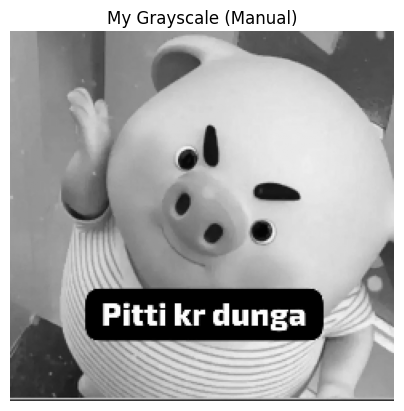

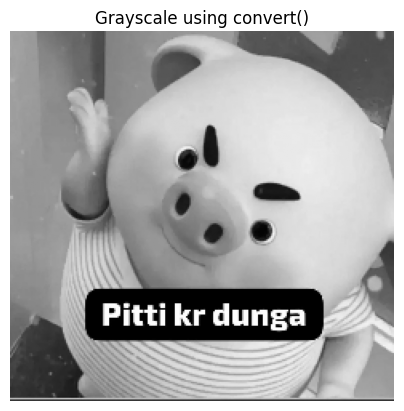

RGB shape = (231, 240, 4)
Gray manual shape = (231, 240)


In [11]:
# manual grayscale using weighted sum
gray_manual = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]

plt.imshow(gray_manual, cmap="gray")
plt.title("My Grayscale (Manual)")
plt.axis("off")
plt.show()

# grayscale using PIL
img_gray2 = img.convert("L")
gray2_np = np.array(img_gray2)

plt.imshow(gray2_np, cmap="gray")
plt.title("Grayscale using convert()")
plt.axis("off")
plt.show()

print("RGB shape =", img_rgb.shape)
print("Gray manual shape =", gray_manual.shape)



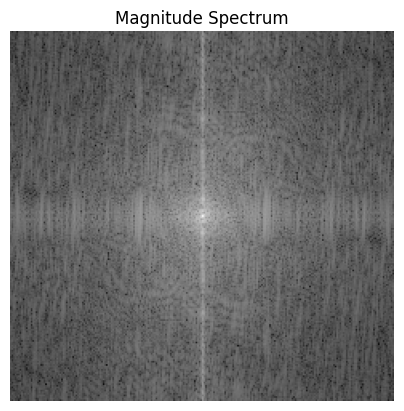

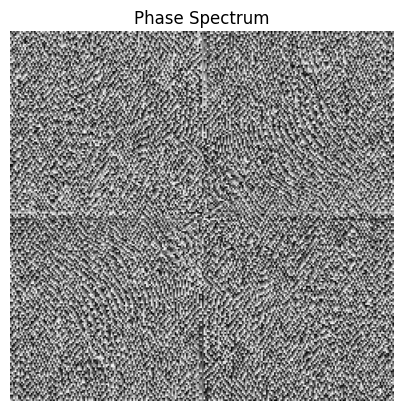

In [12]:
# ---- PART B ----
# FFT of grayscale image

f = np.fft.fft2(gray_manual)
fshift = np.fft.fftshift(f)

# magnitude and phase
magnitude = np.abs(fshift)
phase = np.angle(fshift)

# display magnitude (log helps to see the small values)
plt.imshow(np.log(1 + magnitude), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

plt.imshow(phase, cmap='gray')
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()

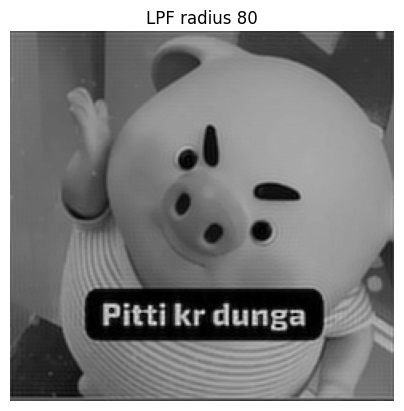

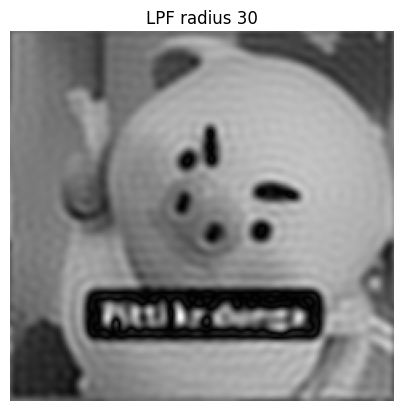

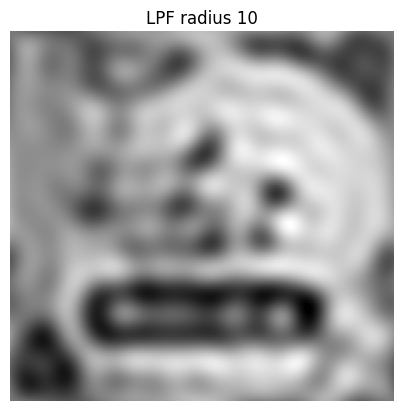

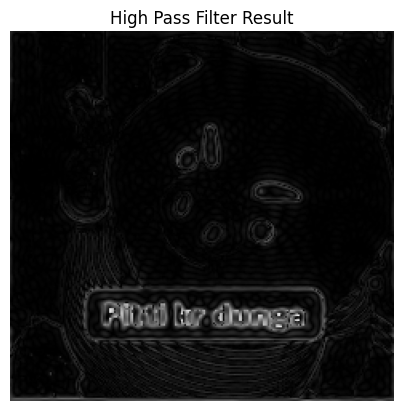

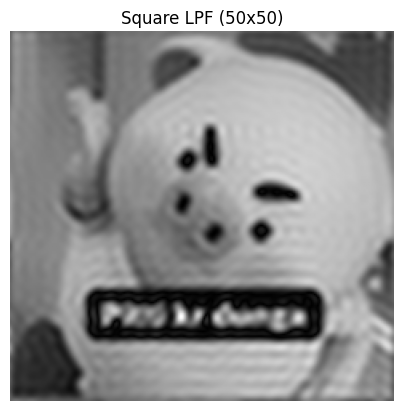

In [13]:
# ---- PART C ----
# Making some low pass filters with different radii

rows, cols = gray_manual.shape
crow, ccol = rows//2, cols//2

def lpf_mask(radius):
    mask = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            if ((i-crow)**2 + (j-ccol)**2)**0.5 < radius:
                mask[i,j] = 1
    return mask

# LPF radii
r_list = [80, 30, 10]

for r in r_list:
    m = lpf_mask(r)
    filtered = fshift * m
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.imshow(img_back, cmap='gray')
    plt.title("LPF radius " + str(r))
    plt.axis("off")
    plt.show()
    # (smaller radius = more blur because we are letting only low freq pass)


# HPF mask (opposite of LPF)
hmask = 1 - lpf_mask(30)
hfiltered = fshift * hmask
h_ishift = np.fft.ifftshift(hfiltered)
h_img = np.fft.ifft2(h_ishift)
h_img = np.abs(h_img)

plt.imshow(h_img, cmap='gray')
plt.title("High Pass Filter Result")
plt.axis("off")
plt.show()


# Square LPF mask (side = 50)
sq_mask = np.zeros((rows,cols))
side = 50
sq_mask[crow-side//2 : crow+side//2, ccol-side//2 : ccol+side//2] = 1

sq_f = fshift * sq_mask
sq_i = np.fft.ifftshift(sq_f)
sq_img = np.fft.ifft2(sq_i)
sq_img = np.abs(sq_img)

plt.imshow(sq_img, cmap='gray')
plt.title("Square LPF (50x50)")
plt.axis("off")
plt.show()


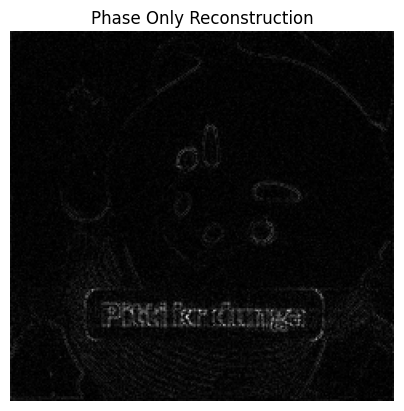

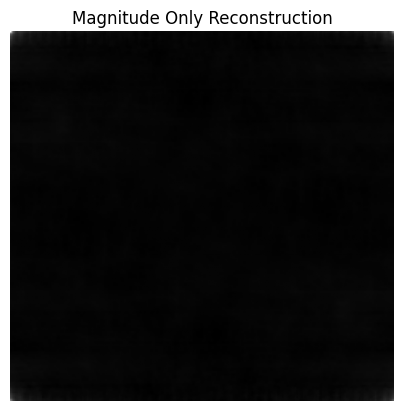

In [14]:
# ---- PART D ----
# Phase-only reconstruction

phase_only = fshift / np.abs(fshift)     # dividing to keep only phase
po_i = np.fft.ifftshift(phase_only)
po_img = np.fft.ifft2(po_i)
po_img = np.abs(po_img)

plt.imshow(po_img, cmap='gray')
plt.title("Phase Only Reconstruction")
plt.axis("off")
plt.show()

# using np.angle only shows angle values (not complex numbers), so reconstruction becomes nonsense
# if you try: np.fft.ifft2(np.angle(fshift)) → gives weird result


# magnitude only
mag_only = np.abs(fshift)
mag_i = np.fft.ifftshift(mag_only)
mag_img = np.fft.ifft2(mag_i)
mag_img = np.abs(mag_img)

plt.imshow(mag_img, cmap='gray')
plt.title("Magnitude Only Reconstruction")
plt.axis("off")
plt.show()
# magnitude spectrum uses log so it looked different earlier



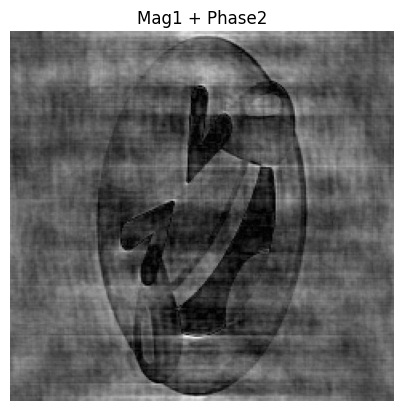

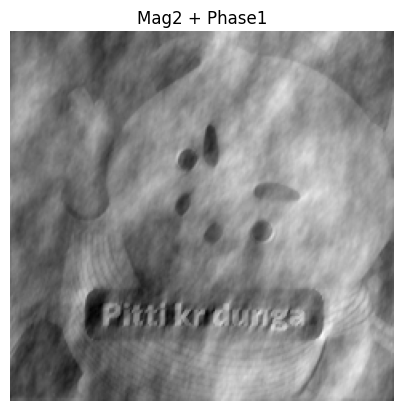

In [15]:
# ---- PART E ----
base64_image2 = """
iVBORw0KGgoAAAANSUhEUgAAAPAAAADnCAIAAACv5EzmAACRL0lEQVR4nOz9abQl2XEehn4Re2fmGe5U99Y8dFVXN3pAd2MGARIgQXCwKNqk+DTQkrWkZ8mWLNnL9rOXbK8n22s9P1vPttaz7GU+U4NFShQtkZIoDpBICuAAYp4bQzemnruqa6668xkyc+/43o+dec65t251VwMgcC+AWKerzz0nh30yI2PHjvjiCyGJ78qrFAKEARUQARWIAICgFkChShURIUADCAAiEK2BISAAiU5EYQbQVCphFHbEHAAKAWlui5ISKHe8RyKqogqZGRpgCgEEBuh0W2s30TTYmS9s8l5n95g9rcx+TLbfCUQm3+0aprzS9nc+xasd0mR7j+/K1yoGDzgAgCig1HS1BRHCpMOiaC88gTEwNjDdVA9nimgVWQmMVKIgYCCoQgEAGsV2K8rOUVBkp+J+R8t3FfpVC5uXGpSt3cvTFzBIoBsKKkABBSrECkw2vbRYSzK+LhffVVFRBaJAKEaLEK9QUpAUWlVE7jwWpG9fbovvMPmuQr9qEYBIUzoAGGtIJRGgig7hxigvIqyyKrfW1217m6MhYGC0uo6xAmBCcZnLO3mnm/V6rjefHzolblGyZUQFc7o+LTcTgUIUt03m08GI7JzEd2w4VfQ0Yr7ss3EnT+Blt2/2erXbv5pdXtX231Xor0UUIOAIgCLbxk2pK9BQ39i69fT42uf9+HqoqtFwK6uqLkwEZlFhyTpTEMkA0LngdFwsjHvH1R+aWz49t3S6c+JBkTlBITpPZjQnIi+jigR5ByN924d3rdB3J692l2/C9vLdReGrluRzGBEN2EaxyuqyXH1p/cWvbm4/F+LljJveopkJbB71vJdmDUkSTIu+wBgtmCAyVtShFSL9aN2tup8fe+TMPQ/3lk5i8TyL+yKIO3sdrcshO3zo25Z9u8ePPVZUeic//Lbt0yJv9/Ju1/Yzu7zC9t+IIU22/65C340YAFBBQAKkAgNCifE6w+po7enrl76gay/1bCvvDcp4NYZQZB1RdSpFLHMrYaABoIjQYGRkMIvWhC9IczFkYFHJ/BaXyhEExaEzb1p87I8Wh89Ae2BhKNJgKEI6ABC24ZXvKvR3FfrlZBIzUgOBqACCR0Twq85tCoY2vhye/ujWC08Els5ZJptOBqZBpGp8RQUBB3MkCSObGZQQMpohmlAcVQghBV7hjFKZS4vCUek2wsKRB3+g/5ofcL176U6oU2gwOEPHBEoqmIIr6di71fo7b7X4XYXeU5JCp7CFEUEArR0qRf5SPfxKNb4wuPg5u/r5OYzUOVKhQ0gNgahQKAKKsgkEC8G0LBMQAiEYiUhnohQhxdrtLEYzkgTV5Vvj7OKq9A4/unj6jSsPv9PPH4N2KfOR8zFFQUAVAmyXXLMLwclnd4re3lE4s8ddOrKzkeY/1O1ffpfvKvSeksJxETCDEVFQa10h1NXq51df+ODW2pe6+Vpf1nPWEAEVQgAqAhEKVdSk1eIdIQhKo7iE0VEQRUCBkFTCjKSZ0WDR5xWLcaVbq+M6+N7J+4+97kfmT70V2SnDchQf4QBxoMIm91h2q6xiZsbB3UWsZ/MaL+cqTH/YnVMn34jt8TKplp3yXYW+kxCogTERAC8YYPzMjYuPj57+YBFvutx8FryuSRwKnYgCDnCQFDZm8rdnD5aCfcm2CMFklSmMlj4nKQSBpNFGBJ/DeaksG9c2titbIS6cLs48dt/bfgLyAP1iFbOgeSZeZ1aHuN3xACA0AJNv7xQWmY73LswhZ0KYMzqanun2bHfcZcf2kL2HtNf2SAp9h+2/G7a7kzRRZmAoZoMrn7vywu8Mbj5+hNcO9Tsh60R6CNQJ2Nw9adZoQkGjmzPHmmQLm09ExCWzI0mbrb0/JIxiFMKEVS7WdVFzyLxeHrx47UsXqu0r9z34Z/KTD2duQTEP9HfrcOtt7Phs+qPu5sfvO+87eWqvuNl3FXoqJCnYiYuoicHac+8rr3w237qwlIflfI4ItZTRBYV66wIAkmFWTUmQtMrjdPKbnVMFUEEKmIpIE54gRWACtuMg6aO5EH10YBZZq1Tnjy8eKcNzX/7UU5fw0A/8pL/nUc3yyP7sfSaMiEp3RzP5bS3fdTmmkhQpec9KQjbD6OmXnv0Qr32oU17viPUyeNQmVmWoXXQmWUzGNyGRGvXcQ6HbmTPNkwq0GQCJbE8NUDAJ45H0MfoQXfSIXkmiruo6VAyhuHKr2LC5R3/opxYe/gHkjxAdiDNxAAylIDgWrUKnAJ8ZkM58Ny7H3V2vb6rLgRk3+mVcju8qNIA22wYzqSClcZyNB9x86sYzv1aPvrDox5mI0AQUkLAgjf6pNeoMwSQJTU4gHhDuXhQ275JzwgRF2pGUJgkaSYE5RoFKFKa8DIkIjVoOsyur1ZZ073nDjx555N9F/zR0PqozAbEtiMquWosDEVBSxLtV6J0yCeIarFlvfQ2x5P0h33U5ZsRUQcpmptv1rc9vvfDRuPml5bmtXGhtFKEBdU5iYenmSutVtN70RBGmn+4SgTFFR5pDpMUiWuQTQWnzJRTQjCF9ZSLW6eDY4Rybw+c+974hu2de90e184DjiqhQswgzUIRt4Hs6OXzby3e4QrczfHIYokKixLXttc+uP/PbYfP5ua6FKCpwukMZVNrJkmiXhDL5d1Z2K/Ts2+SmTDebseSECFVFZRKekJgWRSKmJkqvWJH5OBg8++QvDAYvvfb7/iqKnsYeXG6aHkAK+fJgvW8/+U5W6JlgM6NC4Q3xxvjGk9ef/uBcfGqhN3BZN0aaJD90r0PI7iPO+hcCTJD6M/Z9cm6iTVwLZj0/qms+R1JIAVR9SpsLgRAZRWKXOOEzbF+48ZXfvuQWT73pz6D7OiAXZnAEW39S0oJTprGOvcz1HjGE6ea8mwjDfpDvZIVO2hwBU4GgAi5tXPj4rWc/1A+XDvdH0LKiwuUiQomzVSN3urec+f9MnO5OULmZNSNmVbpBaEwOIwKIOigVQUOEmFEQXV3OMd4z1y3K6uqT7yk3b55/x3+E/kOaLQZJ6hsmj1IqoJmcb6/RHAyVfXn5DlXodhmUbrkJpAy3tq7//trVjyznW724qaOIPBOnE31oowPJ5jX/2MRTEAItKi69b9bykw+wK2uY7GRyNgw2U9pCNruTSm3B/taYVSVgokqqVt5yjUdWZIP++trFf3XzK8uHX/fvIX8dIILYnksBu/NjuJccWD/lO1ShARLRmuI7Y7w+uPyp1Yu/1w3XC2O3GxELIDSbptzJNJJsTQJ7110XQvZWGhPo3gZ+OvdT9t57sgXbR4vMIEaJUaOTWvJ+Zz52sFGMB88/+avZysOL95/wWHYCSKBM6sS+Jjlomv2dqNBtODMaCHjlALe+OH76V1fiiz1PhQVQvIAegCghmEllW+sdU2RmLSdsktoQ4cwSrzHSkvKJzQKSk8eh9aVbowxiEkidhNzYRkJIQJ0SpFGq2ofgaoctZK5fHI6b637r1nMf+Pv3V9ncve9G5xiyYDBj5u/GYZq5OE3wbmeA+UDId5pCT5doAg+YYNvWn1h9+nf8+GI/HzsKgCgCVZkG6TmTDBY0VasTHWHrOEy9kalM4rgTx4QziRagiVjLzq1nvN0ZG57WjyIUFaE68xphRlNqpt0FSCHb3Lh2+dP//DWdTM6+CzwUUJiIE5FXo5QHSIN3yXeiQjN5zwQQuPWlq1/9tWrzC0sZoUoxiEABpQHWZqQ15U1ASNK/JmIsoknX27AdZ1Mp08xf+zdnHoxJ2GHmOUggpsnjIoRo63m3dttEVEVMVJEJo5gIRQR50fH0GuP2zS9ufvaXFleOyKHvIbJakL/ay/Rdhd7v0izRhAAJ2hhhE6Nr28/+jmx/eSkbFOIgbKHMjS4SbDKzO8LEQCpOhcxq2kwWcMffE7WWBlDa+haTj5vw3g4dap+BJt4mTZhCoMmJpxAiOUFISHlAUZfnvpivO9tXR1c/fvGzp+/53hNS9Gqffz33eTY1uM/ThPgOpHMwCAnBSMKF0eX31zc+dbSo+14dCTFqpDM4UqJpNDXTNoh2ezr4zjd3oq0ETCYqfiez93Jawl1/CSARUkOomqnkKl5EVERECfUec/PS0Y3rX/zXlz//G3m+3QX1Zeu9X1Hah3q/azO+gyw0gGSmCROBjMv1x7dvvX+lu67bwaSAr5pSPaFog65owM0CiKRCJ9HZiME09pFWgrcnCqVdA6a04iRT3uzbmuEEvGvHOHP8NF9AKBBrv1ISUdVJ9AIFKQpahAEgVWV+XmM4trV64wu/cvjsG3qn/yjgmiPbJPJ4ALTza5DvKAtNobjAPK7HrWc3Ln2e9WXGdeRQB0q05DdPDao0ar3DhL4qPVCIA7P2Otvt/sldiQACU0QVUzOJECNs8mQ4WGbMjVBXO1fnHfR6HQctLzzx/v8zrn8OEo1qFJtU0x5UJ/kV5DtDoZubFwGQhrXH1z71q9h4KXdZ6VH6Ycy2mQWopBeZuOlUIU5F04TeUL5MjKxCAGUiSKKAkAaYb83LSDM182YKS4BSa16waZhEZHpqVapC0zlVREUFClOYirn0hlCFgBpEa9WgNIkmRnqtfVb7zM8tdFaWnHJw9ZMvfvJvj0drY9OxISRmMUoqRLedpU27RCAKncKyDsIz8B3jcjTT7Jbkq6MLvxNHXy76I5GRKQCjGXSnR9B4C7OfpE8nJjtFkve4yRPXQUBqmfKBMGkJar6WsQvgrQ1pI2+CNVLBRaAGhS4zcdGJgZGqUkh/vntovtisXnzxaV56/sz9R4IZRY0ikjDbENxZnQ+mfGcodKN5EbwyvPG+7e3PFfNbkE24SkTEfDLIMtVXtC5t+771OFNlSnPQ24LHSdhC7EwMOhYapDDmKgkzx9sLpF5R1OBT4lIl0hNCiaYjojIxoojIasuGztWQWgtkvaDzm1E2XLw6zJ9+/MvvWHjNmaPLARBBRmZCRUxBkztftYPnZ39bK/RsTkJqYCOuf2bj8u94veRcTQ4pALIZJW4gnbMicjtd4q4/9zC6scljU9Vp1hls1PMLS7EqEYfQSd5vmkyfzazM5All8j9tM4mAOFGjmiDFyAFP9ZFSZ8Xq/OEtObo6OHRlvXsrHh1qf73QDZPx6PCTH3n2xPGtc2dOve6EX3FSUPpChekdE+M7o4+z7/exnn9bK3QrhAkGCC9s3fh4GDxVuLHBVIyTUMM31DucUIcKhdbzutjrxnoYQyjzHMAu2ua7OjnbiYFihkA6EyM8KUYfssN15+QNm//YemdVTr24vnRtdGiA42OdG0ofvdwJXizDx766Off86NGV7MffcvbNK34YmdG6vlFohdnBX1N9W5dg0dLSjQjRnhvcfN/mc7/a5yXHMQClQpyTTMU1qi2UFsjfFq9CRCi20+XYeRJJ/AM7JmhTCOHFEYc3N1Q15DmLThnDOhMio8VLJGjdDMKUpO2c7ltsiLEFMEXSAAfrEBqRX/EPP1k/8IWNY09traz5xWtufoB8fpQZiiqbM1cAVCFJq6ru1vXe6Nqf/P7XvvvhldMSF5yKqACCQCjhJlCUXaXkwL62zUm+jS10WjdFWhQdhu0vb1/+rB9vznU6wSzSABU4Qr/OVdHt9PqRzixT198YdT/20Usf+oMv1bF+81vOv+vdDywe8mJDJ0PArElFvrKvKkCEC85BorJSiWaxspxuvsTyZTv+1Xj/e68f/crmkYXO2aHOjTpzQX2NmiameS1KIcxCDFlWxIWjYye//PuP31w/96e+94GTonNAbjUZRJ2JCwdZLQ7uyF9GErcigQiLjFtwV8ONj/r1C/Ox4HaQLIMzZZsJBwCK7lGWYmI6yRMK2SLsml3S5000eAo7CtG5bHGzWv7lX/3Sr/7KE2LOqf/cV5/78sXRX/hL7zx+qER9kTaegI0A4aRodur/TCx3erkghUqpAoJROyO3sh6Pv1ie/NDWA18cH77g7x0fOdIbjmC1H4Xg3Ei9qIEhcYVBKJ6wWMKhWPQrZ9//lZsjLf74W889VAhGwyyjaGFIsTy4NgAydeQPgnxbKvTMasaobmtw6+ODq5+az6MfebArjJoAQCImCbvftESZuBqzNYIUtoGN2cgeWwuraFZ4DYTU53S+/97f/Mp73vOEsdOfcwqJZh/8yJXT55/7C3/2sVBd8SJMz8okRZ7OJ5O/05cNTMiz7kgJViJlkGwsZ25lD312/cRnbqw8bQ9t6OESh6IVQ+eDuBodwkUNAja/tBm0UCSoNyfBzHez3/z8Ne+7K286fkqzwhuYwFU7lJfT8aWj7GvV/jZWaAIGF2z84vaNj+eyrvRBCtXcINPi1gkl7fSmya4DJRvVuBYy/Yc7lW9yEOf1woX1X/tnX6pKPzfXAeqqrrudjtXZ7733Kz/27vPHFjrGoWiyyC+PbGsO7lBl3K5FSvFDf+zF6tGPXTj82fKhC3ZupMcq5FlwKjrUxSAI8BQDoyAIBHANCtDEqBEuiATtKwoudD/8pSsPdOVPvf4orJqsVvW2QaR/9rk249tPoSe3xCxa3PZ6a3jlk7b5bAdjYUZFoFdtSBVNIKrQxiymD1vItE6C0Nil8LfJxHCne+78/G/91tMba3XeWaxrU42qUluMUa5fGXz2U8//sZ84UY+2JAHnm6li5gDS2n+08FSoxboO23H+zJY/fhGP/Ou11z+5MX/Lnd/MjlXemRhYEj5w0QSK6GKZu1oYGGmBpNBEqRSvYlFc0LyEV9/fivV7P/3i/YeX3nIqz2hq5oWEHlCwx7ebQk9EnaijDZ4erj7RCaMMJGpztDZ6qxBOSG6/QXE7AaC6fiv/9MevZoUEEQOEVBWzyFiw5qUL47qULCtCXe513tmHY/qhZE57y5vFuWcH931y4/6PbZ5b1UPRHS+1G9wQEsBIqEUg1hoGcy7OCzKRhYUFVbe4mAkRagTi8lp5bWM81iyIq6OEbPH5rc1fe/zSuWP3HvVOWQmjILc7lrrva/k2VOhplJdr69c+auVLndhVxOhKcSOIgZla0j2hapNQgUBMp7wv0izZJPE9J9KXnTQXk1AeRCmAmsB5/8TnVtdv1lpApCYdJ52y/EJZuksvrVblWd9Ne2pTMdBmU0QFYpPlYBPUg8Sss9Gbe3p49sNXHvzC6DW3siOlXwzsQVQkRtGIjMiU404cHcrrM4fmTi0s5IQAqhCFd/AdIMPhTudpDRfXKtJF0ZoqK/f9wbMvvfGzl//EW07lMKAmsm/CnfrDkG8rhW5DpWm1tmWrn9q6+IV5qSV6iEtVVZK8iqSpO1B0Mxg7TL3iuzPdBAtAKANo78mvvjSmQGCp/qXxwQExUdy6dbMO2yGU0haGzMQQDDCIGSQ6NRGJdESNzqosf7m6/6M3H/rsxmu28nuoPUjHooc6JwXrsSOc1QtOF3tyfGH+5KF+FimJqYygSar8hmE5x0PH52DbF1bHI3o4f7OM0c/97leufe8jx873RDgDnDpo8m2m0LFZ7DFgeLF+4f2L1Zb3HmIJDSfMPRN1rSSeNkwqUDXVgLSK3GaeKZh1cPc+rQAsBISWNfWFq4NxkXuBUKFM+GUAwQbqy+6c5b06da7ipE9FGyWhQMQIiapBBCIFu1ty7Mvh/vfeeuOn1s8Puvd60EeLDlAxJ56drBp1ODzc9eeWF1YW5lQoZgQTUQMIusTCBwWzqlrwxYOn59bWhkaWQssUi/NfGa59/vL6PfcvZYnAesrJe0CAdgC+zeCjBAWlICJuVjefqFZfKNQUps7MgaJKURNt4EZNj79Z2X3Al10X7dpVBN67WNr2cGyqENcWfLXJcCUR+/3M+6Y2sQ0LTsbfvHeMhY06sQK7q9nKl3j/B2699nM3zo38qSBd4xyYCUVoEoPUVc/r0fne/SePHFnoegaJIfVkTnrJNg6dxqMwidbNZL7Xsdhwd5jK2Pc//OTlTfpKOgc3B35Qx72nEGaogBG3n7t15ZNRRnDBuQiN1EReOAlezIQvXjFTd2eZKLMiQoLzvq4xHFS602+ZjC9Gdrs971vXeY+fIGAmdC6as2yE4y/iNb938+yHrp2tOq81dhxN6GvJDc6LuTBCNZzvuLMnl/udDODdYBnSanhuoZiGMoyU7Jkbw+c2hxVyfs1X5Fst31YuByABwWN9PHgSw6eyrAKYDHLqc9lqn6S0hgkkBSJEmgVfq2ciiVdOkPjJAZumWtKHQuXUCdYARqijdOq6narTUWfsfAjxxMlDLstZKZPhTqjV5qRQOgCRWR2zDVm6VLz2gzce/OTWvWvz57x1pZ4zrUauhhYi4hEQxstz+cPnF7tQH2oBoXsYKQKWmsoBVAFR1uj0vLa860ox11mPCx968urZd5zP2ATJMUmMHhD5tlLoBMyw6oWNlz6Y2031tcBEHARt+dM3+N40XkpKs8MgrqpdXd9pc/Vejx49hDsbUQHIbIzeqJi7kd3zO1eOffDW2WudRyrtoUQmda0c5L6wvGBQxuWF4vzJBU84i8p4pyn3NpInqIM1mBYAVOfqmK2z/6UbYa3CUn6A3OYd8u3hcpg1KTUn8IPtrww3n+hlQbSGBjS8FRQhxCAGkJP+D43lNZFUrofmBZpEgJDmwyQTh9hkpxOtkS5C3XAcR1XLhbBrmIJev7N8aIkWRAUecEalpBIsaRdwzIb+yEU996Eb9/zejftfzO8b61IWul5KZNdHxXAr6wZxkcGjPrXSX+6BVdBYaxNMsb1ekyE0/yty1CFGo7UZ0yBZmS88d3N8Y3O8/zOCd5JvAwttqR1gwlwW9fbWlc8vdrc8epGx5TycrL1ISRDMCQsjJv16bgvb7cb6J4zprrheek8lYDHqYODqqj3SDgg/SBZdHD6ekYOGpEMjCNIpHIOISsxsSHc9O/mBS6c+ePPetc4j2jsmlYOIiad0iI5GgULrarkTjndZDKnGQqCWWl6lB3QyeqKhzYEIhKyNwaMSbI1DlJZTzyzCx2z+xjB/6tL22w53draFOTDm+ttAoUnE9EMUdXXtq+HKU73euDTvhCowRBVBUyjCpsFJCwNKdbOU1PYnpVESN9JUbWVGP0WkMb3J7U5fSCIZkBDc5raziMTV1WTUWy79OrC3UB85QUqkSFOF3TjZTrOOOl/6apCtPHl98V+/cHJt+R3Bz0tpmdSmzliQhY++TzqHQnnPoe4SK60zIVRTU09Ns25spyCZmmcm8vTauZjppdV4cXVozrWtNDRAa3pB9+mbWwGH3TRm9/JRy/0lB16hJ7hzQUR9eevK5ztRvBWVBmdpEiaBFksnTcmqcFYp2aCUiImy7gSdTSoMmVKKzaeNeUuJHBPJOr2qNgMpEJPWa2/ygWb1iROdvKgAQJRCwgTOkAkcpXbs5vHYaHjss88slsVj5o4aK8CEIsLgkELVHpAQcq+9+bkq1j6RzIhrwagAEDU5TrM9KlswlZdhxIWrq6NgdHnKuaSQuzKKyotr1UbEUQVvI1jd//LtotCMkI16+6sYPtuTXGIHbsxpywfMaP70/ztgcu02KeFCTJVjl23ak/eWAoPkeV6F0mhtG6iGSyz1SRbWR48eyjtgZWyQqxYNQhVRs+LZp7ef+MyLn3xerj7455cePLRdD+mVjEBiSohQBU2RW6jFaZ3pwIrctWRlnInC6cRCT6TBYA2H5dMXb1zfiMznTFxLNElhzBkd49qAg4roHkh00reBQotAIRXs1vDKJ4v6YsfqEAuTioARKogNDVKis2iZ6rSlmEstjadrPAOo2qSKm9wH2m2nxeBpdcgWPw2BhBCGo5GRO3E9TfZb1FaOFOoDqvRYgMoQYjle7S+c+PV/8tR7/sXVy9fCVs7hl39+5cfml9/+p14qXR3r3HUEAkcyCgCac25QxqcvlWeOFIWDGkSbH+c0PV0wQSRCxRixvR3NMNgc0uJ4tL5VGYol08KM2qTg1YMZSu9stdThuNZuboDYHdse7U856AptLdnFyIbPlWtfXuKthqjcCqBSaIpgYFJP8nXYnb0t+ozZN9pwNCJv31YIdnI5e24eqJM5NyDE6IrewtzxX//nX/4n/9elWBbd+cVKtzduXXjyPX/vDUfOdu9/V71dkylh4pu8ECFAgFzbDIPSuhqFYRIgT6a6dTl0sDWkAVCajAclyH5Gy7oBGZFBTCwCRoiSmZVOMAhudRxT4OhrZBL51smBVugIsOHGt9Ho0hddeS3jEFpBMrCbbG3rNzcxClGhNcWwogJrTLXodC2vOl05YuYZkHZRiIaixXb1xLZog+0xm3Xm7KJKQDjvTp9aFhkZo8FB4POiv3z807+/9cv/6OpgJP3OAsUpthfyXn3jhesf+I2F+96RFbnUKlRYBnWgAwIQDFJB18t6YKUwCGA0kmZE60ND1GvuNBNVwjntiZG2WZkEcSYicEIjTKymiGNwgm3zq9sEYJZIDg4SluPgKrQBVWq2oChZ3xxefXaOJbNotOhMk6ORcl1tDI5oWp/cNodO1/KzJpyzf8pky8n/pjUsiVVRtTMa7jy0EKZiOSzO9dHrZrTQoCwUqodXL/Z/8Rc+d/Mae/P5oKohtc/9nNNel9e/8vH86pfqE68lXTcAoqS2Aci0pgQplEzETT0haYaTBh5NIsEAMsJUicgiwZ7EGj5rZYREQqMo4EQ4GFaGLhEbksqDIwddoQsFgc1q49lsfKPjbeQBOIg5qVJWN8XiDJao6UiKNmVXM3COlHZJTrJODLOJtUlxoTA1qk9xXQDNgi9B00RExLveeJhYv1IYpXGz1TKLduRI0ZvLYywJIcyQZ+7sr//qxcc/tdGf68Yo0CAqzrxaSdpSdbNz9cny9AOmnY4ECkhTyLRVXAMbzPbUuXa6IYwQSZ3MKQiWk1BTGtPvhpASlYySUVQxrsdjwxKlmWp2Lq/3tRxchZbGweMQdm372ldzHQKlCSnS5hEUCZufHI8ZSJ3MKLQIrIlLi0zJyWeWialEajafkuICO2AOBBANw+G4AeWbtCoPCI3l8ZMLvX5NbJmYutxnx57+cvnbv/npXk+DNXTrTRCFFCHr8fqVl/o+H42ReiMDaMvLOTnpHS1o88WkfrL5jCmUSXNM7WxpzZkJOEsFZTqJ0qR54MAUZB3c1LcCHjBgy7afG6w+7fw2tZSpKwA0njFUZn6m7HwrE1/59gTgJN48gV/uGsNUq0ABXAxhNKr2OBOCYdztQd2WYUiGyGw06P+jv/+RmzfGxpjM520/UbfWN9yg7IQEbJ5V5a9dEgUqzMAACUBM7QBIodFMAG3grQeQhOhgKjST/SsAQLaGN59geVHdJv3IJQVtXU2akIwwStPvjyrUva1Na5XTNNx2LgGgiQ3ATIwtGiR9DkdoekFFYozjUVDVFuDR0m6gFFcdPVY4V5tFkWKuf+5D73/h05+4JpZZzNKP0pkJRERIuMhesI5Nkzm3id725+Q1uVhN33uSMDZkC0hedUVGhQoyUA3Nk5UX3QbjP53VDoYcTIVu1m9KmNWXw8ZTvWxT3Ba1vJMN+/pMjQG2V9KMO9hoxczieFzevplx3O3z7L0rRjXLe3MnXny+/IWf/ywAsTmwtxPEbJMQeD/3/ShFEJ120fp6ha0ARkQREwroSaU1TeWKrjNgBqV4YOQAKfQsjqxxLAxhsHGh3HxxrhhDRpSaYiKmQk0gCU02RhsCmSYC0HKYiyaO8WYhqAnSkazyNO1rmKLt7jCq5PvCjNuDMWZCfikrTkT1/tSp43VwTg9V44V/9A8+srERCSUKWq9FTVMYBbEBYDjtdHt9n7nUFlxuR8997bdPmPxyaxcDnnAmSkJhRZ743fVAaQhwcIbLHe8bZzKqrW+vPqP1pqNZ9GTWaJhMjdlMpkt2RezuaHl2bX4nbWaGVOsvGcSJsK4KCy37kkRAVAVKE8wtwndrl+W97pn3/+6V3/+9q+oKijcJJjNutxhgojTUY5NBd37LcehYKpgg1zumoF0LVbn9czOaWRtyabebYYBi6jpANSiged6ZD5tLYbOw0kU9cGiOAxHlmL2F7foMAhsyXKo3XpzTECtSuobYhJ5Td7YGNpdCsjFRBIBCGCbFfJy5z40b3cTgEuIZuNMCX8AcBCSK5UCAk3LoGcWpA5iyxjHUuUqgXzoiC0e6EL121f+jn/9cVWUUMclEqgaq2vTvpMACBd6PtadHTt5CLDMEB+XMeJvCAmnj6jvDau3nbGxw40hMmZ7akJ5QYJrar6SOMLnPDofr7uZL7vijzI7DSwp4HxS9PigWGjOTuzU67Uajmy9wvK4NCFiN2sz+IiJOtA1Di+gdtDIheBKEfzaiZ81jAejLcNxjGhsTEYfxuCork6YIKgLIsoLgcDQ+evRoni2Cp/7ez37qpZe2XOYomjB3s49rGn0JHft5d/jM0qn7LHqltjBuTosR+XX4G4AwBdNTLl3RrJRp1caKXl97/qOhvC4N2uWgKDNwoBQ6SbrEBGvI9mD9BRltiChmewFK057nbo94p/v1Cvfx9nlDxlUVA6W1iABCTRDdPg4tLyAs/u5vPv2B338qyzKXuTscn7VozOduVoUsn80XjrmQZabu1QfsSOPtYkazyTeYpjzT3EUNt47IRWx+pbr1DKw8SOtBAAdQoQEkHYxh44XRtS91OXLSxJubblQ7o6cxLetFiTZy15jk2TUWRWmCphtVEzaDyh0ifO04po6KAqJ1hVGZUhFKSwk9R4Ehnjh19PrV+A9/7mN17Sma8s6TxWt7QBHxlWnlF1excOKxd5ZYzKyXRRFS0c4zOzrR77yD1KZqxUSN0jTcmgWcTF9GWFvmqyJOxKnN+cH5/rUVfeHGxc9ARl/T7flWysFS6InXIbBYbV3Oud7zATPw5cZLbM1Ps5u8on3b8eXXuBASNxpVM0GxdCxnMXZ62blzZ//pL71/9WZVdOgy2N4TiIRovtO7NbJjr3n94fOvH7LnTHPjy/s9e4o1CZTWUhuNcWKcrYHw2WSkCRtScPMILs7Zi+XaM6i2TNp2iAdEDpBCC2DJMQUEqNavPp3ZRu4CEjOBm7rLM/i4qUzTFjNmV5uPU0JxRwohucJ3cr6BiaVsr6HI9nAUjWZxdqNoPHqs+9xzF977W18s8iIvYghD53Yz1iYyUnPZoHa6cPz8m39wWCxV9AA8TKfrh537yGyn0HQUI4021VRCQTWCMFhsD8L2yXUJvy2ksPZx9RCuznO1Wn8hlKsvcz/2pxyIKEe6XUmbA5iLCQaXi9Uv92UQfQnRBnbQwDsJoaQakSmSBy32CO2/DfK0+VJSCKt9CyTCijvwtuyI51EoYhCMxyUJ77NpGEWjIG5u8F/9xqesVlFfjYP3EkKD8UgxCkHtNFaZbnN5M3/w+Dv+VHjgbTdcEV1VZYyMbfmUCCnU5OI0Zb9pDNpyJKWqyKYyTBKGzsSJQS2IxAYFYxSYRK3EB5cVMeZ1kPL6+YWN5XK7V0ULl6pbX+isPAR0D06Q48BYaGmDUwYIInHr6cXRhQ7GUStrmICS49HkMtAG3WYgEG14ZHLMSeoDaWNydk0/XTPdaTxJFICBgI5GYzOK99Pgt9TquL0ZL7ywVeRdi07YY+ioZDr5VUq6MIpxQ3m9c+jI9/3p3lv+2KXuiWGnSykrPx5l07qR2bB6cr9T6h1Nbt5kejGa4ZGpHiv57ZPrkI6ghKcKtc7ieCVcfbR/cwmjvJJeXKuufgZ2CSgPkEIfCAudhA1EQQCtxhsvKKqGv0hAQFvohOxyOSb/azAeJjNYpSZBiKQpLYj47ofUhG/T8Li9XUbu4R+LOO98g2ae9v1uDmJi0VmZuRfRufeH/m/9N/0bV9xSReQWAopJO7fUNGvHYdPLGiNv6Q1Jg8nEj6c361YwMIAmSmRiDgaj1c6yoB0zc6Og62e7wweK54u4pqJqtnnthYVqVTunXs01+RbLQbHQ6d44IAeU8dZg+zkWHqpq2bfOfkyNPUlQBiPQQNszdCt3+lNoBDYre+Rt7z7/9u/f6PfKLMuQFTEX5mAGOMDjtpXhxDw7whsyQo1i7ZqYFKMavVmnjkVtagpzZjlZgDmQB3Xe2K+rgts5L90399IZ/1JHRxQo3Hjzerl+0SHi4MhBUWgAAnggB1huPzMqn4sOgLiYzUYlbgddNCEOmZaO2iTXC8zSC03IWdga0mY2fyUhCWo5rjY36haJOkVBsFE8ScnDyRpOFHnmnECNKPFv/cg7/9iP/SDGayhv9SR0ID2fCyZd7MWJOvimnX2T4bcdg+AkqGzTkxkUxhSjNAE9qCm6EcFIiIWco05584x/4bULXzyMa72uwlPpRhtXyvWXDlY78APkcjQxZGq9tvksccOcRU1uRLzTwi3JZPE0BeRPwgI79pjtqnY3wDZCrKFkVBX1o3E1E73YfQBKwgO1JeFkjKbqwrD+t/7oPX/xL3/fjTntXV97fPVLXxmuj+LKwOZZHNkZdWzHLQRTyWQqUICxnRxa1WaT82YEh7nRpDYllVKl2h0xehMTGscLcfNtx648MH/BbV7r9IvBltMgmY02rz639FDVLmBeBsW6X+SgKPTkRiLWw83V5+ZlgzoXUxnKTiD6rAM983Fa+U1CWW0zbmkc0BRzSMuu9BFxN75Mo9POZdRiNKpEk77GvXZmYtNv9ENgsdwa1j/87mN/+S88dLjzhR6e+qn7z997a/19V64/M1y6MTxkeK1Jx5AZPUWFTqHStKpgTC20Emt6SoyzZcibuWgmHBQmQX0FNYGOKCG1svOhFyVEbN/bH7518eLC+AJlELO+aCaER7l9/QVUY8ujgAq3CzOyD+WgKDQApKW+Vet+8GzhaurYYIqolMmSTtJd3bW2k6k2zwA2lJLKtNDWi87EobXNse+9TpxojEECqEaG0GXIBeU0GoPWrgHJWDqnMVaiFoPmTmsLb317/6/8x29ZPjy0uFnQx+3hI3NHlh8+dnHDnrjovrJ162p5bNvfX3dPjMEs1p2oGoXQSs1QBwCxl8U6Z3AWR5pFNmxlTfKfYq21VoOzGNyYUolAzVld+Kzu87m3rzz1gF/rjSunLqa1NaMTq7eeC1uXbeU4yYJ+n2szDpZCN9Z1eLFbXva5iIyNThoyg6TKE5dB9tp1l3lpoWqyew9pfe47sJJPxwKJkADJaazLLFYelreWeKLJzbbOaV2XWS7GkGW+HlX3nM/+s//yHcvH1kNTiBsKbs7VW6/Rlx5clMfy5S8ND3/mwuCJG9XN8Wbn0BEnXpgLvUECzRAivJrTyJyVo41843FMo+8GwLkAjcgiHVlSIpPTgaJgVl+5r//Mmw99aXF002vPMKIyy91YKkfI6Fq9fsGvPBbgmqvh9rWRPjAKzWapNdy+9VVh6YimREqZAA2TyEKKyu3O8IntodCtr9J+ajMb6FQhbwNQ7ByXJSBQrMN4NBZRSEBbZD5lvxPEGPIiD1Xl1dd1de8D3f/qv/mhU6dqi6GBcINK5ELWtYBHBUvzL7zh4bNPzQ+evPbs4zeP39QHNvr3jIuYBatFx9KtkXuBF1+hq+IEIoy7vHcl8qA+sIimpg6LQQ1CQ/Ru9R4+986TF4/4l4SrCk8uim5l3Wx7daDqUI23bl44el8UyVOiaZ+Xyx4chU66Z2ujjae9D1NbDCRNVU5CHLNf7TjG3kfei6vu7mSSwhRSLNq4HIt0Z0fVnAAAoZrVdeWdxRBOn8n+8//iBx94bRZG18O4zPIiOUtKuBZtUXDQt+fmqutHFubfduzM67bdJ6/FJ8e3VnEoWK7SD7oAm3PsAFLDieRESD8+wTXahDq9wRt9MBhE5j1DjpHHoF89+fZjL7595Xp3+0qRl7HsgR1wyCynUyU8Ua5egg2d9AX72jYnOTgKbRQYN1+S0XPOlanX6YSlbmbDhmvuLq598jRsJjCnsw+GEi/jc9wmGiOqMgAA9baTJ2ut3SIflluHD2f/4X/ygw88IOXmc05DJ+tI4h2XNAuRZpaIfznouUplM4Qrb17qnT9y7Or4gU99RZ4t81U9erE+vFqvuPw0kVcUOlWfXH9rIIVA4oRMjI+RVFJNu1bO20sLcukNx67+6JkXz1SXe660OFKXixVgx7S0TFGyQ4xvXUC5IdmR9mrsa6U+MAqtIoCEzWue18VV0gT7vxbTelvs6RsAYRfRsqzrumEeu+3oAghMRoNy7pD/K//p69/0PTnLy07gop8NiSTFbyNvAWLUEFUgYT5eL3h9vrpW16OjoXuVZ1bCqfXOo5djf7V0dF2TTohqiE0YrzkSDAgOZogOSjGp+3bjaPziG45e/7Ezqw/GF+bGtxRaq4erYCrWoyt9p4jl2IHjzcu2uaorqdjsa5zLvmlyYBRaVMDI8Q3HNUrdcC43s+DeV3maA5f2j50sM2085LaoyKsXJzoex7KCNBAhgygIahtZA5QBrP69v/y9P/CjR8qtL3fFaVwQIeS2HsmkkJSacFFRq4Lw9N1xcIPnTmw/f3Tb3fTnTuRvOPqG739KV75yNX7hmZs3VqN1++J9pplRrYncCwRBGLxJLNUPCrm+YE+8aeWpHzm99ihfWBjfUkZYIQLoCA6Mh+jyrFPUG2NnxPhWNVzrrHydV+ibJAdGoQEA28Ptp1VqMjGhmCaEHZuKboESTIvCJoK3W6iqqSNlg/AgU/N6QdPuiqkFMkm5e8JvinfjYVaNBEpFJVKDQkmwOI1GioMM//J/cP7H/8iZenhJAlR8m4SbGSon69T0wJnQPBFoBs3V1avrnZtbi5VK58Lc0Tc/dPa+h4ul7z+Ly+e6VwblJ66OL15eG23F/sLR63VdkRYNdAiO1SCLlzv6/Pmlq69bWvuB5dV78WKnvGGSWniJNdCUKH7EYM57VXVCH1brm891TjNxrH19d/APXQ6UQte3QvVSBqM5IrbRMW3ZsdAG3GTy/rZDUATW4EIbdzstCidb73h7l74IAfHjAc0EbhKr4+SELquqSv78n7/3T/7FB+P2ZdRVJgs0NmDOXUOdUPIRSCw3kRTQKyrburqRD6Vjvsjj0VNnu9L3AccyPHK6V6L3tntte7j0vj944l++7zfi4SXxujg35zXvu4We2zx5+Orpo1cfWnzu/s7WsfHVhfH1oAiAkuLAaEIHEDqCBlIhomLetodrL86zhrj9j5U4QAptcXjThYEjaUppgGVsFeB2kQZeN2Wvm/DkonHKOeN4fB0iArPt7a0U0SA7iDmQEnleUNURf+anz/+5P/+WDLcgDTUkG4b9Sf6lOdaELJUik0ahXhRw9fZWuTnoOzcUb9mR/smHNev4FiySi53NUeTdf/q5333qt39p/tghqK2qOvpF1//Jf+O+n/7Be6W6vOjK+VAVsWLK2ze8dmzDMUAzuShEKFSV8XAVMoJ0vq6r9E2RA6TQdRjdZDXIYBEu/mEttV/Gut9pewVgZFWO21xzBxRwpL4CQwzlT/zE+f/7v/cWkZuDtc3cZUq8fK3i3lJVw1trWTAKNrIsLt7f6Z0BJxBwqEgPYWvr1otPfPRUd7soN4BaoZ7etsrrn/nU4g//yEo3xM2Bs6H4YKImvP2HNtAp1VTfoE7rMEBcQ3bo1Q/6my37fQZphACqMLwq1XZmdJbUiKTtvh9tlSiANF3f8ZhNqoU6RYJou4sggSN2Nvnb8yho/HFQRIVCCp0yR11bOaqq0fe+4/Rf+Itvk/hSKG95UdrX4oaqUcq4fm3V1wbhdXL5zFslP2naRB1NYAZDdunS9RcvvNDJJZNRR0YdDnIMukV86cVrly487d244FaBkbM7tgeFGYksK7LME1R1q6svxfoW9M677BvZnwrNmReABJooh2uXPaoW0inSKtNe+7bvp6mWGZyGzGy8kxZj5+53KQJAnNvcHsTUyIFUBJFYB3zfO4/+x/+P7+33t5WVS94qX/Eh2Xno5o1U24M4qlN1F5cWF8++EboyjfcRDqLAFz73mVhuegwKG+axzFkiDl1hGxW++OytQdyqs+3ox3Qk3ASpIjPRzMbbcdr2hrY6bg/HNyEHQKH3ocsxVamU+WhUzsbjzctz2iI3REUy8DZgQctbng4gDVpjWsqC3Si8HVE8pCn8bhkKm4oVA5z3m5t1iPBeBBFSUcu3vnX5r/6nbz18cpvjIWqnZNs10O5mvamcWaKKjrdGcRgU2Ki4cPaR4tgjQJckRZwhteZmPX78Ex+wet0X9Fa7BL1TVzNE6pXr6ua6Y7liQX3MQRVSZBooTx2EaCKqogIRU4kWHUdVuQ4E3hbD32+yryz0rIEk20pBGBDNBpeL8oKTaCJMbeeRteVPE9M7iU5wSoa7U6Y1WTsi07OG+W66gk8ykYlzSGKtVZXRhDVjVdbV4OFHu//hX3vz8ZNDxHXYwEk96dDcnvblTtEuDJF+i42r8vJqp0YJbHaWTz3wx8FjoGhDKGIQAmFz7fkvP/mxQqOjkRrpDF6hebC5shhfGud1J9OxuRCdozSdDxtSbQHSetU13UDzbpEW3724KevXI+q478H++81Cc+d7ARqsRCyvd2xVPEzEXBQ40N8WWOPMvy9nTPb6Zhc67i4VWgAHKJhtbQ6yzDlFkePQEf8f/bU/srxyUaxC9JKIpRuS9lcpBCD11na1OizgB+L6Zx5bOvwOxB4Uba9QgoDTL37p0zeuPu+FMI0NL4MoURizkFc3xtwI2ZwFAFBKvedFmgQ7nPcQKFmEgW7cNFYm0e8vI7hb9uHgOJnxGwslgKvjcE0QE92sScteJzPrv+nunJQnTYlzZ+yx7uVyoGlMuLvb+21iMxo/fXKqqqqD0Iw2PnS0+n/+tz9+9qTGcqhtCW578p2MwC97FZqnhgAxWN1kBDSPfuXwqdfBLbSEDMnANr/38U9/oqpK1R19EimIKvRya2vj1tq6SKbIhAIJooBMyaIScdSUFl6EIg70MVSD62LVHUgd9pHsQ4XeITQAhrhpo5uSaL5kinHbc4+vDeBxZ5lZNU0/aRWtWZiK+rqsN4dV6M3xP/8vf+j+B2U4vLTQn6sr2I5uE69i3WkCKqDCOoxWN1UR2I3Z8d7KI0AfEuHqKSeBaj1cf/xTj8/Nzd0GVUEURIe1oW0Ma6IAPUBIACbh8J27tA6fCDyRIVSja2KVYGdL0f0n+83lwKy6pP+cVfDD7fHNgsETE4o3M2tjZok7dPdtMbGXyZhYYznRtp1IsucTrjPeSFMG0ji5bSNWn42/710nXnyu/kv//jseeiQv40v9Pmmm6oQGWir44nTBKq9IHxoUAmSi41s3y61xV6Wsi97hRzorjyH0kUVoAFLRu4Hu8oULX/3KF2M9ytWrztQ2CqIgOG5XtlGWlA4ookFkDOtip46yddytvTqOzGiDwVVh5WW/W8B9qNBToQkNRJC4VZYbHUnQMTRhuF1bN6S60nw/e5w/FIyYoe2ZJWRtq9/7/Sv3nj52/oFl8pqYuXTSaNyjFP3uTiCgig6qjas3XA0hVLuLpx5F9ywsh44gNeBABxqkfPyTnx4OhoeW+qzjrn4/VEalqK1ubQoOExESoBWkAPweM0ZCVAkgUCADGValHsLLPp/U9+PoJqwSSGWrIoyDMF5N7QXbONOOSIVMGWb2CMx9I2V33LoRlWGWrZ5/oDsun462DQoJiwZaO95XLQoQGspQbY88UUXh3NH5e98EWWjYmtKAGiSKffLjH868s70TN2ICOtxar4EMaGu0bk8TyvTqSZuId4BU2yyHO2n79qPsK4UWUswSdnKaEhHktr3VrW6IgiIQnbIqqiXe2oaLKxXSqpiYNX3JzBDJhoUjEeZSjErAZmNnRkw7ZbWdrdrXtDcgJQFHUjdKkwkbauwKNYTVTIMwOBfJIDBN1bsTAq6pEGIQ20WUOr0WgJZWVLJ9Y4MDeMNm3SseeIcceU1EAU3BCNfGzt21C89+/omPFlmG0PD5phdNYIl5jzWxudkBM0EQQmIPcIkNge3SVVMcXmBm3nufZQZA4ceoBmtuv7vQ+0uhb5c0p3sbbHfqTdGmt/bOIMUrrLFuByvMAIFeZl+Zee3aO+0Sdxws9oSZk9qpOgFZqUYVe1lv5xUcIe9yrWXz0qpGRHPSP79w7q3RLUWnkLoNAjYVi5/61EevX3uxIaHc7XJp4/ITw0HB6BRRAFgXL9udXlSdairjyqJDDLdVL+w72Zc+dALEt5RzIMNoK1olsiNqKiIpaqUN761SOMHQfZMGOiNKNNC1Np6mkFdS2pc9tsvDxsC2S0AGNjd/7NHe8QdqqDQ95lRIiAqMHH/g/b8fQ9yj9it5+a3ib4/GsAixOy9JZQIll0ksrznGAZB9bqENADSWo80Yyz3Dw9/QyyyTMNydt9nTPeA3tMV7IloU1Da4fLMnFmM+wNGl8+9A5zjpMCWba+zrlcuXH3/8MwsLC7cdaDJCQKiC7e0y2l23HiRFxQSERAND/EaHRL/xsr8Uul3VaVt1QtEIqcbjDeO4ne8ElISL2AHcuE0mZOB71p1MvqI03jOY2ue4nf1Yd71IaKK1SHo8yTzPnmR2HTg7yPZ98sYxgVHM7oqGn5zj4Wj98i1fybhWd/jhhfM/YLZo8JoUmkpBYiL77Gc+tbm5YSHKzOl0gtFoMTHe68bGdl3VOrnvnKALd98IiBgIVTOSZqGOg8H+V+j96HLIlOLYKIFW0co8VzbJFEHLv4hJ9O7Oqr03DGivjUWMnLJdJSoltB5Q2/2t4UR0O2/t5FnT1seetFzbkVbZnaiX26cdAqpqsFvXb4RR9DV73SWcfj1690br0BnaPGJ6GKsw/tAf/H6sKymEdgd3K+VIZiGH03E3i97ZHnHtIpiSOhUKcEB6u+0vC93IrutmY7HtPPOzObaJB9gCotuM9yvLrsR1e04m2KcpqAZNHABCgRGRkm67RmSmgMRdT0qytTpzfr2r3iR7AKEEEFFxfv3GqtamcNo9duT+7wF71oBmfatipuDazWuf+OiHi8xbfJlE0p1uNKFsFTiRlc6EzVvmbQqAKLLfY3bYZwqdQmnNvyIU8YqOxDVuXKqH01x3a6MMMG36jzTS4jNne/q2DEaNxs9CNQypNzITz30QVIIgCQ4sSgnMSs3rYOW4rkqTwCVKbjJU0UkeeEKXu+PPVh+YYuepa2KzgbRMkdNuWcnZIFQIwG1eXpPVcoG2NlQef2v39JtselDfEjsRrH//X71n4+b1wrm8DapNWIAnmqmAGKvKyrK0yF33vbUEBtgsSSXbvBEERLk9uAqEr+XGfhNlP7ocANp5UAFB3Pb1htf8DlfzLqfCdps9nY3pZ6n2FkTRgOYhEQbf6c+dHo+K69fGc3ObhxYrxvEuYIN8AxzMJsSNsh5cvdklPQX9k4cfehfdUkiPOiShwFUhYF2OPv2hD+cKJyJw8WWBIk33K77CYFvug2aP9uPabPBdhf4ahLtr5WMpVuaF4+RqJse0mQ/TpU9tkO/+LBNOD7Rq0sZwEaiBZMScYMlrX/JQDvwXPxne99uf/+AHn/2Jnzz7V/7KvSIvQgTMJ0fcIyHIxjWyNgK582maGOakhal+hIBUw/HGje0u3Jb1e6cf7Z64f1QHr0XDlZtKf03g9MILz37h85/NnZM74OAan37yOAtaiKK20ZKEpaY1YdDZrLlI6jCWCnZvywHsQ9mHCo3pjAcCZvXQbKxqUyKqhsBlunEbKd11V29Pi+x5tnZNRKfqIawtGjtF55iFpStXqmdeuPi+9332Ex/bLkdgJV/8wsZ42Ol15+6ykmpnlcesf7rj00a7CZhsXN/Sysy6A3988b7vQ36UYYJDZrOZCODe97vvXb11Y2mxP+NKvcJUIaIkLd4xIS+T0oqdI5R41/G+b53sQ4VO657GGgjCaLBmcQzWE/LbnWZOJnAGcKeatOtzvLx54aTOVGNwPu+DDlh64UL48hef+cAfPPvEE1durqI3J1nXRSDLO538EOptyAgIr3iPZ6zyBGE3wak0nwITj1Xj9vjWC5c6iqpULtzfv++d8Ee6rhfbXkTpl4piXA3e9773djs5EBs26Gnjrzs+yiKpwazJnoTB3CMbxDTaELHv+63sQ4VOkuyuAbXZyHszC4BLWC/hXQeRJIWrG/aXhjxMd98xCglWIfYWjiqPXX1u7aMff+oDf/DiU1/dClFEOt2eQc1ICN/4hrOaC8oSclvN+dcuTItJQNev3kRtmUqNYvHcG9z8eWNv9kQT3+bxz37ypUsX+07vxEyytzT+T0OO+zIbqkggmmJaYPf8ty9l3yo0mvgVIrRWMZhNF2HtJP6yFzhtYiI1xFKoq/W2034pp+AMnsioeWdx5bmnb33w/X/wkQ9tXr68Phwic70885TMJEBKsdjvycOPnAA2oOXeCZuvVUjCiQ3r4c31rgqD+P6xlYe/n9nRCPW8zZMQef/73heGI31FwFACb02mAFUVxLvxx2aekv3uO7eyrxR69hJPV+tWj81CgyqbUGQRoIoKYQk8r4kmsWktKUCy5gEoIVHtEOGjRCASlXM+hMzn3RgzXxyux90rL9W/8auPf+ITl9bWq6qGqMsKpyJGgJlqrZBYzy8flXsfQtR10Zx1uENz+6mvKTu8IAomrKmNxyHTkhGq+O2tLduu56y/FXM5+obi+JsIn+J12qxgNYZIs7XrVz/+2+/rVEEKtL1hoDMtEpu0jQCITkuw6Hb6me865wChKsXE0nKEILVJGdFmFHnSuJxNEcs3gKn1D1X2lULfLgJQGIGXqz2ZyCRl0gYV0jEMEkxqgSdAeIJAQfRiXBgP+88+sf177/vEhz5y89b16DLNOh3xqUsUrK3fAE0AiXL8RKfb266qdYS88Bns6w9jNZONqpaDcv3KDVchmo7diZOP/TjcUTAF2icG2rxXkB99/++sXb44X2hkfGVWfTEQFuGcm+mpdSdJPllsqFnZLGv2PdIO2McKPbHWKk3y1b/K62mN+TMPAbSKYkRG6RIruT8yGMbHv3D1A7/zxGc+ffXmDb+w2F1azobliG3OoxGKoBZRseB08MDDJ4uOloOQaWGTdPjX8TubJDYB6ub19era5lLEOiCnXj9/z/dO64VnarcMZCz/5W/8St7RLDOLd2E26QS+rMbiEp5JVGAp4nGHWE1KlE9GKcT+r5DFPlZoIK1+hCHUrrn+M8QbzaWe3ubb9k4beZUsWoQqpQM35/3hm2u9D3/guU986qlPfeLqYAveZYvLC+OKZLQEQJWdxxFjhAI1y/OvOaQavVeviLW5l4MTv6I0PZLN6MRZFcbXbuZDg/mtfOX0Iz+C7OTtxxaIqDz+2U9+/olPrxRKqyB3qhee7kTmoIOx38sktbmX24MZk1PYlLax+QQk1O3vfkEA9rlCp8RrWZadlPRIc99OrxTAHa4yAQozSDdGdDrLUeYuvLT9uc899+EPXPvqU5cGQ3Eu14xBEeJQfAahg+5e6YlBqHRmlhfZmXtQ10NVsRhUMvCVF4Z3mKllkn+OpArqrUG8tTVn2Sh0/enXLdzz1pJFsXMPCxZDleXZr/3qLzOO6kBlbOPSe18CAQAlHeFcxsMrhfOCsHeZDCYRpHZ3AKKSKojyooDs95KVfa3QKRuYMBAymRpnbfMr1IMQcGDR7R566ZL8wYee+NRnrnz1q7e2hyjy3OedQKEEkRpSSxMJ2eM4JL33w836jW86fPyEo221va142+lmxrbnsWYS8O2zKKIaynL9pStZCTWpOyvHH/g3kB8B6smQ2MR8TFVeeO6rv/vbv2VWR0jqNPOKvgDhUwlEr+dUxe4m6pk4tNECGYmmzcX+ln2t0ExkcGaIBmdNnyC0qQXgNgutoKcYISZdoK/oXXjx1u/+/ucff7y+cm2zqjvqDvt81STQItVZS2MgGtX2hPaLilZ1VeT6wMO9/lwsR4nLd9fS6hVXWjt/WpvqodAT1fZo+6XRksjY+a3+6dP3vsvpSrS6bS4ngNAIwiv+1a//87XVq0cO9ZwEWLRX8jgIUJqCml7PqfJVaaY0KCpn6vcZmm0P2dcKjRQtimQ042R2T4nqhuEOwCTlK/SRfWrteovj6vCLF9y//u0PPPHFy1euBIkQB/EAxurFSLAWRGGyeg4REAF1NnmWmoQb6RSjYXzw4Z5w6OBl2hmR7QA4o9O7Q7w7mWaESCS4AtHaLKvq+pkby6vkPJ73cs/bfyKbPw54gUlD3oeYAjRe12/deO+/+vXFua4KYowzVP93uIBNWjIK4KU4crh4tdk+QqIw+F53/jiQv/IO31LZ3wpNgKARTXF0qtd8eWOoJt2sOPH+33v2b/+dj47GljCVzouIAmbNPM4pxJSt/k1IC2c0xAQKWAxHj7pz9zrESpjIKTj1G76GXyYQItS1qIxWh+WVckH1apDu+UeOvOb7oHMwiGbTwoHUhV709377PZcvPD/Xd7AIcXczLbTR5egQFxY8eHcK3VaqNwl58cx6310Ufv0iqe8OzMyo00IRa+srMPmXYlFilPn3vvcr/+DnPyEiTuGdADCKQQQOdGJwUJoCEE2I9lm1kNbiuiYhDVosT59eOnHiiNU32qjwrns7edBk5o3s3qJ1VpJ5z3zByEsvrvcoo47fxtJ9j/yxTn6s3WHm0VKIsB5v/Mv3/MriQpehBEDo3aajBbRaJSwtdYjylfUyMaAQymYdbgRcZrB97nPs8+HNSJOoahgE0ZB4TWNsBAzUTufqDf7yLz+5tVWUlQBOJBfJRWYrBRPbkAfdNMk2lVYR2TqviM7Jax9ZyT1hzRJsD9rOV5N4sBTmpQxubsSNcVS/nc/3z7xt4fS7wXmwzdc0zgoF5kU+8uHff/ILnwGDNLnQu6RrTulI814WFpR7Weg2FbXjRTDGmHZX1TwrwP0e5djfCi0iMq0+bWlgkjZjwrbcLBIFVIna/70PXHjhQtnpzoEdpx2jJ53QCVwil22LYkzaOhMBNCGUdoBE0lcURiPve81hdUaCTH0nblNg7jbJewoBNtWKYoPx2lMvdowm+aBz/Mjr/y3x52ALoLTFZanQFwqU5dY//sWfB8YxjIVNgfBdP0RCxvk5meubMM6Oc6ZQt9FjgQhVQNLqEFIUxbus2+3pvg/b7W+FBloEvwAydTF2iLR1yyaar67rBz/0bF4Uw7GJeNKBrqFwBhJ5OqWCq+jGlAqIMk2VEZPCc2l9BjKGusj13Pk5IOrXccWkeWYMEgVktO1ba2GryiODiD/yWPfs22DztII7+F9SmCF+4jMf/thHP1DkKrgjncAdnyeSFo8cnut0gjE0Pvmd3ZW2FZe1jzxBE3V3SivuH9nXCi1I+jwpyN+7fgpwCVCW5/0nvnhzfa3K816ItTUdNqWZc1PCSyK0hlamNbUWEaEDhRJnmCBnD84Qw7nzy6dOJ0/g68pzC0gzIgar6rK8fvFqRyg+G/gjy/d/P7Lj1oQRZu4LCRoQfv1f/LJTa2tt7nC5bvcbmhJDIuDQoflOR1KnJeIVw9cEEwZbAFYUaLH/EaT7alE4u5ZKM/MOMNuEuZxCY0uJ32h6FMJi5ytfeX40pvd1kafyOUNiHhBtKaWjqBkg5kCta/SLfkQZMcqzPNbKBglHqIIqCggefvRI0SlR14mpqR2R7bSju95Mf1ejOikgyCjiisJdev5iPTKhuxVX9IGfXHz4h6PrRs08IRMsXjq8Zp/78O986Ld+s1t4YQpWijaO1g5ckhDutoxThBFC6vGjfe80GpXtkCwx17VlB4ngZkoikcy4RGHpu5r1X/Ut/abLvrbQ6cZRpuZ5T5eRjU8so2G8eHE9sXnfoeZ+ssYC4FSLIsvH9aCytcfeePL73vGmwWBIa93oxoVmluHc/QvwiQXx641bOaqLqK6u15fWC2rRXx53Tp1+3R+h60dkJjQNTWylNbkWBv/8H/+ChgpI3Zr35nYiYIKYXtoUxEeFCUDLFGfvWUYMbUjo5fxvJQSWAnwJ+eF6h+B7+11h9v/4QCG1oTmffLb7TkQgivjxyK7f2JoGhyU1amhQTdpQHqkQYuIMErmxudXpj37ypx/6j/6zH7x242Kv28vzTlqwpWWmgXmh588foVUCe2Wg5h4igEuhFTXnXSElN794Y+mmzrve1e3emUf/yMLx1zCoM7jUYjztlVx5lc9+5Pc+8Du/lRfeTVV5d0DQBCYIitKj9Bh7jDxGHmOP2sEQxNmRowsWA++qBdfUgphIoPf9w8h7Xw8U65sj+1qhBYBIp9tJCRWzNAmmgtbUHUQAoq1JCZWWZVnVjW1OpYKTO6AQJRwlg+t6yV053N48/5r+f/CfPPaf/Oc/9OzT15984oKohFADYEzzrVmwk6cWTp5aCOV2Cji8ymyKTBUaWaiJ2g0urdWXx52RDrcdFx5efuiHgQV1fTX1U6AbzKIxhHLtF//Bz43KkcqU3Ws3scaUAKSx0EGbV7LQ0WKvb3NzMKtnMSdNcM7Y5mHbyCYFQF3VRkTRGp28exy+s9/h/fvMh75NBIB05uaGKiTFQCNtcu1FKBQTqQADsxh9XVuWZdIGqaVt2OYIUBTCqKGm72A0tHe9+/hP/ztvPf+6cji++okPPcUIQxDNaEZjKvqK0R58cLk/RxtXqTl98jP3igDvebPbIIxIiCbSqW8ONp651Qug+YpHz7z+J3X+/siOmhfTZJVTtB0MquH33vfrn/rUR+fnuwnzmX51W/U7SSkl5wgijQ89+9ApVMWtrBTLK85i7UUkLZLJRGlAGCwtoKeHFUpZljRGJxW7S/MnIRm+25Li65Hm1hRFFOFtoLIWpUBKFDFE530nL3KfNRDQPTtBOLjR2Bd59ef+3L1/7E8+NL+UVRxdubj1xJOXnUM0Zr71LZtEnT366FnY0BjSInXq+cwkGGf90VnkhmASzlYz5JJff+l526hVZcvn82fftnj/95seiigk+cdiDbiQoipbWzd/+Z/+Yl1tikrmMp2iR2aAe20WRACJMyo+HQHM4plTRztFFIaG0Vy0fdj3NroKMkRHlmJRMl04ts+1Jcl+f+AIB/SAnO1tu20LkRZklxeydGhuNBqLKaxQOm1ovgAohYY6cLByLPwHf/Wdf/7PveXwoY1YveAt/9Jnt29cLgHvMhdDytI5kmCYn3Nnz3YjBxNduXuxFDFO8wlZZNnmpWvlje0uXN0trveWF1/7TvSOVsgjstnmPUIqReHf/3vv/dhHPqQqeSfDK3m+jnAGZ/CxeeMMLsJFqNm5cwudIoC1sKVqb6Iue4VCpaVYpVE4BmI2B92rG8s+k331zM2av0luI3N6JM+WY1jzMxzdlOkWtFzEkWV/ob7nnsMvPDdQ87BuxAgSIBRBkXcGw406jt/w5vl/9y898LqHTrpqC+Wwm1sZsj/4na8ieKpG1A4qpmaWqbM4PrYyf+RYGcqtDA6gtcET7mS1uR3nnwjuTGGEF7VRyeFW9cLVlbJT2uC50Fv+nj/Re/BNEUoxTdHlSe/tGJH57dUb//Qf/4L3zHOP6Vqx4WadMFJPAH7WpqAmV7H5JGqR9+67f151yxhEJhHqaIRA0fbXTUcTgwNgQFBl7QRlR2R+2RAFJdD5xtztPxzZ/xYaIr1ooi8TXqCHecCAwaOPHg9hLCwliDf1hKc5q4bbq+rKH/2xe/6r/+YnH3q0E8IVogQh9C+9MLr0wmaLLjUiGuEkp8VYVQ++5tDCAhV16qj9asffpDZCVLiNS9d1WNPE8qVs+bFjD/wwsBCR+lDtwPyJOgj+5a/986e++OTS/IJTnc3q7Vkkk7yHKAjS/Bt08qfNLWYnTvRpYwWmmVGx28oU0qEIYaiC1SYAY/CdXrF4GE198b6WfWWh9xZVqUMoMneHkolJLpBE+brXHXrg/vyFr24VmplRUFHLKtQrK/5P/ZlHf/jHHnDF5XJrs+vmDVDJROc+9ZFr129a1vd1CCoJv5aqGc1nfOz19+S5lDUbuvwZZdrlQ+/pWzuDM8EobF68tnl5ywetvLs1Xjr/up+am38QtijaUziAFEs6LQS8Xnn2S7/4D37WC3zjVu9GPU9WCErYhMeXOjl78z0RWR8+2jt0qGc1nfjU3xFEahe062oKYGZmLKuSRoWISa841OstsKHx3ddyACy0ZnlWFKpiNKOZGacUtI1pIkmREIZHl+JP//HHVpasHq9lHGocsq5f/7r8r/0XD/7kT5zuZrcyG3Q0tzCmVNEV24OFD33sInxmLrXjhoioiEUV0eVlf9/9SzGMVUT5KqBAaDXFUSQoN8frF2+4bQu1u4FOcfbtC+ffDR4C5sUcWpgRRYwYj8ZWD3/pH//dW2sXM8/Wp9/z8EDKa07DeSZArpoBUoU8omMSB9V99y91umZRYb6BYZmRMV23Jv9KptgOzSyGUNfNFyqdzhFoF/D73wLu9/ERkMxnnQ5HRhqMNNu7KxDh1Orhjbe/+Xj4c6//tV/5/PbayOV45w8e/7E/dvbkuaquX1TmyoymdFUl0enc557cfOaFLSm6pW2ruoanpcHu89DKwsnTfcbLDd/5XY95IiKZbQ5Wn3kpKy0LMpQizN97z/f9SRSnEbtNH7VkngEBYzCjfeHxT77nX/5SXkSJDnsuhXdWf0mTVqdCCucYzEFjKVU5BKQDu+81XcpAmINBtCJacBLBKZskhYhMZts4gXGYdItlSEG4/W6f97lCNzdNFap1XWduh78nLf93+zcY6UHh5rt/6MRrH+6tr1ZZrucfO+NkKwyuqDNBpUaxbvQWNJbRfeQjF8d1ZBEgk4I5ozhVsbo6f9+JuXlXxdDq+M4gV1OHlXjCMbGSJo1vIkKMyvFLV7euDQ4V6mmVdu597I90Tr2FsSsWIenl0dDuWZZ5RPf3/s7P3Lp549CKd5yzOib6jFm5LSJpFDiiO2Yot0VkYX7h2MrKXLffLXqb5ZX771sq662OuT0znZNkEQHQANqUhUMscGHhGLTzDcj7/+HLvlboRjQ3t1AFer/H9ZT2TgihIoAxbJXV2onjnTPnCouoty/T0alPRPqacE02cq432F741KcvS+YpBnowA2pIDTpTDVI/8tp7IjeD1V6ccVdTbJmBpNqsF00RmhWEUrYvXtm8cGuuyOs6DNnFiTctP/pj1BVQwQpIppWAJvCEh/zmr/7KRz/0/iNH5kfDEVFn6net2yYIpCgGJQEf4WrrmhyV/v0Pnb/v/vPHDx9ZZB6MxWKvLq4dW3oB1RjsNcUNzTW7A88GQVpgdAKCJXKZPwkp2g43+1r2t0I3pmMumz9fXf8IUDUFoUanswDLKEj9baBiFHWZi6GK21VKj9OgTY2IkinVN1JZ/tiHr966uS1apFQebElkk6gpiOL9orvv3kPBblEioe2SVJEyddRmMQcxTU2xmrYq6n1VjtT3wguXR09dLaIbBl+S9Ym33/djfx2dewR1i+7IUu9biJCxEL1x9an/6x/+715tPDKHTEVpNtt9UIgcKlXQ3G1Uwc/lUpXZmCe1/87XPvbm869dWlw0MyWymmOnm/Xa3OnxgqsF3gRKYeyAIuLALkRo0sAJJktuYYx1qCsHBjJ0Tvgj54nsm3bbvx7Z1wrdsjJm2jsK12lM2uTbPbZvPN2UKmwW84KEKW5SMBDASF8OO5/+xLM0BxUhhAqDuBQwkRDHh8+cPHRkibzodNrW5WXPD035zMB+Z56b5ebFm9yG5m7Mbr1w9tT3/Nv58msxAaZIDjihNJENC7UM/sE//D8uXvzq4sLceDTQxHe7a6YXlKHud4q6ruaKApXlY/eW8/f/1Nt+4HT3UBxWEiQY1OhCrCVQN7sLpWcEgcQ52sw0NmOqd1/2UNcxBKoEiOsfy+eOpsR4yyu5f2W/K7SIUJzOr1jWh23u+nYCGuZUd+8gDXtm6uTpnaxcvVh/+YtXmaxr01ZkKCQkE6iwPHLmdbZ0xGi+mShm7yUxKRsRNEWOKepmCnEc1je+/Fy5Vfa9q+DL7vz8gz82f+YdZCE0JBByi2hzBgid009+7GO/+k9/KS+ytdW1fq+TYoe78qMUWOHXWefK+sbGqbmlP/79737rAw/3x4btUeay2ICpCSHctviNTi9rYiiwOwWSEzjJ2uoyq2qaQVwUMl9yxYIB7lWxUH+LZH8rtICUKJ695ZHk/cmKRkTYANybokDuogjbLRNlJGw02uoX93z6E5c21izzWcOULFG1BDzYASygLpfueyEeemR+CfUoxYgJTeXQSKdERPJV6DTZeKRkBq49/dLmta0uXcznNmOe3/fWM2/703Cnhb4ddmry2VSig9Vg89bP/Z2fKYfbPs8L7zV1UpF28FN3AAApdBGvOXbmp9/17kePno4bA1fTOUd1QFNGLGImm/PL4968kFMY9I4r3AS+SREziDFGk0iWlQNMOAiWzR0HewKT6HZ0F9uXsr9Hh8R4XkixFLM5thkUbW1xe7tf1REt7/rhsP/Jj71k5kQnC6MAVwoF7JAZOivDIw9/YXt5yx2iioAQm+SHkc4rATCYCL1ED1MgQ9Dy6vrw2oZWKizWY7HdP3fue/+kdu8XvwQ6mAMywDdrsuQmOffr//T/+szHP9zNM4lWeJ+a6ept5ScAXIRul6d7iz/97h95/clzdmujT1+IAxAt2DRCT/GbC4fqrDOGxGnFwOzF2OlAJDAjokkZCioFpXBh5RykCyPiXXaV+VbKvlboFEegKLNeNncIoCA6wlEFIgkWTXt1l1lYLM099dT1Z54ZiHpLvYGTcZVSYRJzo/PL9/CeNzy+vnKp7Ec4iClimgSseUUTM4GJEh50iEBVlzfXbl644saQUmhu2/fO/vCfzpfewNgDgaSlbGnO0yLB6me+8Mmf+7s/uzjXK5wTIHWqYltb3lQntE0ZXVk/0j/8Z77/Rx9aOc717V5elOWwBKOAGpspS5Swoht7ixXdiA39iFHs9gRh21+WKb8SQo06ZPQU57p599i90B7N7uyw7CPZ1wo9EWYd7S6TnjFKiBLJmFq/xh0gh/a97YUgazdSG/mPffjS6g0zy9gCfIWSJaga6wro3PvGze6ppzYOP7t1usKCY+0YdrbF1igalCaJgtRBsnp1cPO5S9WtbZaVFe5WWDj1tj+5fPp7YcfAAphBErWjAcxY/sz/+jc31q5V5ZgxJvUiUz1jY0QJmsBBfG0nit6f/cE/+roTZ2UwjlVZ1ZXLMipMzViTBgjFKrXOMvL5qrYtikWYsakSbImo0vM0eS9CKDXW0YXoTIwudI/4/nFKBrTdw/e3Tu9vhZbECmNFlvcWThg7iEFilFQ50lRwkrO3J6US76zTke7WjfzLX7w+N38oK7pkAmmoQLtBCkNu2yMXt47dv6UrG+H4Fy7fuxXOeJSwUpP/2gSCfa1Z6R2dGhmdK0fVlWcv2upggYTYVo7+6/7NY2/8S/APAgXVKI1pnsLdFMjcb/zSP/zA7//ruW7hk2vTrhRmn9UoFs0KkUNRf/TRt9y7uBw2tmAG56iIIGFkhCS+DpoL46KWZbN8O9owIlCNoKWMoliqbEsEkDCAicJRM8nyKM4g1FGl1nvEz5+JFKg2DWz397pwfys0gCay5bPOobrOSS+0NG2SMBpthluxjaTOfrhTmGXF9WvV5SsVnA8WJvUZQlFTkHQx9Jey06/fsHycL70wPntlfKqW/mStNfECQFVzGiXPsjgaXH/+hbg57BqCYNPlS+d/8Oxb/hTlBNm3GfjRDui9l69+7sP/29/6m8LEaDr1aWeS+wSYe9d1vl7bftP9r3nXG97s6ugS05/QJHHSEEgZawEYMZT5Op+XFI2hRSMjImmWIBwTEzBJgqepIIR6OKbAIBHdheOvRbFATVBY7lkzsa9kfyu0GDSmdu0+WxjXObSwFhA84zrf5SxIAKrZpcvbG9tBs9oQIA1Yj5AIVzuWRVbPHSsO3x8Kx/nei8PFZzeObetJagFqU2sLoagz7dSa0YfVtY1nnh1fuSUlwe4qOnry9aff8Bd1/rE6laCnXwNQaNr+7bC9ceP/+z//D+ubN+fn+6qpSlKnazdpo29Cq2tfhcP9+e9745szouFTgt2WRHSpFIU68IvDrCegz+jZkNykh4q7r1hDrmOExWCj0dgUQcwVy0uH7xGfNyTdcveX+lsm+1uhEQW1CACXzx2XYqVEXoI1YkwgJbOGlBQTKpn2RZnY0lmjSMOVS2OfAb4URxERqEBFXBStMty0yJVz6KxAEJ3b8Ee/unXqJk5X0oFBbHJ8ZJEZldujG89cGFzc6Ac4dDfLhbr/wNnv/fezw++IuhLhbmsJ0CQcwfDzP/u3Pv/ZTx5amnM+QeZadrNG56ZDV6MblT/2ve840VsKG9uTCLhK8wJSjDoHvVPW3OgdG2sRnWUu+sR/1vACzuJh2tphAGZihrquqrquVcYMpnOdw+comWqzbryb1k3fWtnnCm2pVSvhXO9w3j8xqrWG1AjRzJpcCSbVhbteuxQ81SSSWldOPeAqcTazo0b1lcemk/7Zh80VLlqsrOosvDA8drk6XGoHVGnWhaKE9wUG1frTL25f3ixqdOiH407dOXf/W/703Ml3EUdoqm7SLL4J4ZKoqjFYv/+97/mlX/y5LDOLVau+MyNufFukdxrs0XvOv/mBh7NRyGPrlrT/TkAkQAY4Q511Q7E0pB8LvUav7QPwsnk+0jgel5n3UaSS4DqHsv6JfZ6s2CX7X6FTyZPA97O5I9ul1QmPQ8bUNe/uyKmkyfVRqGIeBFHT4oTenCTUjSVU3fzQuQeUw36oOkEpuFEuXRnN11pgmi9UimIw3Hj+4tql1TyiENQxc/PnTr7hx3oP/CSqoxLNy9CzVkgTGWRqAi9Fp/P8s0//zf/pvydLp4lcby/2x9ZJAcw7/ZHv+/68Zh4tNyhVUrpFZqOWCmYxoqzLxcPdfGEUpUxdUUSmOCSiJdlu/twRJqrr2mWZQYJasXBEOivAXbFQ7xPZ5wrtmjoReHDOLZ2kZj6oM6biTYpKS4mLWet2mwjEBKYK5CJNJNY0BoGJKcWHQoIGdmTlfj18eiy1iHmjQG/5hae2lkouwWktBiCLyEquP3f9xgu3OtA5l4/Z23THll/7rvm3/DjkCHQeME39tCe4vOSAC9ZuXvsf/8Z/+9LFp/NCU9pd2bjnOzWHADzhy/D6M/ed7i/7KnqKctLbmTti8ASgJoM6u5kdJbOaMl0u7rwa2JVRTx+Tljwwi3Xt5t3yObg57ncl2SH7fDbJ2piawB2Sw/eISLf2ymAuRhElVDQ2EPkGO4PG4UiVRg39HYkIiqmge+hQHmpYLiGLJgaxgi6v+sHK0D0Uj7xxuHRiIB2LYhDHbKMz/8TGsc1jZ45lgxrjQp1uh9EzF4cX13uUXuY5XtnEobmH3rH8vT/FzjlyUc0IR8mb4TQBXIpKrOuf+7v/x8c/8rtLSw4WVMSxaYBCijaUMWldYGrIAg5r78cf+55DNSWKAqYulWQ1gRFpXCATNcTgbyycHWRHYrAEQjTRhn1XUv1CyulYW+dCRBKECEfleDwe5rV5ylhOLD74drq5r40t6lsl+/zhEzR1bEK4zsrx7vwKo9PYIh7pwLv9CRQCEukW7z1pPdC0iNaxccFRbsNcausubMji4fNvqf3c2Bg1kYGIoHOtPPXM4Fwlh3rM8u1QvXhlfOFWXpa541g6V0I/O/7244/9CfrThn4tGpNz0fwEAZoyAADv+We/9Cu/9I8Wet6x1pa7KNHl77SaFMARUtevu++B+06cdpW5Fsixtw8gMeq2dTbnTuTIR5JAhpJyUDt0Unb9TYBw0FjWYqYAWXSXz+XL90T4/R553in7XKGTCAAy+t4i5o5VcKRYikYTk5Xh3ru1QoGSCpbGePJePXaiZuFr7cYqZ1QdRVe+VGfF6UdPP/jG7QEVjSejQCfoiKe+OLxvHI66jbp8/sr1r17BoO7nhNMbNjc48uC57/uzvngUcQnQnYTTBEyEUGiuT37y4//73/qfWQ3yVPtKm0Vr3B4OUbPlufm3vP4N1WA4ybckKsaWnn26k0kMbt3NB7fgoCEhnU2bczSPyiQhRQAgmUoIJUYlWdYuwpkGXegfvd8VKwYnB0NJGjk4YxWKdLNDZ4cUo0QRH0SMdaN1bWSDTcAuYUXFkkFjBNWokaX4W/0z7tybNnSlypZHyLcFq+qv+eL6wpmjb/rhsjgW0OeMM+ZMSz3y5ObRG8OF9acvbTx/JauiF9TEjVGxld9/7w/8O+7Em5EfhR4K5hpaWhCgsY5WlXG7itsvfPmLf+Ov/5eDW1cLb1aXpLGFtbZc6NNAI4WZdxzHUysnj84vogwp9ZHCzCJRlAqnyBROExxDQu1uLhxV5GO6sIt9teEQo7S98dAkwZvKY7OylrLKSEdujIv+kYeAHpC9bGBk38mBUWgBAN9ZPlOppzgCLkAiY1qzT0N1rR89ieRaMpLwEd44hn9msHjq7X+8c9/3vDAuNjonNvrHX5T5l3rH7nn3Ty2+9u2roQPX2XllJGj3cjj0+RdX166tahV9huCwGrNRft8Db/0z3ZNvGbNAngUIY0YD20ZvZKjCdrTR5vat/+n//V8/+8UvdL05G8MqWDu3JPrxSey5CUPSQnCRjz34gAuWTSt0hGLQiJRGoZOGRVtMQme57h9V+HFAvQtJJE0rjx0OsZE0SiSJOCpRhyxSA6RzpDh0L1HgQDnQ2PeLwlmhQbuHz6Losh4B4lKm+ja+CgBTo5JY0Um2mLqK7tm1fjj68Ol3dVedPv/ShZpjf+LIQ2/48ZNv+zfX3PI4dnUSnQMABIVJPQAubI8epfTERbEoHBanz731zy6f/9FNHJYsqwEGKEG41GFLAOc1RItW/Xf/w1//+Mc+cLRfqAshrfkgtDZa3j4BzU8VCCVU1cnF5YfO3+sGpqA1WQ1reAsal0MTMkMJp1w42ZVeGbW0aS333YgAsHGtdUycSf2l073FUxG5Em3V48FQ7AOk0CDyonM6nzsb14fO1EWzYDRMufynxhkpUtey9oMQCR4uW+Xyqh6/MZpfOfuWB48cuf7iZRPrHT7aWz5/zc1tRTDLWnvZHKvyhFRD2AU7teWOLvHKIBRltnTmbX928bU/QTlW+F7NYKlZVJvaowgRPYpMtv+X//F/+N1/9eunlpe5NRiHUVYAVE6sHxteSJkaZ3qnrpR3PfbYXFRv1sbRm6lopgg8lY9ZKQOZ3y4O15ZtG8oWmQqmApnkz6RKtJSMErTpRgiAOoZxqRYJN9JucfwhZocUeidMzL6Vg6TQggx6prv4hvHai0VwYmNESjTJhJb67BhVhEYVQMUICURBUkwQc/Pd58eHb+rSdvfwMNaykPnXPab0I8WArobQKaWCuJS3ERGKjFVzqYPIlc5bLuPxhXhzjNOn3/wnFl/7b6O4V+jyGJ3SxKA0oKkHAC3GEDf/wc/8rd/+5V86s7A4Hmyqg2bOhKmPdqL7bbtOQYgoYCoBr+1Uf+4Hzj24WEltJCUhXRPa2WCp4heAwdWuGvrrR86pzG/BDyc9doVAnCwDp+tCcMp6npLa9daw2h51qNH31v3K8XveIt0VwLQJJ3KvVet+lAOj0AIBHCgLx++/cWEOFkGFkZGazbJizjogumN3caX2rlbzpRQVcjhPDcouxDfIm9QdUCIkiExafGoUcaEoOL8mZy9kDyzy1oOP/PjhN/4UinNggVhJU5ZLg7lE1gFTkbos/8nP/92//7N/u9/tqpkKUml1qsq9Q+gNFOTQMBwePnzkyNzieDTQBqaEph/FJAonRkTTMJZNv1T3j/agYyAKBKYiTa+riU+Wgn6TNcc0wUjU45oxkjpiZkv3LJx5CJLDTFrv6BtxD78ZcmAUOmVYiJAdPiG9IxhukSIQJcWsKUkGJtNyM+O2cE+aRJUt17tadoN5bRB707oRzOiXzBaDUgDvY69bHRrDri+88fCDDx2593uYnYpRHKuE2Ukdtx0BjZJGRv6LX/7Fv/9//p3+wtx4MMjzouWHaQq90XAUNeNIapf4udQwp9l9p+4BJNTBZ1mKcBCizQIyDdBM6uDH6GzPH1EpShOycZfa0se2XKBJ7jQ/UiSVNTaWwsqyMlilfr3Oesce0LllNN7zJDJ4MHT6YCm0M6lcZyFbOl2vfRVeRVQhtAiIeE014gme0eQOqGlWVtHKyRq61+2ISdHgdNqC1yTSMo0DaKnqBUAWodE761eO1+Zen7/mVNldqNjNSI8msjJhh4uh8i4TxJ/72z/7t3/mf50rfCjHnULrUDnvzCwBlFJgoy1bB1p/wITGyJqLmj9272uqqnSu5bdJG1OblS4MUHVV5VY7K3HhtKdfpUydXuXESWbTnSPlbtIQGgU1gKPBqKrGThk0G2Hp+IPvhHRgsdH2hrqyBXztbzkwYbsUpTAIXK+7dIaJo5BUCiITMezLVV4BQfUW81t2yKSYzZFPwr97IkEU7NZmalE1SPdSPPpcOLKNxVJySVnMVIQCCiOtyvKOiP2Tn/97P/d3f1YZLYxzLyFUmXcWX6FrvAlSy416VK10Fo4vLtNi20VuMjDOhHWkjlXp1pZOd7Q3sGzw6or+jEIxw9bmZrQoXsdkvnJ27vBDQNHMHvtfhXfKwVFoIOXOAnqdI/eoyxL3izCVW3GSLABTZUVzJ5RN+QVV1qO/FXqUybyUAiBq0Ai3NwqH7IUQ3HiU1RCsVt2nr5cR8KlWSh3UQVwCBqow1Fv/8O/873/z//PfF84cQpG58XjU7XTH47H32R0c5+mHaTWnNc8ePdF1Ho0vk5DYyZltYUwAgYC6uyzFIVK3zA1NJuWCqXCwObaI7jiPIK32lBLqOB6PVdWEpcihcw/p4plID9mbCG+fy8FSaAicoOPm76kX7x3CzMYxhFRgGEMkd5loTqJThI21e7U+Mgx90jcuJtPkyyguqN/7aohRA4RBEdWtud5Xbo4D4KWGhBY3r2SEhHK09Qv/v//1Z/6X/7nfccPt9X4nq6phUeRVVWZ5Hm1vCz1jcAHQifYg9xw+alU9BXkKKCl4UatEEnBW+21dHK6cV/M3o5Z3YZyl9SGaiLZSylFJk24UHzHuHlo49xZafwcH5kFxnwEcJB9aIBBNgNLuWZx62+rqF45qxZiFmgChIuoNExfAoG2neTKKDdl7bvuo6kJTJ5pgmwn4LxITRdPkTjYRLgIYu9Q+WYPKdq//hetr65WdyAcizpBZrIXwXke3rv3M3/yf/sW/+Ge5Su59oZnF0qsApioW456cvJPcYPqDwlzcctE7uXJYVVNFoIpQYKCTKBKVMcLRjUOxfug8O8e3TQYQgp6kgC0JWroAgFl6b1AFqNTEkG4ixnJUKbVbyTjL49I5Pf465RwkUqI0jdbTtT8YWn2QLDQhClU6s6x/5Lx1VyILmksc3QnBBGCnKywCghLVDcXfGC6Q+SSFJlBtmq/e0RKl9j1CTaVRETpm/vyNQSJLThQd3rurF5757/7r//af/fIvqdVFJmKpM4TNqusdf1c7XgrVOVZhZW5+eW4htV1rWrhpDS0hEcxCVC2qMVeLZXaOqcnANCQsYQpoTGtg79RVMWmo0eo6jEZKpfox5uYPP5YVh5ro0R361e5zOUgKnXJkIhpD7M4fyRZOjzGnyFx7I1MReGKnB9DUGiI1S8vGUmxXC0afisMFUINDcFY7Rte6m3uddnprM2I4Hj97bb1ED1BF8M59/lMf/E//6l/+17/9mwuL/X6/79Q1Fax3oc1JOHHnRVjV/awzlxdqU+SmsFYphWYozBdj3EJ/uHDCoRgjVb+mkPPOph2GdEEmzzkm8EQFxGIohyhLNRlpseWXD5/8HomANhn52QjQq7hP31I5SAoNIGm185nzC4snHxmGvkehhBhDjBaiWQtdN6pBjKSBShZjt7wZF2PMQG2S4gbUgxxVZlVGUxgmREpTRiVMbyeZQZDlT924OYJTeFTbH3zfr/+//vpf+8oTn5/rFxbibvgPgEa592hoMvk6/S9Fo33EyvxCR5wLaWUnABzhIx0kqqukHvubh+7r+cMV3ZqBJCwajTHxc9BgBrNpVsXECDUVqpgwsCqD81oONnyoUXOo3fzU6xfOvBXspgUlmiB+MtWTq7HfNfvg+NAzopojW8iX70NxhOElETTdKiSThFcQhRM2bJkkYZZvlvMj9EPMU9pDRVV0Zb4fybVyTLo7NYWfiEBciC7LX1jbvjwK8xj9w//tf/w//97fU8Hy0nxdjaFNoPlrF7Kj7tihFU8EM2iT/FBzCpHMVcqN4dryPdJdCcjW6LcoU4TGbkBS63RMY36peM0AWh2qcjToGCTvXar0+Lnvkc4JtW6kqc4eZ78r8awcSIUGCN/tLJ7qLp4qL13o+ZQOmdi/pr7aRERSDAQm2ep2t0RGFoIIBLEIx7MnlrcGo60bg4Ax0Zla1zsUwngTikN3/uNPvPhzv/A3Pvqef7y00Ot0etuD4TRHskumBSYyEz3Y+XukeSnQddnxlSOIljoOCCIBMBfTCBv69Xy5XjhTsNiE3zI3oDikpslI59G9yf6mmA4IqLCtwTZr86aBdAtH5u95I5DDCvFmCIIddbUHZE148FwOAIiwSjx7Z7NjD6+jiHAisWFdmZAnNfyLERIpEl3vymi5qntGNVMxUw4XO9WRvhzqF06DWSU7WAz3cn/J3JxYMdL5f/RbH3zP73zg0GLXxXE12oyhamaD3Xu9sg+dYoeJm8CZFJIvLx6iiaPmQVxq2aJiLt+K62N/beU+5EtDyzbNlSYmpDAxoBayA76SvGYBhZP2YWZmQcwkxLA5dAaB3RpszJ95fXb4tWDWHkBk5hh3uBz7UQ6kQtewbUiQo4v3vCUcvmccM4rBJhRhBFK9qVAihVAXfe/ScCnWi0xoCUSvg3sPeze2ucz3CjXWM6YUO/lp2s9EsgBn/SEW5MR92ZHTJHMEZ3Xhta3GnV1Kcccx7yDSdj8iRQMK5PO9eSOcSSeKkoJIjaWrqu7Wyrkwf2YQixuWDaNEUkkKRC0X6wgniLx08lRRnlq2SUpDgjHGOmwNsDnICFOM8qx/7u2QJUiWItXaRKxl0rCXB0SnD55Cs4kJkPA6f/zQPa8dxm5EJ4VqU31zC49IvXxgwHYl26EbmAUxERGLnY72CvUWPTFXFLDQztR3vHGpKheCMoqbX8kOnSjhRehIfbkZeXJA7vmcYBKLEcDi4kJPEt1Zw6muxk4lLIvLK+ds6R6zYjW6ymBMvkNasUmKIe45jobQMlVakWAM48EABsKPRBdOPTp39DWAJgCYUpROZpy4XdPWflbrA6nQCikgDhFazC3fV7qVsfUgudK51MGkLZcDXWLZHNZuXGutGhwiSQudzHc6XWfMafOdvGgYBPByCg2UyiAhhoiij7nDY+ka3N2Y4ZljvJxYjPNzfRUhaGpRg0mMqmNso39p6Tx1cXtY3YgJaEQBHS2xehi0QhuInnLkTlErSAh/A0JdDQZDMwkstnVx7swPuKXjOz3vPWAtd/UDvtVy8BRaAQ9kSM29O9nhh/zS+fVtR+sqfeLlphlYmwXETMyTFjg3sqJWX4sRpmLzvb4Tl0XkgYt51nO+DeLu3XZBCIpVrq6lFtFSi+7xe9fqvNaigVc2WZCvY/UkiMZup08qgSisfV374UhuuaXBydfNo3Orklvo1NTYhMcpCBlNgUDUYkGMSqg1tbYwtFNWQ/ahwGg0FphziNrH0kOLD/wQ3CJavGnraLTpngMV5jh4Cp2iWA6qoEmO4sT86dcNQifGXE3FaDFNrQEw0NOUgnHwo5gFdUFpIMhetwCpBjVkprnQ7kDCmzI1RhptrCFILepKyeaO3Svd5chMJujjr19EsjxXFUIpUrlQ+g2/dGvlbOX7W+Y2go7pZs5FNcuMYoiQqgGuzOQKd5lUUkbjcrC9DUCdDqs4f+6d7tgbgP6eyrDP7fHtcvAUOi1ZUoyKKCiL/RMP5HPHxqWoeYUoYupcYog0RyrotkcyHIuJa2oBhN3CS+qwaeajZtDGv2TTFXgiE7pFQaw1RiUhNXz38Am/eDhKJvAO+vUEtpo8DyEivU4nyzKqBKDWMfqby/eOe8fX6UZBjSKgR4qaNwUsGQ1kIOvJJQKmQToAkU1fNyUHW9shBABGan9h8Z53QpaJAjsbix5QOXgKDSCB/QFHOIuZ791z5NRbQj3PWiV4sWAYknXiRxSIoVirD9UxhZmdg8y7bIGSBaQq58LHbu5mctUzhSwkYGCkRbGYR7oooIuUutd3x///7X3ZshzXld1a+2RmTXfCDAIgQICAOIkkSJEiKdKtsRWSOtSWw90O2SHLfvbH+Nl/4Ce/OeyOcPjB7VCHJUtuS3aLlkiCo0iCmO5YQ+Y5e/nhZNatewGIotQdIi64o0jcoSqr6tbKk/vsvfZaJycyw12Yeh8X3bMFILgkSwHNUiAKNcAWbzbH3htemA1ONaq2kkWQptK87MBHQGA0uIlU0XX791wzXNm5WZRQN9yYBFgKmKnonf16dewZoQLKfaX327YF4i7r5NMb9yig0WreEQylimNrp16w8lRdF+ZmqIkpIMnyHEDi4JZOsFjOtq+BdmIwPOShajALlKXRQMNBRVirNt2Kg2e9F1FZiTrBMWhYRrrAhLrfq48eGsOAEllCmZ3/zu8Q6kihKbmgojRZrOTLFsdxfVbshKPbh5/aXntEKrc8SEaiCOoV3jeF3ChxOTGjnApUKXVlt/zCJUmpFWoVYxrfWq8mdXBOnXVxcvXR72N4hlloHd2J0KXOC5ied37uvlv8dMS9C+jMJiUohapcuzg8+VhdFmINJaY+44gexOxbUc44clmQl8mbWaoCQ0ceRR42UVKmgSxcqYG2XuJt5YDmpFrV8MRy5cS50Bsm/j7WI2xLxV6UMdjE44RyA8QmVlcHZ35z5hkMj/ehHafnYiSyuZxobiYDjCKQJJcDd+q6Zy6IIHM14+l0a8dLIXk96RcnXx6cfWbP5Sg/pHt5d4pPe1J9DwO662a5aBg8sPzoi7P+aIaZOxCHjEsemVJqtYFQJTcqhZQ81kXBFgxAt7uXdzZRyDgGlLtr8/EP79Jpl+QJ1XD5VNEfxewm/snDzAxSbIg6WFMgTafYSTcOnZ2tnl8vl69qVsP3uLK0a+gurrj7FrSPS9XZDklIXiRNN7aC+zSXzYszRy59C+Xypx6inyzuaUADgMMSSxVLxaELxYmHN2apjoY6aGpIjuSQYvTrGzu1w7wp0rQger0SaNnGRkIaDgYk3Z2ydk521/6MdNJ3LQoBI0KTqqJ/0suqMf8tJra/JQqaIcCtH4aFGyY6f6F44iUeOZd6q3XSNHnj7m2baN6WcbRnnLe3TByd/4R5hwFa1v9IzlnStOG0qcSix3Hs944+Ozz7JcRwx2bJXmag7spB+fTFPUpOakNAngh0IlQrKw8+e+s3P07pRgkYo7uLSQ4XJioiCE/mM7HMma7auVTINez3jDNPriyiK2VZC3RX7T3PK5cUVVl5nINhbV66fdK1gQDcTfCI8ca4KPjs5eM/+MvLT5xLSdelGUwk/fanv/2vsO/Iu4QSuUSQqdm+uWnRGT3VqssHLjz9XaycEgzeTbgfiLi3AQ2gbW4TjrJY+9zwyKOTD346Cm6e9TpFMZEeSmcgRCTKwPma2koWVVUImSXUhefs826T5IKrRLnCwShZKrywPWlou+gtYnEvZ16EN3WDhH5Px08c/fa3z3zzmxeH1Rhx6rNa1hC5ANJ1NrjIAWT3tbdylO0T5eqHBCWAWWEanNaz6ebmMIZCilPrn748fPgFJ7IWwvzlHYC45wHN9jOUq2/9C+HMy9P1dzxuhZkVjSc1Cb3UDBoPskKZJGEKwTK0RdEDpUoaMjUp0Qp3urqFzgHKpT3cBkFCTFVTDpqi0tZ4uR87KVFKrMqKZHLPDHsjUnIoEfAUaUGoo8feAI88svrYw0e+8/WnHzy3tL7x2qyZoCiKHupGgkJriNgemVmqbyGd7zYAe/gWyVv/UXOoSUGK2ztokqJCUUU7e+Lyd5r+IVdVFXaHBX73uNi7/t8DmL+3AU3sknZNffL44NSL1Y3/s/nuz44wFDOInkivR00iLThMYACKwrKHBUkimNRzrdKnyWOQg5KDgizLYbmcvtvWzmJvdNtm8/CTn7cP/3r7/RvjCCP6fZaGQREkTmMDBolVEZyaNnVMkqeqxGAJjzxx+IWXTj/7wtHjy2U1vT7bfL9v0QipTg4yk2ET5qIFCnmmxtUWY0wQsyips7NxkZSyGroLyTVNSnG6Na6AMtjUh8OHvr108ZUtFkEhCLZP0FztdOVCwW7+xj8D9D98ZEznMRWhCP1Th0699OG7b/R4vU+DsnOPs/XjM7FVllPn35krdyaYonlmW4KCNB+tu60lLgGw0Eym608997nvvfyvr/3ql69fee/Km1c+/GBn4xZ2NrYXtcYawIiixJkzePjC0YfOnbl46cRDF0drh1Kj617fii4ysAMT5q8hpzYdeXDu5JrZUNrzZ8CuoigcAuWWFITp1rRutBzAor+Nh049880U+xbCPHW+U51u38J8z5RC7nlA7wlCWuoffa48/r8/eOM/P7hUKU2DReOU8Owx5AidVdzC49rPi0SiS2gVg+TZRSo3FBY+8bZhMR4NNJ2tP3CxfPzUqRdfPjadPHr1oxvXP2q2N+P6rfV6NnOjC8PR8Mihw4eO2LGTOnJobXl5qa536vpGnI2pbTpoPSSiFR/dd9Fv09xOEPpO77vzqpWSO9wTnCGpgKXo080x0UuabNb90VPfKB94RLYyYD9q7s4F/DZA/9bC9KcsDgigW2E5BOcglGeOXvyTjZuvTuN1+niQUsCUC0YsXLiazuWcjba2Nrq6ccu9LY9lA5cslNfeex4yuCc0s9ksFrFprrm/XVqqlmxthY9dGpEFeVSEAzFlG2NIU3lDXkv19eCxX86MNRiJAtmwKr8VAGolFrnQ5eladE60BromOGn5AuKW06RcNKeExlUn3x5XzulE9fJKvfTIg09/F72TjFURA7oN556Uo3uXeysf9waacWAAPQ9HYRz1jj5x9MIrW3/3H1eLYGkSMO060gtjsHngqqsbUAj5rHD3TulOLmkP7agjsGWcWfKKqoy1YVPZ78WzLbaSu7usLApa8jwg6BSQHMjKNpGeuHvYPwA08/zJ2zZQ5mHVW+PZxrbV6Wh/5fVUnHjy6+HQo9AIAhJ2FYMPUBwcQOf9nSMlMoQTh0//o9k7/zPOtgJmAdHo7qRXAoRalJjYptCd8ixAz2wmyuZdwYV+WxddfbqAD5UGkBmj1BChBRQEWGFBUSk1AIyGLHTrARSY8kUAKKBAtGnMYpNDeURbIi034Nvrie9ptHv2WCG9nX0XPJjM683x1ibquoxwj6uPfHH10W9AK06YI+817zmB/o+NgwPoHJaXVo7C2hPl2a+OX7u1HCPKpm+3qASV7p4sJkXCS+3ahxhQBCPbpoQ6mk8b7bq8d3vERlaLyVCYKDlFie4uyD0lRZK0fNxW5He3SG0ECmTXrL11t/af+Sm0+6/YUYe6/ETIrUP3xCTm4rKlmU8215Om/X45Hdut4qEHL/9FNbykWIhopyM6PtLiu5xfv/4+Po0/QhwcQOeskzADCPPiyNLFb9Yf/GJybZwqH+KGvEYKEJJ7k2qSlaOZE+SIIgQa4RS7QoibtNtfMS0kB5KHWmFchklwIe2WDIyUw2ye3swr2OqsxXMyHLqJ75z63rbrVLdaK5OwsrLqfIMIoHO2ACKUlAiZGyNnW9N6MjbDxP2mL4+e+V51+hX4EDRSKjKXcP+AzWeA/nRF6xLcLmFhMDp64sKzN299VGsyTNHUIEvng8ndWFHKXtuts1DrLgU6RM03jJlot9v9y9UPgEDhtlxOzXdiSiG0jLh92GyPsIczoY6m2ULI5yXEvbfFbEfaFZRZODQA0Gme0yWjU7MYN3d6DeoSH4zL4vgXH3jqq1AfKDubcHUmWfcqcO8WBwrQWPh8KE9e9B56hu+9O73xq1FSgehMQS6Zp0gMoT0+1tateO5yyxwlYYEaoTm42+eyKoaVMDVtKzpCBjq1H3TtQ7mYRewr7mof6OcIvvM4ObMxtJyCSXLAnQguWaPJ9jamk0BrVDWjS+ee+2fFylmEISyk3WqJsPjmD0ocKEDv8cqElWEJ4fTJp781+V/16jb7loSpCR45Hss9yBdKVtJo1Ie8aRqUIwCUsV0liWz6il2skiR6A/JoPwbfJH134KXtjuRFf3EN5OIZt/vE0u7dlEvgeZu3+Bo6M2MIoMkoeAIhuLKGtVmQc/2jj7S13aNHH62P1048/a1Dj34NWAGKBEZ4mO+C29xp4U/29/M5/DHjQAF6X7jKyCPl4d6J8++svPNGgcatUTIpjCdIySqZKbXZaGcBYIJn9bfsq3PXg0teFZqtVTKNQwAE7eKee6/m2rMeA3uQvTeRWPiSXTVu7yMFojWvCA5zMUERTjbTpEkqvSkD1+Ng+fiLZ578cxQrSH2pqD+J3sI9GgcY0ALCVEvRi+EDj146z97rtdBIJWDjnVmKLUO0G/O3AFqrnJUnltomxSIEWsn/rF0erYy31spIbxA8N0bk2Qrm9jHweY7x+1znF5dSdvm0uSBZzO6ypobj9W1vYgDqqM3e8fNP/VNbfRwkWCYWjpz6z4t1DoR7qrH98XFgAZ2L0gWMKjE4d/7J5bPvffTrmcsYitm4Htf0kqHYpYwKyGIzU9o4+7xnNOdmBXJNUGzZ7gzy8Sm+c4TvU+4eTA0USHVVjXn5LcPRwKTdrGN+0W+3envb3QRoXf0wF7BzKm9tKt76zjNBiYQpeT2e1OMNYTax/nY6tvLkv+g/9lVoCLnMSFWgw3cJH+z6TFx4ofdSn/sOcQCypt8WA2JQVODhlWNnvnTxzCAKQqhmtZpb02ZWdpWGhc6JOBPHyI7CLqVdG56ulEbIzNnT+qPLVw/xQzoQg5SVuArgtnJFbn67dZtD7r/DbTfuk0sXoNwQyTO7gIuZC+1KdT3Z3trZvBk4U6GbWirOfOWB53+o3jH1KlifkCmVnn27Fg950OJAA3qXTl/A+fj5M2uhNiUHo/DBjc1QZd+cIAbQZB4dtMIRIKKV2Mo6HiQpdt8JpnrV188d2q4YQQGNdesodbf1jV3vnXdcA9mpNrV3yqXi7mht777bPirLI4Eppa2t7a2trSbWBCe+ZMefPvPCn9voWKyb9qFEyzK9DcIHrFl4oAE9DzI6Dw11xLYKNLPEyPLmxk4DJLMGISJEWhQigrNyFH7n7aBEd5JQicmp6tbp0WZhM0NDRKiTTtz35Itf53R9XgPpfn53pfVseQSlBQEcCS0NsN0dTsbjGJPAmfp1+eADl/9xcfYLKSbJocVa4cGPgwzoXZUMEVYeXR29eOlQ3LoVWdUqN6bp3avjmqiFiSMCV97d3KkRrZ9U5FEAAkZSxuzGQEsmkZKo7eN69/xos+AOMCViHgnI20ksTNQykQ62GQKRgJSFkua/JdK+Wy6jCE6qZXQryqPPZk09a+IseXR31HXc2NiIMVZVWQs3tXb883+2eunLUyylTP32/VeD7nzaz+wH9mc492IcZEAvhrMogGfOra0MSrciWtnI3vrNjc2x95ZQDXFtM129OfGQJXeLRRPOeVmZgBtSIIVmunFuaXM13qBvwiZYoMvtqTbfXnS7/cWpe9T+TNrg8iRPyaOnlNxTSp48Ja+VUop+/fr1ncmYRnh0loef+Mqxy99NOJ7Yp5mFAEAdAzYn8Ac77hNAUzADnji5fP74IEVPLJ3V+vb01SvXr7zffLSJ19+9uTlOYM/dxMBdgxwZJaOMGdBOBvrh/vTx47NBvc40piI6hRrdqXL8u0TuQXL31jL66UBWDPGsi8O8Z0ye1tdvNPXUYEl2a6tePfXYmRf/CXpnk5YzC4r5MpXtxe+ctx+0OLBluz1BGqxwnezzmxf6P/rRhGEtCQjlR+vTzcl61etvbKaknlQYA7xoZ5xCMqWu+kzIIkPBohxvPHHk7UeX3i02No0DWQVVuQ2yOHKC+brbbhTzf20xBYAtZrdq58wzCCWjtwU6OrM3shEwNDEmxWZ7Enc2Kimxv4PR8rkvHHnph1i6DB0yhUqkmdTOm7XcLSzyN/Yk8dj/zb0a9wegARP7Dip96dTypVV/c2fWG43Gs7oivNb2bObsMZBQyHPbyOYsSXCIuVVCEOoF9zW9/8XVK8ea10o2noYUxQCmRYbGbfDgHb7aW5SW1AHP6K39IOS5hEcJkCV6E2Mzm2zt9JQshK04LE5cPvkn/0ZLz1HLIAsAMjHn/Urcpyt651dyMOI+STlgQDDAdeFY/+uXfG36YdzZtN7Iyn6UOSm4EMHGUAduo7yG8gY4i4ZkLB29CAd7dX8Qtx488urltauj2SYJawvDuaLg+n3LYFnKFykpJSWXO9wpKZFJlpzuiClNZmGnsVvj0ExrCzd12E49e+75HxSHn+ZgbVEzpnVa6SiifuAqdHeM+2WFzkELPeO3P3/81dc/em0yu9nMkuVLcyY9OwBmnyFGiFQAeg5SHhwqMEyTk82bz524cpJvVqpz1wWkzFvOPDFXOuoEFlteq4gsQZ3DkDt/+T5Uvhi0uzcHDLlOl8CsWJCE5JrMfKtmQ1nY0mEeunz+S/+8XH2hTodQWNnaPOdM+3dXQj04cb8Aus0gjYI+Nwpff+LEO3/97mh56Ky82zh5R90hCS1JFTQwFM6GjKQHasl/88XeG6/03h7O3orJgrI5fa4Ndy30dmiqrRPnJTL7BnCuGoOF9mQ+A5zyfHKIYLaFdU9MKBkCQmxmk83NOJ0hhao6cjMprD114aUflqde8XhSCg6Vd9mQLmhJOg70dfl+ATSwkK6m9JWnH/jZm9d/8t4H9coZZ4FMd1fXxlNeXQnWRCzgMXg0o+us3nr+8BundXWQplAllECnnthOCs7b2h2fQ6IZkSW7ds24OaeQdBTQVpjc2amdQi7CYvLZzg62t9J0YvJa+s32bPn8ly++8K9s7bKnE4mBUIHMtdqzLN8R4DqI2XOOA3yu3jlILhVhzfD9r33u/HBi9WZo8VhAJVTIS3qfXhFOjo2bQXUTGMt6pb7+hd6Vp9aujLQTmpKt85/nWXEIcEf2GO/qboulZQKW95ftXIzoglpfn7aukpyeJcoUXMERzFzN1uZ62pkhmXu1w3518Qsnn/1LO/xig5PuhTEViMU+y7iOxn973Js9k98p9hpF3h8haAqOgV+8t/Vv/8uvr2wZV06PbSA0kBfO4GYaOpVCLbq8P+FsdfZ/v6FXv3/4J4+Oftn3zZBmCAAtczxEIOun72r423wZbFdoKbvd5k1am03PO9iePLl5N1LuoMMEj/VkvFFvbY/C2nrT28Lyyue+ePTlf9lffhzpSGSfwWhRSoaS7eRYXqfsTv2+TpOme2n/kH/pP0Lcj4D27jo/Jf7TGxv//ke/frMebPWPbvu0Rwwa9FIBHXIWdYiJERPv490nw3/74ejnL/R/2fcbIs2IIJmM1g6ctHtAdlZqoWu8A3O2RnfHBI+7c+DIck1ZXRcAyAAyMY6n0/FGPd2mhbEf3inPnHryO8tP/Gk4etndwILIg5GUg2aGPYC+Y1nD9lQ7Dtol+n7KoRciNxV6wFceWu0Xj/+7//qTX+/ctOUTSqFw9hMbmzmbClNociLefL742dfWfvp48UaZ1jNIlXOGXFrLbcQFTj+luSZd63w8f95W09TVucgxt1Q6lQQCck8uNV7vTOoZk/o7Xk5WH3z4ub8YXvoz9M8KZcdeVldHmc+Ttxi9Hc0LrvZzFV3vfnNA4j5doedfNbVv9+0X0/Qf/va1H18Zx0kIdQxeNDYsMF3h9dVw6zld+9ro755a+Xmavu0JRajylLhMrdyB0azrvIBCkqSuJMw5VWO3cQiXGvf5A5gFQdzpJFXP6p3t7eCk2yQOpz7E4bMPvPK95XMvKZxzLYMRIPOETU7O5aRZJh21b872bf6sBbIvAHr+mwMS9zWgKWeTJoVds7AJ/PLt+ldvXX3t6tUt0GN/OV5/MP3qYu/9l+31k5O3KrvGaieZEVX2gSBllg2EFIJoMNIdnjXEcse9K0LPK8z5//OUw0AjjXSXx5hinE0mTRMBNTFF9WJ4aPXcl08/822d/nxSFW3oDKW7gV0HsDtzyFaMun2b+2HafX/HtfuAxH0NaEhS0xA7tBqsEBz4sMEG4BHDZtbb/PmtV//q0Id/dTquj4JUTGNwoki+AOicNsNp2csC4FwJySSRu4Bml3UkeWSbQ1OE5CmlmFLT1NMJae5xe1oVR5879uQ3Dj/xDS+PTYuj2VDQgEKNQWz9Rz8D9G7cpzl0DicbFgneg4+gkIik1coaMJYIg9BbOb+z9Kdbb26u/+qnaTwZFD3XhLlakdkVkhNyl9xjAkCamdFobJuAnp27ga6DB2RlppatD6VGHuvodeMxIXk1mcb+YPXk578yeuwH/dPnvVqJGCTIFILMBKAg50MIB61S8YfE/bhCz9+wA6kb+isAQ1ASzcSsIJ0CaqJO47emN96sX/8fG+//7bC/HjQpPBaIrqkztY0R9yTRjWToAO3synRtKQOUlBySgWAgkGJM03Wq3nBu2/KsGfbDyWMPPbN84fnhuecxfAguMST2EkgVVJYYEzlXue7mX3JPh/O3yX059O5v9rdWDs4pcT8Ceh5Z5mj+7Z2oD3J3S4JvqHlr+43/fvXtH8et98q4sVTNehgHxownb9dqMrcFLZAUESHvXG8DEUC5IyUma8Z13TQxxTjdSpbGgyOTpTODlYsXHv5q7/SzOPxEsuWOlE1gj3YHSSkuANHu+Pr9rsnE3X9zj8d9DejfJdxdHk0TFhFxwzc+2nz/Fzc+/Ju4/eqx2fVRbJjtUChXNuQkzGgBpJMRSNnY0EA5UvKULLpHTHZqr2NhNg1L20un+qceOX7xC8MHn7HyNIqlJqw2qAba7dNo/7n38eXkzwD9WeyP6ElopChPJpkUqh3Ub9x682/w/v8rbl5Ls1nT1Ig3DDukmYWCHqhgQRaie6OYHWBmkzidNIoJyRuupOL4sD8ara4OH7g0fPgFHD8HW0EaiKuxKGZFIMqBgt2VMvcZoO8QnwH6Y0JyqUlIbpXDHLHEpERNRPgtfPjWzrVrN69fm3zwozK+O5nVsWmGmvQ0sxBoVsfZrG6SQVKwldIO0Wy0sjwdXSqOv3jy7Llw5Ch6yyiWgVKpEKqowoOiucF6COGuyDuwoPxD4jNAf1wkBxohxcAZGMEC1ncrGiJeg22h10dssP4a4rX1mze3tzfDbDPMdlKMKdUJSu7FYFgO+mW5VlZrZVUNj5/A8gVUZ+AOBlgJK7Jfm7NV+QJpKALvNJvdxgHmzP3+8RmgPy6S4BGIXtQzokFl6PcTiwho27Uhs5CXUXbivHGGOAW6DjuBEBAMCkABFg6r3QxFgNEMMIJUEhIYpUQvqQooFex+ZOn/AXFf16E/LhxoOXSgkUUJBBgBIxRA9iEzZp3HeTnQUXQOxfPtHNiK1GUiEQh6AkFr9T4AINCTENpxFYY8j/DZKvyJ4jNAf1xk+S8CCAEMCvmHMgkG9sF5b7t1vd99bKb3zyU71B4PpFHejQEYu6kCESgE7fa1P7t8fsL4/6ZWPZOo69hWAAAAAElFTkSuQmCC"""

img2_data = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img2_data)).convert("L")
img2_np = np.array(img2)

f2 = np.fft.fftshift(np.fft.fft2(img2_np))

mag1 = np.abs(fshift)
phase1 = np.angle(fshift)

mag2 = np.abs(f2)
phase2 = np.angle(f2)

# combine magnitude of 1 with phase of 2
mix1 = mag1 * np.exp(1j*phase2)
mix1_i = np.fft.ifft2(np.fft.ifftshift(mix1))
mix1_img = np.abs(mix1_i)

plt.imshow(mix1_img, cmap='gray')
plt.title("Mag1 + Phase2")
plt.axis("off")
plt.show()

# combine magnitude of 2 with phase of 1
mix2 = mag2 * np.exp(1j*phase1)
mix2_i = np.fft.ifft2(np.fft.ifftshift(mix2))
mix2_img = np.abs(mix2_i)

plt.imshow(mix2_img, cmap='gray')
plt.title("Mag2 + Phase1")
plt.axis("off")
plt.show()

# Observation:
# phase controls structure/shape of image
# magnitude controls texture + brightness